<a href="https://colab.research.google.com/github/doosanpark/BootExample/blob/master/mnist_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.datasets import mnist
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = (x_test.astype(np.float32) - 127.5)/127.5
mnist_data = x_test.reshape(10000,784)
print(mnist_data.shape)
len(mnist_data)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 784)


10000

In [ ]:
def create_generator():
  generator = Sequential()
  generator.add(Dense(units=256, input_dim=100))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=512))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(units=784, activation='tanh'))
  return generator
g = create_generator()
g.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,632 (2.13 MB)

 Trainable params: 559,632 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_discriminator():
  discriminator = Sequential()
  discriminator.add(Dense(units=512,input_dim=784))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dense(units=256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dense(1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
  return discriminator
d = create_discriminator()
d.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_gan(discriminator, generator):
  discriminator.trainable=False
  gan_input = Input(shape=(100,))
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs=gan_input, outputs=gan_output)
  gan.compile(loss='binary_crossentropy', optimizer='adam')
  return gan
gan = create_gan(d,g)
gan.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 784)            │       559,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       533,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,137 (4.17 MB)

 Trainable params: 559,632 (2.13 MB)

 Non-trainable params: 533,505 (2.04 MB)

In [ ]:
def plot_generated_images(generator):
  noise = np.random.normal(loc=0, scale=1, size=[100,100])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(100,28,28)
  plt.figure(figsize=(10,10))
  for i in range(generated_images.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i], interpolation='nearest')
    plt.axis('off')
  plt.tight_layout()


  0%|          | 0/5000 [00:00<?, ?it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


  0%|          | 1/5000 [00:06<9:07:09,  6.57s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 2/5000 [00:06<3:52:16,  2.79s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  0%|          | 3/5000 [00:06<2:16:47,  1.64s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


  0%|          | 4/5000 [00:07<1:36:56,  1.16s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 5/5000 [00:07<1:05:20,  1.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 6/5000 [00:07<47:12,  1.76it/s]  

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 7/5000 [00:07<36:36,  2.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 8/5000 [00:08<37:54,  2.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 9/5000 [00:08<29:04,  2.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 10/5000 [00:08<23:41,  3.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 11/5000 [00:08<20:01,  4.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 12/5000 [00:08<18:49,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


  0%|          | 13/5000 [00:09<24:29,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 14/5000 [00:09<20:48,  3.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 15/5000 [00:09<17:27,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 16/5000 [00:09<15:07,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 17/5000 [00:09<13:25,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 18/5000 [00:10<12:58,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 19/5000 [00:10<13:03,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 20/5000 [00:10<11:50,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 21/5000 [00:10<11:06,  7.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 22/5000 [00:10<10:35,  7.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 23/5000 [00:10<10:11,  8.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 24/5000 [00:10<10:02,  8.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 25/5000 [00:10<10:00,  8.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 26/5000 [00:10<09:58,  8.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 27/5000 [00:11<10:29,  7.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|          | 28/5000 [00:11<10:36,  7.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 29/5000 [00:11<10:54,  7.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  1%|          | 30/5000 [00:11<11:08,  7.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 31/5000 [00:11<11:17,  7.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 32/5000 [00:11<11:26,  7.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 33/5000 [00:11<11:33,  7.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 34/5000 [00:12<11:35,  7.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 35/5000 [00:12<11:54,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  1%|          | 36/5000 [00:12<11:21,  7.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 37/5000 [00:12<11:36,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 38/5000 [00:12<10:59,  7.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 39/5000 [00:12<11:19,  7.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 40/5000 [00:12<11:27,  7.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 41/5000 [00:13<11:33,  7.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 42/5000 [00:13<10:54,  7.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 43/5000 [00:13<10:49,  7.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 44/5000 [00:13<11:09,  7.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 45/5000 [00:13<10:39,  7.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 46/5000 [00:13<10:54,  7.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 47/5000 [00:13<11:06,  7.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 48/5000 [00:13<10:37,  7.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 49/5000 [00:14<10:22,  7.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 50/5000 [00:14<10:05,  8.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 51/5000 [00:14<10:03,  8.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|          | 52/5000 [00:14<10:14,  8.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 53/5000 [00:14<10:04,  8.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 54/5000 [00:14<09:50,  8.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|          | 55/5000 [00:14<09:42,  8.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|          | 56/5000 [00:14<11:23,  7.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  1%|          | 57/5000 [00:15<12:31,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|          | 58/5000 [00:15<13:28,  6.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|          | 59/5000 [00:15<14:49,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|          | 60/5000 [00:15<14:23,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|          | 61/5000 [00:15<14:26,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|          | 62/5000 [00:16<14:38,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|▏         | 63/5000 [00:16<14:24,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|▏         | 64/5000 [00:16<14:41,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|▏         | 65/5000 [00:16<14:55,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|▏         | 66/5000 [00:16<15:14,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|▏         | 67/5000 [00:17<14:57,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|▏         | 68/5000 [00:17<15:05,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  1%|▏         | 69/5000 [00:17<14:21,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|▏         | 70/5000 [00:17<13:33,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  1%|▏         | 71/5000 [00:17<13:08,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|▏         | 72/5000 [00:17<12:02,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|▏         | 73/5000 [00:17<11:24,  7.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  1%|▏         | 74/5000 [00:18<11:35,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 75/5000 [00:18<10:57,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 76/5000 [00:18<11:11,  7.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  2%|▏         | 77/5000 [00:18<10:39,  7.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 78/5000 [00:18<10:59,  7.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  2%|▏         | 79/5000 [00:18<10:56,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 80/5000 [00:18<10:56,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


  2%|▏         | 81/5000 [00:19<15:41,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  2%|▏         | 82/5000 [00:19<15:58,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  2%|▏         | 83/5000 [00:19<19:57,  4.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


  2%|▏         | 84/5000 [00:20<21:42,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 85/5000 [00:20<19:40,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 86/5000 [00:20<16:37,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  2%|▏         | 87/5000 [00:20<15:08,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 88/5000 [00:20<14:12,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 89/5000 [00:20<13:26,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 90/5000 [00:20<12:24,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 91/5000 [00:20<11:33,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 92/5000 [00:21<10:54,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 93/5000 [00:21<10:29,  7.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 94/5000 [00:21<10:54,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 95/5000 [00:21<10:31,  7.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 96/5000 [00:21<10:51,  7.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 97/5000 [00:21<11:14,  7.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 98/5000 [00:21<11:25,  7.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 99/5000 [00:22<10:50,  7.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 100/5000 [00:22<10:35,  7.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 101/5000 [00:22<11:00,  7.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 102/5000 [00:22<10:35,  7.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 103/5000 [00:22<10:55,  7.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 104/5000 [00:22<11:11,  7.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  2%|▏         | 105/5000 [00:22<11:28,  7.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  2%|▏         | 106/5000 [00:22<10:44,  7.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 107/5000 [00:23<10:21,  7.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 108/5000 [00:23<10:02,  8.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  2%|▏         | 109/5000 [00:23<10:02,  8.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 110/5000 [00:23<10:40,  7.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 111/5000 [00:23<10:19,  7.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 112/5000 [00:23<10:43,  7.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  2%|▏         | 113/5000 [00:23<10:59,  7.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 114/5000 [00:23<10:31,  7.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 115/5000 [00:24<10:12,  7.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 116/5000 [00:24<10:00,  8.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  2%|▏         | 117/5000 [00:24<09:46,  8.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  2%|▏         | 118/5000 [00:24<10:20,  7.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  2%|▏         | 119/5000 [00:24<10:41,  7.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 120/5000 [00:24<10:59,  7.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  2%|▏         | 121/5000 [00:24<11:15,  7.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  2%|▏         | 122/5000 [00:25<10:46,  7.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 123/5000 [00:25<10:27,  7.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▏         | 124/5000 [00:25<10:48,  7.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  2%|▎         | 125/5000 [00:25<11:05,  7.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  3%|▎         | 126/5000 [00:25<10:43,  7.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 127/5000 [00:25<11:05,  7.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 128/5000 [00:25<10:38,  7.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  3%|▎         | 129/5000 [00:25<11:04,  7.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 130/5000 [00:26<10:38,  7.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 131/5000 [00:26<10:18,  7.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  3%|▎         | 132/5000 [00:26<10:41,  7.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 133/5000 [00:26<11:03,  7.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  3%|▎         | 134/5000 [00:26<10:47,  7.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 135/5000 [00:26<10:27,  7.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 136/5000 [00:26<10:49,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 137/5000 [00:27<10:45,  7.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 138/5000 [00:27<11:14,  7.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  3%|▎         | 139/5000 [00:27<12:16,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  3%|▎         | 140/5000 [00:27<13:10,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  3%|▎         | 141/5000 [00:27<13:38,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  3%|▎         | 142/5000 [00:27<13:43,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  3%|▎         | 143/5000 [00:28<14:15,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  3%|▎         | 144/5000 [00:28<14:02,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  3%|▎         | 145/5000 [00:28<14:08,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  3%|▎         | 146/5000 [00:28<14:10,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  3%|▎         | 147/5000 [00:28<14:08,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  3%|▎         | 148/5000 [00:28<14:19,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  3%|▎         | 149/5000 [00:29<14:34,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  3%|▎         | 150/5000 [00:29<14:43,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  3%|▎         | 151/5000 [00:29<14:23,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  3%|▎         | 152/5000 [00:29<14:35,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 153/5000 [00:29<13:41,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 154/5000 [00:29<13:06,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 155/5000 [00:30<12:59,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 156/5000 [00:30<12:41,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 157/5000 [00:30<12:37,  6.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 158/5000 [00:30<12:22,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 159/5000 [00:30<11:38,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 160/5000 [00:30<11:39,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 161/5000 [00:31<11:44,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 162/5000 [00:31<11:41,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 163/5000 [00:31<11:25,  7.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 164/5000 [00:31<11:32,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 165/5000 [00:31<11:03,  7.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 166/5000 [00:31<11:10,  7.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 167/5000 [00:31<11:18,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 168/5000 [00:31<11:23,  7.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 169/5000 [00:32<11:00,  7.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 170/5000 [00:32<11:12,  7.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 171/5000 [00:32<10:43,  7.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 172/5000 [00:32<11:02,  7.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 173/5000 [00:32<10:44,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  3%|▎         | 174/5000 [00:32<11:05,  7.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 175/5000 [00:32<11:15,  7.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 176/5000 [00:33<10:39,  7.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 177/5000 [00:33<10:20,  7.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  4%|▎         | 178/5000 [00:33<10:43,  7.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 179/5000 [00:33<10:24,  7.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▎         | 180/5000 [00:33<10:45,  7.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 181/5000 [00:33<11:05,  7.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 182/5000 [00:33<10:37,  7.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 183/5000 [00:33<10:29,  7.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 184/5000 [00:34<10:16,  7.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 185/5000 [00:34<10:41,  7.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 186/5000 [00:34<10:40,  7.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▎         | 187/5000 [00:34<11:08,  7.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 188/5000 [00:34<10:43,  7.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 189/5000 [00:34<11:00,  7.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 190/5000 [00:34<10:37,  7.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 191/5000 [00:35<10:19,  7.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 192/5000 [00:35<10:42,  7.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  4%|▍         | 193/5000 [00:35<11:28,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 194/5000 [00:35<11:32,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 195/5000 [00:35<11:37,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 196/5000 [00:35<12:03,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 197/5000 [00:35<11:36,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 198/5000 [00:36<11:37,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 199/5000 [00:36<11:13,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 200/5000 [00:36<10:43,  7.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 201/5000 [00:36<11:19,  7.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 202/5000 [00:36<11:29,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 203/5000 [00:36<11:45,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 204/5000 [00:36<11:41,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 205/5000 [00:37<11:17,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 206/5000 [00:37<10:53,  7.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 207/5000 [00:37<10:31,  7.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  4%|▍         | 208/5000 [00:37<10:54,  7.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 209/5000 [00:37<11:05,  7.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 210/5000 [00:37<10:33,  7.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 211/5000 [00:37<10:13,  7.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 212/5000 [00:37<09:57,  8.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 213/5000 [00:38<10:25,  7.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 214/5000 [00:38<10:07,  7.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 215/5000 [00:38<10:00,  7.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  4%|▍         | 216/5000 [00:38<10:25,  7.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 217/5000 [00:38<10:54,  7.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 218/5000 [00:38<10:28,  7.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 219/5000 [00:38<10:46,  7.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 220/5000 [00:39<10:58,  7.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 221/5000 [00:39<11:09,  7.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 222/5000 [00:39<11:11,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 223/5000 [00:39<11:30,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  4%|▍         | 224/5000 [00:39<11:02,  7.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  4%|▍         | 225/5000 [00:39<11:31,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  5%|▍         | 226/5000 [00:39<12:39,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  5%|▍         | 227/5000 [00:40<13:07,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  5%|▍         | 228/5000 [00:40<13:33,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  5%|▍         | 229/5000 [00:40<13:50,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  5%|▍         | 230/5000 [00:40<14:13,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  5%|▍         | 231/5000 [00:40<14:19,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  5%|▍         | 232/5000 [00:41<14:39,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  5%|▍         | 233/5000 [00:41<14:15,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  5%|▍         | 234/5000 [00:41<13:44,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  5%|▍         | 235/5000 [00:41<13:51,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  5%|▍         | 236/5000 [00:41<14:19,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  5%|▍         | 237/5000 [00:41<14:21,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  5%|▍         | 238/5000 [00:42<14:29,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  5%|▍         | 239/5000 [00:42<14:29,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 240/5000 [00:42<13:41,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 241/5000 [00:42<13:08,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 242/5000 [00:42<13:09,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 243/5000 [00:42<12:04,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 244/5000 [00:43<11:57,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▍         | 245/5000 [00:43<11:48,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 246/5000 [00:43<11:02,  7.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 247/5000 [00:43<10:38,  7.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▍         | 248/5000 [00:43<10:57,  7.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▍         | 249/5000 [00:43<11:22,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 250/5000 [00:43<10:44,  7.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 251/5000 [00:43<10:21,  7.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 252/5000 [00:44<10:38,  7.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 253/5000 [00:44<10:59,  7.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 254/5000 [00:44<11:09,  7.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 255/5000 [00:44<11:18,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 256/5000 [00:44<11:24,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 257/5000 [00:44<11:09,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 258/5000 [00:44<11:14,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 259/5000 [00:45<11:16,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 260/5000 [00:45<11:17,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 261/5000 [00:45<11:18,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 262/5000 [00:45<11:22,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 263/5000 [00:45<11:08,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  5%|▌         | 264/5000 [00:45<11:11,  7.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 265/5000 [00:46<11:21,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 266/5000 [00:46<11:00,  7.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 267/5000 [00:46<11:12,  7.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 268/5000 [00:46<11:15,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 269/5000 [00:46<11:21,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  5%|▌         | 270/5000 [00:46<10:52,  7.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 271/5000 [00:46<11:21,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 272/5000 [00:46<10:55,  7.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 273/5000 [00:47<10:34,  7.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  5%|▌         | 274/5000 [00:47<10:16,  7.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 275/5000 [00:47<11:03,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  6%|▌         | 276/5000 [00:47<10:41,  7.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 277/5000 [00:47<10:43,  7.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 278/5000 [00:47<11:01,  7.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  6%|▌         | 279/5000 [00:47<11:15,  6.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 280/5000 [00:48<11:24,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 281/5000 [00:48<11:27,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 282/5000 [00:48<11:28,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 283/5000 [00:48<11:27,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 284/5000 [00:48<10:58,  7.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 285/5000 [00:48<11:08,  7.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 286/5000 [00:48<11:20,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 287/5000 [00:49<10:48,  7.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 288/5000 [00:49<10:58,  7.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 289/5000 [00:49<10:35,  7.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 290/5000 [00:49<10:22,  7.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 291/5000 [00:49<10:08,  7.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 292/5000 [00:49<10:04,  7.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 293/5000 [00:49<09:53,  7.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 294/5000 [00:49<10:27,  7.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 295/5000 [00:50<10:45,  7.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 296/5000 [00:50<11:00,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 297/5000 [00:50<11:07,  7.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 298/5000 [00:50<11:13,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 299/5000 [00:50<11:25,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 300/5000 [00:50<10:54,  7.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 301/5000 [00:50<10:59,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 302/5000 [00:51<11:16,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 303/5000 [00:51<10:58,  7.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 304/5000 [00:51<11:14,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  6%|▌         | 305/5000 [00:51<11:17,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 306/5000 [00:51<10:51,  7.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  6%|▌         | 307/5000 [00:51<11:07,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  6%|▌         | 308/5000 [00:52<11:13,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 309/5000 [00:52<11:40,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▌         | 310/5000 [00:52<11:10,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  6%|▌         | 311/5000 [00:52<12:11,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  6%|▌         | 312/5000 [00:52<12:54,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  6%|▋         | 313/5000 [00:52<13:41,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  6%|▋         | 314/5000 [00:53<14:05,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  6%|▋         | 315/5000 [00:53<14:41,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  6%|▋         | 316/5000 [00:53<14:24,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  6%|▋         | 317/5000 [00:53<14:16,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  6%|▋         | 318/5000 [00:53<14:08,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  6%|▋         | 319/5000 [00:53<13:44,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  6%|▋         | 320/5000 [00:54<14:08,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  6%|▋         | 321/5000 [00:54<14:35,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  6%|▋         | 322/5000 [00:54<14:31,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  6%|▋         | 323/5000 [00:54<14:50,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


  6%|▋         | 324/5000 [00:54<14:46,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  6%|▋         | 325/5000 [00:55<14:02,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 326/5000 [00:55<13:16,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 327/5000 [00:55<13:05,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 328/5000 [00:55<12:47,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  7%|▋         | 329/5000 [00:55<12:36,  6.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 330/5000 [00:55<12:18,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 331/5000 [00:55<11:30,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 332/5000 [00:56<11:31,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 333/5000 [00:56<11:27,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 334/5000 [00:56<11:50,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 335/5000 [00:56<11:42,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 336/5000 [00:56<11:15,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 337/5000 [00:56<11:19,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 338/5000 [00:57<11:23,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 339/5000 [00:57<11:15,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 340/5000 [00:57<11:26,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 341/5000 [00:57<11:52,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 342/5000 [00:57<11:45,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 343/5000 [00:57<11:10,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 344/5000 [00:57<11:18,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 345/5000 [00:58<11:19,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 346/5000 [00:58<11:22,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 347/5000 [00:58<11:18,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 348/5000 [00:58<11:46,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 349/5000 [00:58<11:45,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 350/5000 [00:58<11:45,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  7%|▋         | 351/5000 [00:58<11:41,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 352/5000 [00:59<11:35,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  7%|▋         | 353/5000 [00:59<11:35,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 354/5000 [00:59<11:32,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  7%|▋         | 355/5000 [00:59<11:48,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 356/5000 [00:59<11:39,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 357/5000 [00:59<11:32,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 358/5000 [00:59<11:26,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  7%|▋         | 359/5000 [01:00<11:28,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 360/5000 [01:00<10:53,  7.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  7%|▋         | 361/5000 [01:00<10:43,  7.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  7%|▋         | 362/5000 [01:00<11:09,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  7%|▋         | 363/5000 [01:00<11:20,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  7%|▋         | 364/5000 [01:00<11:31,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 365/5000 [01:01<11:32,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  7%|▋         | 366/5000 [01:01<11:01,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 367/5000 [01:01<11:05,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 368/5000 [01:01<11:11,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  7%|▋         | 369/5000 [01:01<11:11,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 370/5000 [01:01<11:11,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 371/5000 [01:01<11:09,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  7%|▋         | 372/5000 [01:02<11:14,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  7%|▋         | 373/5000 [01:02<10:58,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  7%|▋         | 374/5000 [01:02<11:08,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 375/5000 [01:02<11:11,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 376/5000 [01:02<11:20,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 377/5000 [01:02<11:20,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 378/5000 [01:02<10:41,  7.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 379/5000 [01:03<10:59,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 380/5000 [01:03<10:39,  7.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 381/5000 [01:03<10:48,  7.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 382/5000 [01:03<10:21,  7.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 383/5000 [01:03<10:38,  7.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 384/5000 [01:03<11:06,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 385/5000 [01:03<11:19,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 386/5000 [01:04<11:20,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 387/5000 [01:04<10:53,  7.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 388/5000 [01:04<11:01,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 389/5000 [01:04<11:08,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 390/5000 [01:04<11:09,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 391/5000 [01:04<11:38,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 392/5000 [01:04<11:30,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  8%|▊         | 393/5000 [01:05<11:50,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|▊         | 394/5000 [01:05<12:51,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|▊         | 395/5000 [01:05<12:56,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 396/5000 [01:05<13:20,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


  8%|▊         | 397/5000 [01:05<16:12,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  8%|▊         | 398/5000 [01:06<15:43,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  8%|▊         | 399/5000 [01:06<15:19,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  8%|▊         | 400/5000 [01:06<15:04,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|▊         | 401/5000 [01:06<14:41,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


  8%|▊         | 402/5000 [01:06<15:00,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|▊         | 403/5000 [01:07<14:38,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|▊         | 404/5000 [01:07<14:50,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|▊         | 405/5000 [01:07<15:02,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 406/5000 [01:07<14:28,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 407/5000 [01:07<13:29,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 408/5000 [01:07<13:03,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 409/5000 [01:08<12:38,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 410/5000 [01:08<12:20,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 411/5000 [01:08<12:07,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 412/5000 [01:08<11:58,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 413/5000 [01:08<11:53,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 414/5000 [01:08<11:46,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 415/5000 [01:09<11:52,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 416/5000 [01:09<11:44,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  8%|▊         | 417/5000 [01:09<11:40,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 418/5000 [01:09<11:36,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 419/5000 [01:09<11:28,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 420/5000 [01:09<11:27,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 421/5000 [01:09<11:35,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 422/5000 [01:10<11:55,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 423/5000 [01:10<11:27,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  8%|▊         | 424/5000 [01:10<11:29,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  8%|▊         | 425/5000 [01:10<11:25,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  9%|▊         | 426/5000 [01:10<11:29,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▊         | 427/5000 [01:10<10:58,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▊         | 428/5000 [01:10<11:18,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▊         | 429/5000 [01:11<11:01,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▊         | 430/5000 [01:11<11:09,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▊         | 431/5000 [01:11<11:09,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▊         | 432/5000 [01:11<11:08,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▊         | 433/5000 [01:11<11:00,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  9%|▊         | 434/5000 [01:11<11:11,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▊         | 435/5000 [01:11<11:15,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  9%|▊         | 436/5000 [01:12<11:18,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  9%|▊         | 437/5000 [01:12<11:23,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 438/5000 [01:12<11:22,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 439/5000 [01:12<11:19,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 440/5000 [01:12<11:20,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 441/5000 [01:12<10:57,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 442/5000 [01:13<11:03,  6.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 443/5000 [01:13<11:17,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  9%|▉         | 444/5000 [01:13<11:09,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  9%|▉         | 445/5000 [01:13<10:55,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 446/5000 [01:13<11:02,  6.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 447/5000 [01:13<11:09,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 448/5000 [01:13<11:13,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 449/5000 [01:14<11:21,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 450/5000 [01:14<11:42,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 451/5000 [01:14<11:38,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 452/5000 [01:14<10:59,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 453/5000 [01:14<11:05,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 454/5000 [01:14<11:12,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  9%|▉         | 455/5000 [01:14<11:12,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 456/5000 [01:15<10:38,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  9%|▉         | 457/5000 [01:15<11:04,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 458/5000 [01:15<11:05,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 459/5000 [01:15<11:11,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 460/5000 [01:15<10:45,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 461/5000 [01:15<11:02,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  9%|▉         | 462/5000 [01:15<11:09,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 463/5000 [01:16<11:11,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


  9%|▉         | 464/5000 [01:16<13:00,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 465/5000 [01:16<12:37,  5.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 466/5000 [01:16<12:18,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 467/5000 [01:16<11:58,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 468/5000 [01:16<11:45,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 469/5000 [01:17<11:47,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  9%|▉         | 470/5000 [01:17<12:01,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  9%|▉         | 471/5000 [01:17<13:42,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  9%|▉         | 472/5000 [01:17<15:36,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  9%|▉         | 473/5000 [01:17<15:18,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  9%|▉         | 474/5000 [01:18<15:08,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 10%|▉         | 475/5000 [01:18<15:36,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 10%|▉         | 476/5000 [01:18<15:03,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 477/5000 [01:18<14:24,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 10%|▉         | 478/5000 [01:18<14:18,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 10%|▉         | 479/5000 [01:19<13:59,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 480/5000 [01:19<13:32,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 10%|▉         | 481/5000 [01:19<14:17,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 10%|▉         | 482/5000 [01:19<14:20,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 10%|▉         | 483/5000 [01:19<14:22,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 10%|▉         | 484/5000 [01:20<14:29,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|▉         | 485/5000 [01:20<14:20,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|▉         | 486/5000 [01:20<13:21,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 10%|▉         | 487/5000 [01:20<12:51,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|▉         | 488/5000 [01:20<12:28,  6.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 489/5000 [01:20<11:56,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 10%|▉         | 490/5000 [01:20<11:41,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|▉         | 491/5000 [01:21<11:25,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|▉         | 492/5000 [01:21<11:14,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 493/5000 [01:21<11:19,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 10%|▉         | 494/5000 [01:21<11:18,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 495/5000 [01:21<10:54,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 496/5000 [01:21<10:46,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 497/5000 [01:21<10:51,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|▉         | 498/5000 [01:22<11:01,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|▉         | 499/5000 [01:22<11:12,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 500/5000 [01:22<11:15,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 10%|█         | 501/5000 [01:22<11:25,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 502/5000 [01:22<11:19,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 10%|█         | 503/5000 [01:22<10:39,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 504/5000 [01:23<10:26,  7.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 505/5000 [01:23<10:44,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 506/5000 [01:23<10:51,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 507/5000 [01:23<10:55,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 508/5000 [01:23<11:14,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 509/5000 [01:23<11:18,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 510/5000 [01:23<11:10,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 511/5000 [01:24<11:08,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 10%|█         | 512/5000 [01:24<11:10,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 10%|█         | 513/5000 [01:24<11:12,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 514/5000 [01:24<11:09,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 10%|█         | 515/5000 [01:24<11:27,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 516/5000 [01:24<11:27,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 517/5000 [01:24<11:01,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 518/5000 [01:25<10:32,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 519/5000 [01:25<10:39,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 520/5000 [01:25<10:50,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 521/5000 [01:25<10:24,  7.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 522/5000 [01:25<10:35,  7.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 10%|█         | 523/5000 [01:25<11:01,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 524/5000 [01:25<10:59,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 10%|█         | 525/5000 [01:26<10:57,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 11%|█         | 526/5000 [01:26<10:57,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 11%|█         | 527/5000 [01:26<11:00,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 528/5000 [01:26<11:03,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 529/5000 [01:26<11:13,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 530/5000 [01:26<11:27,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 11%|█         | 531/5000 [01:27<11:18,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 532/5000 [01:27<10:49,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 533/5000 [01:27<11:02,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 534/5000 [01:27<11:09,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 11%|█         | 535/5000 [01:27<10:50,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 11%|█         | 536/5000 [01:27<10:33,  7.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 537/5000 [01:27<10:55,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 538/5000 [01:28<10:32,  7.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 539/5000 [01:28<10:41,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 11%|█         | 540/5000 [01:28<10:50,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 541/5000 [01:28<11:04,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 542/5000 [01:28<11:08,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 543/5000 [01:28<10:50,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 11%|█         | 544/5000 [01:28<10:57,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 545/5000 [01:29<11:03,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 546/5000 [01:29<11:04,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█         | 547/5000 [01:29<10:29,  7.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 11%|█         | 548/5000 [01:29<10:41,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 549/5000 [01:29<10:43,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 550/5000 [01:29<10:18,  7.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 11%|█         | 551/5000 [01:29<10:35,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 11%|█         | 552/5000 [01:30<10:37,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 11%|█         | 553/5000 [01:30<13:13,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 11%|█         | 554/5000 [01:30<15:24,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 11%|█         | 555/5000 [01:30<16:59,  4.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 11%|█         | 556/5000 [01:31<16:09,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 11%|█         | 557/5000 [01:31<15:29,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█         | 558/5000 [01:31<14:52,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 11%|█         | 559/5000 [01:31<14:25,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 11%|█         | 560/5000 [01:31<14:37,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 11%|█         | 561/5000 [01:32<14:34,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 11%|█         | 562/5000 [01:32<14:20,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 11%|█▏        | 563/5000 [01:32<14:17,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 11%|█▏        | 564/5000 [01:32<14:09,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█▏        | 565/5000 [01:32<13:51,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█▏        | 566/5000 [01:32<12:58,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█▏        | 567/5000 [01:33<11:53,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 11%|█▏        | 568/5000 [01:33<11:39,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█▏        | 569/5000 [01:33<11:28,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█▏        | 570/5000 [01:33<11:23,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█▏        | 571/5000 [01:33<11:13,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█▏        | 572/5000 [01:33<11:12,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 11%|█▏        | 573/5000 [01:33<11:11,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 11%|█▏        | 574/5000 [01:34<11:09,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 12%|█▏        | 575/5000 [01:34<11:01,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 12%|█▏        | 576/5000 [01:34<10:42,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 577/5000 [01:34<11:04,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 578/5000 [01:34<11:06,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 579/5000 [01:34<10:57,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 580/5000 [01:34<11:01,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 581/5000 [01:35<10:35,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 12%|█▏        | 582/5000 [01:35<10:58,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 583/5000 [01:35<10:32,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 584/5000 [01:35<10:43,  6.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 585/5000 [01:35<10:44,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 586/5000 [01:35<10:45,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 587/5000 [01:35<10:19,  7.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 588/5000 [01:36<10:28,  7.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 589/5000 [01:36<10:49,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 590/5000 [01:36<10:56,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 591/5000 [01:36<10:37,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 592/5000 [01:36<10:32,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 593/5000 [01:36<10:47,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 594/5000 [01:36<10:22,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 595/5000 [01:37<10:33,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 12%|█▏        | 596/5000 [01:37<11:00,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 597/5000 [01:37<10:35,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 598/5000 [01:37<10:38,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 599/5000 [01:37<10:43,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 600/5000 [01:37<10:44,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 601/5000 [01:38<10:55,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 602/5000 [01:38<10:55,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 603/5000 [01:38<11:14,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 604/5000 [01:38<11:17,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 605/5000 [01:38<11:16,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 606/5000 [01:38<11:14,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 607/5000 [01:38<11:09,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 608/5000 [01:39<11:05,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 609/5000 [01:39<11:01,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 12%|█▏        | 610/5000 [01:39<11:01,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 611/5000 [01:39<10:56,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 612/5000 [01:39<10:32,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 613/5000 [01:39<10:50,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 614/5000 [01:39<10:58,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 615/5000 [01:40<11:02,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 12%|█▏        | 616/5000 [01:40<11:12,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 12%|█▏        | 617/5000 [01:40<11:15,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 618/5000 [01:40<11:15,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 619/5000 [01:40<11:11,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 620/5000 [01:40<11:11,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 621/5000 [01:41<11:10,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 12%|█▏        | 622/5000 [01:41<11:05,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 623/5000 [01:41<10:56,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▏        | 624/5000 [01:41<11:14,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 12%|█▎        | 625/5000 [01:41<10:51,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 626/5000 [01:41<10:56,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 13%|█▎        | 627/5000 [01:41<10:40,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 628/5000 [01:42<11:17,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 13%|█▎        | 629/5000 [01:42<16:36,  4.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 630/5000 [01:42<17:38,  4.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 13%|█▎        | 631/5000 [01:43<16:48,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 13%|█▎        | 632/5000 [01:43<15:58,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 13%|█▎        | 633/5000 [01:43<15:22,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 13%|█▎        | 634/5000 [01:43<15:22,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 635/5000 [01:43<14:42,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 13%|█▎        | 636/5000 [01:43<14:28,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 13%|█▎        | 637/5000 [01:44<14:08,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 13%|█▎        | 638/5000 [01:44<13:37,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 13%|█▎        | 639/5000 [01:44<13:13,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 13%|█▎        | 640/5000 [01:44<15:30,  4.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 13%|█▎        | 641/5000 [01:44<15:02,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 13%|█▎        | 642/5000 [01:45<16:43,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 643/5000 [01:45<15:05,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 644/5000 [01:45<13:49,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 645/5000 [01:45<12:58,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 646/5000 [01:45<12:17,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 13%|█▎        | 647/5000 [01:46<11:53,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 648/5000 [01:46<11:28,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 649/5000 [01:46<11:20,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 650/5000 [01:46<11:19,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 13%|█▎        | 651/5000 [01:46<11:16,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 13%|█▎        | 652/5000 [01:46<11:09,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 653/5000 [01:46<11:05,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 654/5000 [01:47<10:39,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 655/5000 [01:47<10:42,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 656/5000 [01:47<10:44,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 657/5000 [01:47<11:12,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 658/5000 [01:47<11:01,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 13%|█▎        | 659/5000 [01:47<10:52,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 660/5000 [01:47<10:21,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 661/5000 [01:48<10:30,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 662/5000 [01:48<10:45,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 663/5000 [01:48<10:47,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 664/5000 [01:48<10:28,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 665/5000 [01:48<10:38,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 666/5000 [01:48<10:44,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 667/5000 [01:48<10:15,  7.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 13%|█▎        | 668/5000 [01:49<10:19,  6.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 13%|█▎        | 669/5000 [01:49<10:23,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 670/5000 [01:49<10:22,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 13%|█▎        | 671/5000 [01:49<10:04,  7.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 672/5000 [01:49<10:08,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 673/5000 [01:49<10:37,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 13%|█▎        | 674/5000 [01:50<10:47,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 14%|█▎        | 675/5000 [01:50<10:30,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▎        | 676/5000 [01:50<10:12,  7.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▎        | 677/5000 [01:50<10:21,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▎        | 678/5000 [01:50<10:27,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▎        | 679/5000 [01:50<10:07,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 14%|█▎        | 680/5000 [01:50<10:11,  7.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▎        | 681/5000 [01:51<10:36,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▎        | 682/5000 [01:51<10:37,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 14%|█▎        | 683/5000 [01:51<10:34,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▎        | 684/5000 [01:51<10:31,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▎        | 685/5000 [01:51<10:15,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▎        | 686/5000 [01:51<10:27,  6.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▎        | 687/5000 [01:51<10:34,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 688/5000 [01:52<10:54,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 689/5000 [01:52<10:28,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 690/5000 [01:52<10:33,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 691/5000 [01:52<10:37,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 14%|█▍        | 692/5000 [01:52<10:29,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 693/5000 [01:52<10:32,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 694/5000 [01:52<10:35,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 695/5000 [01:53<10:54,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 696/5000 [01:53<10:28,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 697/5000 [01:53<10:41,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 698/5000 [01:53<10:49,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 699/5000 [01:53<10:54,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 700/5000 [01:53<10:32,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 701/5000 [01:53<10:31,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 702/5000 [01:54<10:51,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 703/5000 [01:54<10:48,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 704/5000 [01:54<10:46,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 14%|█▍        | 705/5000 [01:54<10:46,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 706/5000 [01:54<10:39,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 707/5000 [01:54<10:38,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 708/5000 [01:55<10:36,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 14%|█▍        | 709/5000 [01:55<11:00,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 14%|█▍        | 710/5000 [01:55<11:25,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 14%|█▍        | 711/5000 [01:55<12:04,  5.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 14%|█▍        | 712/5000 [01:55<12:28,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 14%|█▍        | 713/5000 [01:55<14:28,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 14%|█▍        | 714/5000 [01:56<16:28,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 14%|█▍        | 715/5000 [01:56<16:54,  4.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 14%|█▍        | 716/5000 [01:56<18:22,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 14%|█▍        | 717/5000 [01:57<18:56,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 14%|█▍        | 718/5000 [01:57<18:09,  3.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 14%|█▍        | 719/5000 [01:57<19:31,  3.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 14%|█▍        | 720/5000 [01:57<18:31,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 14%|█▍        | 721/5000 [01:58<17:39,  4.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 14%|█▍        | 722/5000 [01:58<18:27,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 14%|█▍        | 723/5000 [01:58<19:22,  3.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 14%|█▍        | 724/5000 [01:58<17:41,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 14%|█▍        | 725/5000 [01:59<16:11,  4.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 15%|█▍        | 726/5000 [01:59<15:22,  4.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 15%|█▍        | 727/5000 [01:59<14:47,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 15%|█▍        | 728/5000 [01:59<14:35,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 15%|█▍        | 729/5000 [01:59<16:01,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▍        | 730/5000 [02:00<14:25,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▍        | 731/5000 [02:00<13:11,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 15%|█▍        | 732/5000 [02:00<12:17,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 733/5000 [02:00<12:04,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 734/5000 [02:00<11:46,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 735/5000 [02:00<11:34,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▍        | 736/5000 [02:00<11:17,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 737/5000 [02:01<10:48,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 738/5000 [02:01<10:44,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▍        | 739/5000 [02:01<10:43,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 740/5000 [02:01<10:58,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 741/5000 [02:01<10:32,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 742/5000 [02:01<10:28,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 743/5000 [02:02<09:59,  7.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 744/5000 [02:02<09:41,  7.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 745/5000 [02:02<09:55,  7.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▍        | 746/5000 [02:02<10:04,  7.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▍        | 747/5000 [02:02<10:09,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 15%|█▍        | 748/5000 [02:02<10:19,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▍        | 749/5000 [02:02<10:05,  7.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 750/5000 [02:03<10:10,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 751/5000 [02:03<09:48,  7.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 15%|█▌        | 752/5000 [02:03<09:58,  7.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 753/5000 [02:03<09:43,  7.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 754/5000 [02:03<09:55,  7.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 755/5000 [02:03<10:27,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 756/5000 [02:03<10:05,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 757/5000 [02:03<09:55,  7.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 15%|█▌        | 758/5000 [02:04<10:07,  6.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 759/5000 [02:04<10:13,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 760/5000 [02:04<10:18,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 15%|█▌        | 761/5000 [02:04<10:19,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 762/5000 [02:04<10:35,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 763/5000 [02:04<10:47,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 764/5000 [02:05<10:46,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 765/5000 [02:05<10:19,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 766/5000 [02:05<10:28,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 767/5000 [02:05<10:35,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 768/5000 [02:05<10:33,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 769/5000 [02:05<11:12,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 770/5000 [02:05<11:07,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 771/5000 [02:06<10:55,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 15%|█▌        | 772/5000 [02:06<10:49,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 773/5000 [02:06<10:47,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 15%|█▌        | 774/5000 [02:06<10:26,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 775/5000 [02:06<10:07,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 776/5000 [02:06<09:49,  7.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 777/5000 [02:06<10:18,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 778/5000 [02:07<10:20,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 779/5000 [02:07<10:23,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 16%|█▌        | 780/5000 [02:07<10:18,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 781/5000 [02:07<10:32,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 16%|█▌        | 782/5000 [02:07<10:38,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 783/5000 [02:07<10:45,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 784/5000 [02:08<10:53,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 785/5000 [02:08<10:54,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 786/5000 [02:08<10:49,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 787/5000 [02:08<10:47,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 16%|█▌        | 788/5000 [02:08<11:14,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 16%|█▌        | 789/5000 [02:08<11:59,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 16%|█▌        | 790/5000 [02:09<14:11,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 16%|█▌        | 791/5000 [02:09<13:59,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 16%|█▌        | 792/5000 [02:09<13:47,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 16%|█▌        | 793/5000 [02:09<13:37,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 16%|█▌        | 794/5000 [02:09<13:31,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 16%|█▌        | 795/5000 [02:10<15:23,  4.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 16%|█▌        | 796/5000 [02:10<14:48,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 16%|█▌        | 797/5000 [02:10<14:14,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 16%|█▌        | 798/5000 [02:10<15:53,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 16%|█▌        | 799/5000 [02:11<15:48,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 16%|█▌        | 800/5000 [02:11<15:09,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 801/5000 [02:11<13:43,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 16%|█▌        | 802/5000 [02:11<12:35,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 803/5000 [02:11<11:52,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 804/5000 [02:11<11:23,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 805/5000 [02:12<11:16,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 806/5000 [02:12<11:08,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 807/5000 [02:12<11:14,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 16%|█▌        | 808/5000 [02:12<10:42,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 809/5000 [02:12<10:20,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▌        | 810/5000 [02:12<10:23,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▌        | 811/5000 [02:12<10:06,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 16%|█▌        | 812/5000 [02:13<10:13,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▋        | 813/5000 [02:13<10:15,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▋        | 814/5000 [02:13<10:29,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▋        | 815/5000 [02:13<10:24,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▋        | 816/5000 [02:13<10:21,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▋        | 817/5000 [02:13<10:33,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▋        | 818/5000 [02:13<10:16,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▋        | 819/5000 [02:14<09:57,  7.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 16%|█▋        | 820/5000 [02:14<09:47,  7.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 16%|█▋        | 821/5000 [02:14<09:59,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▋        | 822/5000 [02:14<10:08,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 16%|█▋        | 823/5000 [02:14<09:58,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▋        | 824/5000 [02:14<10:08,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 16%|█▋        | 825/5000 [02:14<10:12,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 17%|█▋        | 826/5000 [02:15<10:16,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 827/5000 [02:15<10:15,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 828/5000 [02:15<10:20,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 17%|█▋        | 829/5000 [02:15<11:21,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 17%|█▋        | 830/5000 [02:15<15:30,  4.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 831/5000 [02:16<16:04,  4.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 832/5000 [02:16<14:00,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 17%|█▋        | 833/5000 [02:16<13:03,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 834/5000 [02:16<11:53,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 17%|█▋        | 835/5000 [02:17<18:13,  3.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 836/5000 [02:17<15:25,  4.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 837/5000 [02:17<13:56,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 17%|█▋        | 838/5000 [02:17<14:29,  4.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 839/5000 [02:17<12:52,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 840/5000 [02:17<12:03,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 841/5000 [02:18<11:37,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 842/5000 [02:18<11:19,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 843/5000 [02:18<11:05,  6.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 844/5000 [02:18<10:29,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 845/5000 [02:18<10:46,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 846/5000 [02:18<10:41,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 17%|█▋        | 847/5000 [02:18<10:39,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 848/5000 [02:19<10:07,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 849/5000 [02:19<10:07,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 850/5000 [02:19<10:09,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 851/5000 [02:19<10:15,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 852/5000 [02:19<10:34,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 853/5000 [02:19<10:43,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 854/5000 [02:19<10:21,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 17%|█▋        | 855/5000 [02:20<10:29,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 856/5000 [02:20<10:24,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 857/5000 [02:20<10:00,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 17%|█▋        | 858/5000 [02:20<10:05,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 17%|█▋        | 859/5000 [02:20<10:32,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 860/5000 [02:20<10:28,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 861/5000 [02:21<09:57,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 862/5000 [02:21<10:01,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 17%|█▋        | 863/5000 [02:21<10:23,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 17%|█▋        | 864/5000 [02:21<11:10,  6.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 17%|█▋        | 865/5000 [02:21<11:48,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 17%|█▋        | 866/5000 [02:21<12:16,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 17%|█▋        | 867/5000 [02:22<14:28,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 17%|█▋        | 868/5000 [02:22<14:11,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 17%|█▋        | 869/5000 [02:22<14:05,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 17%|█▋        | 870/5000 [02:22<13:44,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 17%|█▋        | 871/5000 [02:22<13:10,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 17%|█▋        | 872/5000 [02:23<12:59,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 17%|█▋        | 873/5000 [02:23<13:07,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 17%|█▋        | 874/5000 [02:23<13:02,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 18%|█▊        | 875/5000 [02:23<13:02,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 18%|█▊        | 876/5000 [02:23<14:52,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 877/5000 [02:24<13:16,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 878/5000 [02:24<12:25,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 879/5000 [02:24<11:29,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 880/5000 [02:24<10:57,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 881/5000 [02:24<10:47,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 882/5000 [02:24<10:53,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 883/5000 [02:25<10:47,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 884/5000 [02:25<10:32,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 885/5000 [02:25<10:03,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 886/5000 [02:25<10:04,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 18%|█▊        | 887/5000 [02:25<09:45,  7.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


 18%|█▊        | 888/5000 [02:25<09:24,  7.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 889/5000 [02:25<09:49,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 890/5000 [02:26<10:20,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 891/5000 [02:26<10:01,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 892/5000 [02:26<09:45,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 893/5000 [02:26<09:57,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 894/5000 [02:26<09:53,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 895/5000 [02:26<10:04,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 896/5000 [02:26<09:45,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 897/5000 [02:27<10:14,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 898/5000 [02:27<09:52,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 899/5000 [02:27<09:32,  7.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 900/5000 [02:27<09:22,  7.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 901/5000 [02:27<09:19,  7.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 902/5000 [02:27<09:39,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 903/5000 [02:27<09:51,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 18%|█▊        | 904/5000 [02:28<10:07,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 905/5000 [02:28<10:07,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 18%|█▊        | 906/5000 [02:28<10:08,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 907/5000 [02:28<10:08,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 908/5000 [02:28<09:47,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 909/5000 [02:28<09:55,  6.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 910/5000 [02:28<10:02,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 911/5000 [02:29<10:07,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 912/5000 [02:29<09:38,  7.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 18%|█▊        | 913/5000 [02:29<09:50,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 18%|█▊        | 914/5000 [02:29<09:51,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 915/5000 [02:29<09:36,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 916/5000 [02:29<09:48,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 917/5000 [02:29<10:01,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 918/5000 [02:30<10:23,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 919/5000 [02:30<10:15,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 920/5000 [02:30<10:12,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 921/5000 [02:30<10:07,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 922/5000 [02:30<10:14,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 18%|█▊        | 923/5000 [02:30<09:50,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 18%|█▊        | 924/5000 [02:30<09:48,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 18%|█▊        | 925/5000 [02:31<10:16,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 19%|█▊        | 926/5000 [02:31<10:17,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▊        | 927/5000 [02:31<10:19,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▊        | 928/5000 [02:31<10:15,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▊        | 929/5000 [02:31<09:56,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▊        | 930/5000 [02:31<10:04,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▊        | 931/5000 [02:32<10:06,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▊        | 932/5000 [02:32<10:16,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▊        | 933/5000 [02:32<09:54,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▊        | 934/5000 [02:32<09:43,  6.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▊        | 935/5000 [02:32<09:51,  6.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▊        | 936/5000 [02:32<09:54,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▊        | 937/5000 [02:32<10:01,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 938/5000 [02:33<09:49,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 939/5000 [02:33<10:16,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 940/5000 [02:33<10:16,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 941/5000 [02:33<10:13,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 942/5000 [02:33<09:52,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 943/5000 [02:33<09:58,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 944/5000 [02:33<10:01,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 19%|█▉        | 945/5000 [02:34<10:39,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 19%|█▉        | 946/5000 [02:34<11:07,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 19%|█▉        | 947/5000 [02:34<11:36,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 19%|█▉        | 948/5000 [02:34<12:08,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 19%|█▉        | 949/5000 [02:34<11:55,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 19%|█▉        | 950/5000 [02:35<12:11,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 19%|█▉        | 951/5000 [02:35<12:36,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 19%|█▉        | 952/5000 [02:35<13:12,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 19%|█▉        | 953/5000 [02:35<13:29,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 19%|█▉        | 954/5000 [02:35<13:38,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 19%|█▉        | 955/5000 [02:36<13:57,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 19%|█▉        | 956/5000 [02:36<13:31,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 19%|█▉        | 957/5000 [02:36<13:31,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 19%|█▉        | 958/5000 [02:36<13:33,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 19%|█▉        | 959/5000 [02:36<13:10,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 960/5000 [02:37<12:17,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 961/5000 [02:37<11:49,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 962/5000 [02:37<11:18,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 963/5000 [02:37<11:15,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 964/5000 [02:37<10:35,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 965/5000 [02:37<10:10,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 966/5000 [02:37<10:13,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 967/5000 [02:38<10:17,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 968/5000 [02:38<10:14,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 969/5000 [02:38<09:46,  6.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 970/5000 [02:38<10:02,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 971/5000 [02:38<10:07,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 972/5000 [02:38<10:04,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 19%|█▉        | 973/5000 [02:38<10:10,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 19%|█▉        | 974/5000 [02:39<10:10,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 975/5000 [02:39<10:07,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 976/5000 [02:39<09:43,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 977/5000 [02:39<10:00,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 978/5000 [02:39<10:09,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 979/5000 [02:39<10:05,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 980/5000 [02:40<09:44,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 981/5000 [02:40<09:51,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 982/5000 [02:40<09:59,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 983/5000 [02:40<09:59,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 984/5000 [02:40<09:37,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 985/5000 [02:40<10:13,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 986/5000 [02:40<10:16,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 987/5000 [02:41<10:15,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 988/5000 [02:41<09:53,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 989/5000 [02:41<09:56,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 20%|█▉        | 990/5000 [02:41<09:40,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 991/5000 [02:41<09:47,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 992/5000 [02:41<09:48,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 993/5000 [02:41<10:01,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|█▉        | 994/5000 [02:42<09:58,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 995/5000 [02:42<09:32,  6.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 20%|█▉        | 996/5000 [02:42<09:23,  7.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 20%|█▉        | 997/5000 [02:42<09:40,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 20%|█▉        | 998/5000 [02:42<09:51,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|█▉        | 999/5000 [02:42<09:56,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 20%|██        | 1000/5000 [02:42<10:00,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1001/5000 [02:44<36:10,  1.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1002/5000 [02:44<28:21,  2.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1003/5000 [02:44<22:53,  2.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1004/5000 [02:44<18:59,  3.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1005/5000 [02:45<16:12,  4.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1006/5000 [02:45<14:02,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1007/5000 [02:45<12:29,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1008/5000 [02:45<11:44,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1009/5000 [02:45<11:12,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1010/5000 [02:45<10:31,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 20%|██        | 1011/5000 [02:45<10:15,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1012/5000 [02:46<09:44,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1013/5000 [02:46<09:42,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1014/5000 [02:46<09:45,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1015/5000 [02:46<09:48,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1016/5000 [02:46<09:43,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 20%|██        | 1017/5000 [02:46<09:50,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 20%|██        | 1018/5000 [02:46<09:59,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 20%|██        | 1019/5000 [02:47<10:38,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 20%|██        | 1020/5000 [02:47<12:49,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 20%|██        | 1021/5000 [02:47<12:33,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 20%|██        | 1022/5000 [02:47<13:15,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 20%|██        | 1023/5000 [02:47<13:13,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 20%|██        | 1024/5000 [02:48<13:41,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 20%|██        | 1025/5000 [02:48<13:26,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 21%|██        | 1026/5000 [02:48<13:23,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 21%|██        | 1027/5000 [02:48<13:25,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 21%|██        | 1028/5000 [02:49<14:57,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 21%|██        | 1029/5000 [02:49<14:48,  4.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 21%|██        | 1030/5000 [02:49<14:14,  4.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 21%|██        | 1031/5000 [02:49<13:30,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1032/5000 [02:49<12:41,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1033/5000 [02:49<11:47,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1034/5000 [02:50<11:35,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1035/5000 [02:50<10:59,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1036/5000 [02:50<10:40,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1037/5000 [02:50<10:08,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1038/5000 [02:50<09:48,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1039/5000 [02:50<09:48,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1040/5000 [02:50<09:35,  6.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1041/5000 [02:51<09:48,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1042/5000 [02:51<10:01,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1043/5000 [02:51<09:56,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1044/5000 [02:51<09:33,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1045/5000 [02:51<09:37,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1046/5000 [02:51<09:40,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1047/5000 [02:52<09:28,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1048/5000 [02:52<09:35,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1049/5000 [02:52<09:57,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1050/5000 [02:52<09:56,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 21%|██        | 1051/5000 [02:52<09:51,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1052/5000 [02:52<09:57,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1053/5000 [02:52<09:55,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1054/5000 [02:53<09:37,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 21%|██        | 1055/5000 [02:53<09:28,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1056/5000 [02:53<09:52,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1057/5000 [02:53<09:31,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1058/5000 [02:53<09:39,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1059/5000 [02:53<09:42,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██        | 1060/5000 [02:53<09:26,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1061/5000 [02:54<09:16,  7.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██        | 1062/5000 [02:54<09:15,  7.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 21%|██▏       | 1063/5000 [02:54<10:59,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██▏       | 1064/5000 [02:54<10:41,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1065/5000 [02:54<10:10,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1066/5000 [02:54<09:48,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1067/5000 [02:55<09:28,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██▏       | 1068/5000 [02:55<09:36,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1069/5000 [02:55<09:46,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1070/5000 [02:55<10:03,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 21%|██▏       | 1071/5000 [02:55<09:57,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1072/5000 [02:55<09:55,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1073/5000 [02:55<09:51,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 21%|██▏       | 1074/5000 [02:56<09:52,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1075/5000 [02:56<09:46,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1076/5000 [02:56<09:36,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1077/5000 [02:56<09:41,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 22%|██▏       | 1078/5000 [02:56<09:32,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1079/5000 [02:56<09:38,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1080/5000 [02:56<09:39,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1081/5000 [02:57<09:40,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1082/5000 [02:57<09:26,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1083/5000 [02:57<09:33,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1084/5000 [02:57<09:40,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1085/5000 [02:57<09:22,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1086/5000 [02:57<09:09,  7.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1087/5000 [02:57<09:16,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1088/5000 [02:58<09:12,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1089/5000 [02:58<09:02,  7.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1090/5000 [02:58<09:15,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 22%|██▏       | 1091/5000 [02:58<09:25,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1092/5000 [02:58<09:30,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1093/5000 [02:58<09:11,  7.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1094/5000 [02:58<09:17,  7.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1095/5000 [02:59<09:22,  6.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1096/5000 [02:59<09:24,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1097/5000 [02:59<09:11,  7.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1098/5000 [02:59<09:41,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1099/5000 [02:59<09:22,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 22%|██▏       | 1100/5000 [02:59<10:22,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 22%|██▏       | 1101/5000 [03:00<12:24,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 22%|██▏       | 1102/5000 [03:00<12:26,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 22%|██▏       | 1103/5000 [03:00<12:37,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1104/5000 [03:00<13:31,  4.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1105/5000 [03:00<13:26,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 22%|██▏       | 1106/5000 [03:01<14:56,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1107/5000 [03:01<13:38,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1108/5000 [03:01<13:16,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 22%|██▏       | 1109/5000 [03:01<13:09,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1110/5000 [03:01<12:42,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 22%|██▏       | 1111/5000 [03:02<12:43,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 22%|██▏       | 1112/5000 [03:02<12:54,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 22%|██▏       | 1113/5000 [03:02<14:16,  4.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 22%|██▏       | 1114/5000 [03:02<13:01,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1115/5000 [03:02<12:01,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1116/5000 [03:03<11:11,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1117/5000 [03:03<10:43,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 22%|██▏       | 1118/5000 [03:03<10:28,  6.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1119/5000 [03:03<09:56,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1120/5000 [03:03<09:39,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1121/5000 [03:03<09:42,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1122/5000 [03:03<09:43,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 22%|██▏       | 1123/5000 [03:04<09:26,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▏       | 1124/5000 [03:04<09:26,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 22%|██▎       | 1125/5000 [03:04<09:36,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1126/5000 [03:04<09:41,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1127/5000 [03:04<09:44,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 23%|██▎       | 1128/5000 [03:04<09:53,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1129/5000 [03:05<09:59,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1130/5000 [03:05<09:56,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1131/5000 [03:05<09:55,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1132/5000 [03:05<09:35,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1133/5000 [03:05<09:36,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1134/5000 [03:05<09:40,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 23%|██▎       | 1135/5000 [03:05<09:48,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1136/5000 [03:06<09:49,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1137/5000 [03:06<10:00,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1138/5000 [03:06<09:56,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1139/5000 [03:06<09:40,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1140/5000 [03:06<09:42,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1141/5000 [03:06<09:25,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 23%|██▎       | 1142/5000 [03:07<09:37,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1143/5000 [03:07<09:43,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1144/5000 [03:07<09:47,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1145/5000 [03:07<09:44,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1146/5000 [03:07<09:30,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1147/5000 [03:07<09:32,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1148/5000 [03:07<09:24,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 23%|██▎       | 1149/5000 [03:08<09:36,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1150/5000 [03:08<09:21,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1151/5000 [03:08<09:27,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1152/5000 [03:08<09:30,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1153/5000 [03:08<09:21,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1154/5000 [03:08<09:06,  7.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1155/5000 [03:08<09:20,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1156/5000 [03:09<09:34,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1157/5000 [03:09<09:34,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1158/5000 [03:09<09:34,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1159/5000 [03:09<09:39,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1160/5000 [03:09<09:44,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1161/5000 [03:09<09:29,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1162/5000 [03:09<09:15,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1163/5000 [03:10<09:22,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1164/5000 [03:10<09:16,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1165/5000 [03:10<09:09,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1166/5000 [03:10<09:16,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1167/5000 [03:10<09:29,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1168/5000 [03:10<09:32,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 23%|██▎       | 1169/5000 [03:11<09:31,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1170/5000 [03:11<09:32,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 23%|██▎       | 1171/5000 [03:11<09:25,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1172/5000 [03:11<09:33,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1173/5000 [03:11<09:19,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|██▎       | 1174/5000 [03:11<09:12,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▎       | 1175/5000 [03:11<09:07,  6.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▎       | 1176/5000 [03:12<09:17,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▎       | 1177/5000 [03:12<09:25,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▎       | 1178/5000 [03:12<09:47,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▎       | 1179/5000 [03:12<09:27,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▎       | 1180/5000 [03:12<09:40,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 24%|██▎       | 1181/5000 [03:12<10:36,  6.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 24%|██▎       | 1182/5000 [03:13<11:19,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 24%|██▎       | 1183/5000 [03:13<11:11,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 24%|██▎       | 1184/5000 [03:13<13:18,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 24%|██▎       | 1185/5000 [03:13<14:40,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 24%|██▎       | 1186/5000 [03:14<14:48,  4.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 24%|██▎       | 1187/5000 [03:14<14:14,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 24%|██▍       | 1188/5000 [03:14<15:25,  4.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1189/5000 [03:14<14:31,  4.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 24%|██▍       | 1190/5000 [03:14<13:55,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 24%|██▍       | 1191/5000 [03:15<13:34,  4.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 24%|██▍       | 1192/5000 [03:15<14:18,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1193/5000 [03:15<13:12,  4.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1194/5000 [03:15<11:46,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1195/5000 [03:15<10:51,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1196/5000 [03:15<10:19,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1197/5000 [03:16<10:09,  6.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1198/5000 [03:16<09:46,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1199/5000 [03:16<09:41,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 24%|██▍       | 1200/5000 [03:16<10:00,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 24%|██▍       | 1201/5000 [03:16<09:56,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1202/5000 [03:16<09:38,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1203/5000 [03:16<09:18,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1204/5000 [03:17<09:11,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1205/5000 [03:17<09:15,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1206/5000 [03:17<09:09,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 24%|██▍       | 1207/5000 [03:17<09:19,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 24%|██▍       | 1208/5000 [03:17<09:44,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1209/5000 [03:17<09:34,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1210/5000 [03:18<09:27,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 24%|██▍       | 1211/5000 [03:18<09:35,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1212/5000 [03:18<09:24,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 24%|██▍       | 1213/5000 [03:18<09:31,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1214/5000 [03:18<09:44,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1215/5000 [03:18<09:23,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1216/5000 [03:18<09:22,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1217/5000 [03:19<09:12,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1218/5000 [03:19<09:11,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1219/5000 [03:19<09:13,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1220/5000 [03:19<09:24,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1221/5000 [03:19<09:50,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 24%|██▍       | 1222/5000 [03:19<09:31,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 24%|██▍       | 1223/5000 [03:19<09:16,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 24%|██▍       | 1224/5000 [03:20<09:18,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 24%|██▍       | 1225/5000 [03:20<09:20,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1226/5000 [03:20<09:22,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1227/5000 [03:20<09:06,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 25%|██▍       | 1228/5000 [03:20<09:18,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1229/5000 [03:20<09:04,  6.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1230/5000 [03:21<09:13,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1231/5000 [03:21<09:02,  6.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1232/5000 [03:21<08:59,  6.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1233/5000 [03:21<09:05,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1234/5000 [03:21<09:14,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 25%|██▍       | 1235/5000 [03:21<09:31,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1236/5000 [03:21<09:30,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1237/5000 [03:22<09:14,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1238/5000 [03:22<09:20,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1239/5000 [03:22<09:05,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1240/5000 [03:22<09:14,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1241/5000 [03:22<09:03,  6.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1242/5000 [03:22<09:20,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 25%|██▍       | 1243/5000 [03:22<09:19,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1244/5000 [03:23<09:10,  6.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1245/5000 [03:23<09:04,  6.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1246/5000 [03:23<08:59,  6.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1247/5000 [03:23<09:08,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▍       | 1248/5000 [03:23<09:19,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▍       | 1249/5000 [03:23<09:27,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 25%|██▌       | 1250/5000 [03:23<09:32,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1251/5000 [03:24<09:30,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▌       | 1252/5000 [03:24<09:30,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1253/5000 [03:24<09:27,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▌       | 1254/5000 [03:24<09:33,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1255/5000 [03:24<09:29,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 25%|██▌       | 1256/5000 [03:24<09:41,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▌       | 1257/5000 [03:25<09:24,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▌       | 1258/5000 [03:25<09:11,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▌       | 1259/5000 [03:25<09:17,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 25%|██▌       | 1260/5000 [03:25<11:37,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 25%|██▌       | 1261/5000 [03:25<13:40,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1262/5000 [03:26<13:37,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1263/5000 [03:26<13:29,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1264/5000 [03:26<13:27,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1265/5000 [03:26<13:26,  4.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 25%|██▌       | 1266/5000 [03:26<13:27,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1267/5000 [03:27<13:13,  4.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 25%|██▌       | 1268/5000 [03:27<13:18,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 25%|██▌       | 1269/5000 [03:27<13:08,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 25%|██▌       | 1270/5000 [03:27<13:19,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 25%|██▌       | 1271/5000 [03:28<14:19,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 25%|██▌       | 1272/5000 [03:28<13:11,  4.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▌       | 1273/5000 [03:28<12:00,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 25%|██▌       | 1274/5000 [03:28<11:12,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1275/5000 [03:28<10:26,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1276/5000 [03:28<10:07,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1277/5000 [03:28<09:42,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 26%|██▌       | 1278/5000 [03:29<09:40,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1279/5000 [03:29<09:35,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 26%|██▌       | 1280/5000 [03:29<09:32,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 26%|██▌       | 1281/5000 [03:29<09:20,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 26%|██▌       | 1282/5000 [03:29<09:09,  6.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1283/5000 [03:29<09:03,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 26%|██▌       | 1284/5000 [03:30<09:10,  6.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1285/5000 [03:30<09:24,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1286/5000 [03:30<09:10,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1287/5000 [03:30<08:57,  6.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1288/5000 [03:30<09:05,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1289/5000 [03:30<09:33,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1290/5000 [03:30<09:11,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1291/5000 [03:31<09:15,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1292/5000 [03:31<09:33,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1293/5000 [03:31<09:35,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1294/5000 [03:31<09:29,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1295/5000 [03:31<09:34,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1296/5000 [03:31<09:19,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 26%|██▌       | 1297/5000 [03:31<09:21,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1298/5000 [03:32<09:11,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 26%|██▌       | 1299/5000 [03:32<09:21,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▌       | 1300/5000 [03:32<09:20,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1301/5000 [03:32<09:18,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1302/5000 [03:32<09:17,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1303/5000 [03:32<09:14,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1304/5000 [03:33<09:26,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1305/5000 [03:33<09:28,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 26%|██▌       | 1306/5000 [03:33<09:30,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 26%|██▌       | 1307/5000 [03:33<09:11,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1308/5000 [03:33<09:20,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 26%|██▌       | 1309/5000 [03:33<09:21,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1310/5000 [03:33<09:20,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1311/5000 [03:34<09:21,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▌       | 1312/5000 [03:34<09:04,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 26%|██▋       | 1313/5000 [03:34<09:28,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 26%|██▋       | 1314/5000 [03:34<09:23,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▋       | 1315/5000 [03:34<09:20,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▋       | 1316/5000 [03:34<09:27,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▋       | 1317/5000 [03:35<09:24,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 26%|██▋       | 1318/5000 [03:35<09:15,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▋       | 1319/5000 [03:35<09:16,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▋       | 1320/5000 [03:35<09:31,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▋       | 1321/5000 [03:35<09:26,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▋       | 1322/5000 [03:35<09:08,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▋       | 1323/5000 [03:35<09:12,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 26%|██▋       | 1324/5000 [03:36<09:00,  6.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 26%|██▋       | 1325/5000 [03:36<08:45,  6.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1326/5000 [03:36<09:01,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1327/5000 [03:36<09:08,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1328/5000 [03:36<09:17,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 27%|██▋       | 1329/5000 [03:36<09:01,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1330/5000 [03:36<09:05,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1331/5000 [03:37<09:10,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1332/5000 [03:37<09:12,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1333/5000 [03:37<08:57,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1334/5000 [03:37<09:20,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1335/5000 [03:37<09:19,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1336/5000 [03:37<09:17,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1337/5000 [03:38<09:13,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1338/5000 [03:38<08:59,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 27%|██▋       | 1339/5000 [03:38<09:45,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 27%|██▋       | 1340/5000 [03:38<10:33,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 27%|██▋       | 1341/5000 [03:38<12:25,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1342/5000 [03:39<12:07,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 27%|██▋       | 1343/5000 [03:39<11:56,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 27%|██▋       | 1344/5000 [03:39<13:38,  4.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 27%|██▋       | 1345/5000 [03:39<14:04,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 27%|██▋       | 1346/5000 [03:39<13:26,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 27%|██▋       | 1347/5000 [03:40<13:20,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 27%|██▋       | 1348/5000 [03:40<13:04,  4.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 27%|██▋       | 1349/5000 [03:40<14:06,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 27%|██▋       | 1350/5000 [03:40<14:45,  4.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1351/5000 [03:41<13:19,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1352/5000 [03:41<12:10,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1353/5000 [03:41<11:17,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1354/5000 [03:41<10:43,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1355/5000 [03:41<10:10,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1356/5000 [03:41<10:07,  6.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1357/5000 [03:41<09:43,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1358/5000 [03:42<09:34,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 27%|██▋       | 1359/5000 [03:42<09:32,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 27%|██▋       | 1360/5000 [03:42<09:12,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1361/5000 [03:42<09:06,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1362/5000 [03:42<09:03,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1363/5000 [03:42<09:24,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1364/5000 [03:43<09:22,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1365/5000 [03:43<09:20,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1366/5000 [03:43<09:03,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1367/5000 [03:43<09:05,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1368/5000 [03:43<09:07,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1369/5000 [03:43<09:08,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1370/5000 [03:43<09:16,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 27%|██▋       | 1371/5000 [03:44<09:12,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1372/5000 [03:44<09:14,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 27%|██▋       | 1373/5000 [03:44<09:07,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 27%|██▋       | 1374/5000 [03:44<09:07,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1375/5000 [03:44<09:10,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1376/5000 [03:44<09:07,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 28%|██▊       | 1377/5000 [03:45<09:21,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1378/5000 [03:45<09:21,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1379/5000 [03:45<09:16,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 28%|██▊       | 1380/5000 [03:45<09:13,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1381/5000 [03:45<09:13,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1382/5000 [03:45<08:58,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1383/5000 [03:45<08:59,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 28%|██▊       | 1384/5000 [03:46<09:12,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1385/5000 [03:46<09:08,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1386/5000 [03:46<09:05,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1387/5000 [03:46<08:49,  6.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 28%|██▊       | 1388/5000 [03:46<09:03,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1389/5000 [03:46<09:13,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1390/5000 [03:47<09:14,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 28%|██▊       | 1391/5000 [03:47<09:21,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1392/5000 [03:47<09:15,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1393/5000 [03:47<09:00,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1394/5000 [03:47<09:03,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1395/5000 [03:47<09:03,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1396/5000 [03:47<09:18,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1397/5000 [03:48<09:13,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1398/5000 [03:48<09:21,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1399/5000 [03:48<08:58,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 28%|██▊       | 1400/5000 [03:48<09:09,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1401/5000 [03:48<08:56,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1402/5000 [03:48<08:50,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1403/5000 [03:48<08:54,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 28%|██▊       | 1404/5000 [03:49<08:55,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1405/5000 [03:49<09:08,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1406/5000 [03:49<08:54,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1407/5000 [03:49<08:58,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1408/5000 [03:49<08:53,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1409/5000 [03:49<08:54,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1410/5000 [03:50<08:43,  6.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1411/5000 [03:50<08:49,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1412/5000 [03:50<09:02,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1413/5000 [03:50<09:04,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1414/5000 [03:50<09:04,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1415/5000 [03:50<09:11,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 28%|██▊       | 1416/5000 [03:50<08:54,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 28%|██▊       | 1417/5000 [03:51<09:32,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1418/5000 [03:51<10:14,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1419/5000 [03:51<10:37,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1420/5000 [03:51<10:34,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|██▊       | 1421/5000 [03:51<10:47,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 28%|██▊       | 1422/5000 [03:52<11:34,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 28%|██▊       | 1423/5000 [03:52<11:42,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 28%|██▊       | 1424/5000 [03:52<13:01,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 28%|██▊       | 1425/5000 [03:52<13:02,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 29%|██▊       | 1426/5000 [03:53<14:14,  4.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 29%|██▊       | 1427/5000 [03:53<13:25,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 29%|██▊       | 1428/5000 [03:53<14:13,  4.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 29%|██▊       | 1429/5000 [03:53<14:42,  4.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▊       | 1430/5000 [03:53<13:11,  4.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▊       | 1431/5000 [03:54<11:56,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▊       | 1432/5000 [03:54<11:03,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▊       | 1433/5000 [03:54<10:24,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▊       | 1434/5000 [03:54<10:14,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 29%|██▊       | 1435/5000 [03:54<09:35,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▊       | 1436/5000 [03:54<09:28,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▊       | 1437/5000 [03:55<09:23,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1438/5000 [03:55<09:22,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 29%|██▉       | 1439/5000 [03:55<09:18,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1440/5000 [03:55<09:13,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1441/5000 [03:55<09:10,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1442/5000 [03:55<08:55,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1443/5000 [03:55<08:55,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1444/5000 [03:56<08:50,  6.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1445/5000 [03:56<08:38,  6.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1446/5000 [03:56<08:44,  6.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1447/5000 [03:56<08:45,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 29%|██▉       | 1448/5000 [03:56<09:19,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1449/5000 [03:56<09:14,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 29%|██▉       | 1450/5000 [03:56<09:03,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1451/5000 [03:57<08:50,  6.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1452/5000 [03:57<08:44,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1453/5000 [03:57<08:47,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1454/5000 [03:57<08:54,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1455/5000 [03:57<09:12,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1456/5000 [03:57<09:16,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1457/5000 [03:58<09:15,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1458/5000 [03:58<09:12,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1459/5000 [03:58<09:12,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1460/5000 [03:58<09:04,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 29%|██▉       | 1461/5000 [03:58<10:30,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1462/5000 [03:58<10:07,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1463/5000 [03:59<09:36,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 29%|██▉       | 1464/5000 [03:59<09:31,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1465/5000 [03:59<09:14,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1466/5000 [03:59<09:11,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 29%|██▉       | 1467/5000 [03:59<09:18,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1468/5000 [03:59<09:24,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1469/5000 [03:59<09:04,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1470/5000 [04:00<08:53,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 29%|██▉       | 1471/5000 [04:00<08:52,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1472/5000 [04:00<09:01,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 29%|██▉       | 1473/5000 [04:00<09:05,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|██▉       | 1474/5000 [04:00<09:03,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|██▉       | 1475/5000 [04:00<09:14,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1476/5000 [04:01<09:12,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1477/5000 [04:01<09:00,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1478/5000 [04:01<08:58,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1479/5000 [04:01<08:57,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 30%|██▉       | 1480/5000 [04:01<08:55,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1481/5000 [04:01<09:13,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 30%|██▉       | 1482/5000 [04:01<09:06,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 30%|██▉       | 1483/5000 [04:02<09:06,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|██▉       | 1484/5000 [04:02<09:00,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1485/5000 [04:02<09:02,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 30%|██▉       | 1486/5000 [04:02<09:01,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|██▉       | 1487/5000 [04:02<08:53,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 30%|██▉       | 1488/5000 [04:02<09:18,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1489/5000 [04:03<09:00,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|██▉       | 1490/5000 [04:03<09:02,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1491/5000 [04:03<09:00,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1492/5000 [04:03<08:57,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1493/5000 [04:03<08:57,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1494/5000 [04:03<08:54,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 30%|██▉       | 1495/5000 [04:04<10:10,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|██▉       | 1496/5000 [04:04<11:01,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1497/5000 [04:04<11:24,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|██▉       | 1498/5000 [04:04<11:46,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|██▉       | 1499/5000 [04:04<11:54,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 30%|███       | 1500/5000 [04:05<13:37,  4.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 30%|███       | 1501/5000 [04:05<13:18,  4.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1502/5000 [04:05<12:18,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1503/5000 [04:05<11:44,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 30%|███       | 1504/5000 [04:06<12:18,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 30%|███       | 1505/5000 [04:06<13:45,  4.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1506/5000 [04:06<13:17,  4.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 30%|███       | 1507/5000 [04:06<13:49,  4.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1508/5000 [04:06<12:19,  4.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1509/5000 [04:07<11:22,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 30%|███       | 1510/5000 [04:07<10:55,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 30%|███       | 1511/5000 [04:07<10:13,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1512/5000 [04:07<09:44,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1513/5000 [04:07<09:31,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1514/5000 [04:07<09:18,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 30%|███       | 1515/5000 [04:08<09:12,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 30%|███       | 1516/5000 [04:08<08:57,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 30%|███       | 1517/5000 [04:08<09:04,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|███       | 1518/5000 [04:08<08:57,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 30%|███       | 1519/5000 [04:08<08:44,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1520/5000 [04:08<08:55,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1521/5000 [04:08<08:59,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|███       | 1522/5000 [04:09<08:52,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1523/5000 [04:09<08:45,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 30%|███       | 1524/5000 [04:09<09:02,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 30%|███       | 1525/5000 [04:09<09:00,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|███       | 1526/5000 [04:09<08:54,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1527/5000 [04:09<08:41,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|███       | 1528/5000 [04:09<08:43,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1529/5000 [04:10<08:41,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1530/5000 [04:10<08:43,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1531/5000 [04:10<08:53,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1532/5000 [04:10<09:02,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|███       | 1533/5000 [04:10<08:55,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1534/5000 [04:10<08:57,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1535/5000 [04:11<08:58,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1536/5000 [04:11<08:49,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███       | 1537/5000 [04:11<09:05,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1538/5000 [04:11<09:14,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1539/5000 [04:11<09:02,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1540/5000 [04:11<08:56,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1541/5000 [04:12<08:44,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███       | 1542/5000 [04:12<08:42,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███       | 1543/5000 [04:12<08:32,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1544/5000 [04:12<08:43,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1545/5000 [04:12<08:47,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|███       | 1546/5000 [04:12<08:49,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1547/5000 [04:12<08:41,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1548/5000 [04:13<08:35,  6.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1549/5000 [04:13<08:26,  6.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1550/5000 [04:13<08:17,  6.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1551/5000 [04:13<08:24,  6.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1552/5000 [04:13<08:46,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███       | 1553/5000 [04:13<08:46,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1554/5000 [04:13<08:31,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1555/5000 [04:14<08:39,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1556/5000 [04:14<08:45,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1557/5000 [04:14<08:49,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|███       | 1558/5000 [04:14<09:05,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1559/5000 [04:14<08:57,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1560/5000 [04:14<08:42,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███       | 1561/5000 [04:15<08:45,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███       | 1562/5000 [04:15<08:37,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███▏      | 1563/5000 [04:15<08:39,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███▏      | 1564/5000 [04:15<08:42,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███▏      | 1565/5000 [04:15<08:51,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███▏      | 1566/5000 [04:15<08:38,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███▏      | 1567/5000 [04:15<08:40,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███▏      | 1568/5000 [04:16<08:49,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 31%|███▏      | 1569/5000 [04:16<08:59,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███▏      | 1570/5000 [04:16<08:47,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|███▏      | 1571/5000 [04:16<08:46,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 31%|███▏      | 1572/5000 [04:16<08:58,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 31%|███▏      | 1573/5000 [04:17<11:10,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 31%|███▏      | 1574/5000 [04:17<11:11,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 32%|███▏      | 1575/5000 [04:17<12:25,  4.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1576/5000 [04:17<11:35,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 32%|███▏      | 1577/5000 [04:17<11:39,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 32%|███▏      | 1578/5000 [04:18<12:04,  4.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 32%|███▏      | 1579/5000 [04:18<12:36,  4.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 32%|███▏      | 1580/5000 [04:18<12:34,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 32%|███▏      | 1581/5000 [04:18<12:43,  4.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 32%|███▏      | 1582/5000 [04:19<13:05,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 32%|███▏      | 1583/5000 [04:19<12:28,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 32%|███▏      | 1584/5000 [04:19<12:20,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 32%|███▏      | 1585/5000 [04:19<13:16,  4.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1586/5000 [04:19<11:57,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1587/5000 [04:20<11:16,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1588/5000 [04:20<10:27,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1589/5000 [04:20<09:57,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1590/5000 [04:20<09:35,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1591/5000 [04:20<09:16,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1592/5000 [04:20<09:04,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 32%|███▏      | 1593/5000 [04:20<09:00,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 32%|███▏      | 1594/5000 [04:21<09:15,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 32%|███▏      | 1595/5000 [04:21<09:08,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1596/5000 [04:21<09:06,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1597/5000 [04:21<08:59,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1598/5000 [04:21<08:52,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1599/5000 [04:21<08:34,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1600/5000 [04:22<08:36,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1601/5000 [04:22<08:51,  6.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 32%|███▏      | 1602/5000 [04:22<08:50,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1603/5000 [04:22<08:47,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1604/5000 [04:22<08:41,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1605/5000 [04:22<08:30,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1606/5000 [04:22<08:24,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1607/5000 [04:23<08:37,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1608/5000 [04:23<08:52,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1609/5000 [04:23<08:49,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1610/5000 [04:23<08:33,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1611/5000 [04:23<08:41,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1612/5000 [04:23<08:41,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1613/5000 [04:24<08:31,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1614/5000 [04:24<08:38,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1615/5000 [04:24<08:37,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 32%|███▏      | 1616/5000 [04:24<08:42,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1617/5000 [04:24<08:43,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1618/5000 [04:24<08:37,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1619/5000 [04:24<08:27,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1620/5000 [04:25<08:29,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▏      | 1621/5000 [04:25<08:48,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1622/5000 [04:25<08:34,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 32%|███▏      | 1623/5000 [04:25<08:37,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 32%|███▏      | 1624/5000 [04:25<08:37,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|███▎      | 1625/5000 [04:25<08:20,  6.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1626/5000 [04:26<08:22,  6.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 33%|███▎      | 1627/5000 [04:26<08:25,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 33%|███▎      | 1628/5000 [04:26<08:49,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1629/5000 [04:26<08:47,  6.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1630/5000 [04:26<08:46,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1631/5000 [04:26<08:46,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1632/5000 [04:26<08:33,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1633/5000 [04:27<08:23,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1634/5000 [04:27<08:30,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1635/5000 [04:27<08:50,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1636/5000 [04:27<08:40,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1637/5000 [04:27<08:28,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1638/5000 [04:27<08:26,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1639/5000 [04:28<08:26,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 33%|███▎      | 1640/5000 [04:28<08:31,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1641/5000 [04:28<08:32,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 33%|███▎      | 1642/5000 [04:28<08:41,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 33%|███▎      | 1643/5000 [04:28<08:54,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1644/5000 [04:28<08:48,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1645/5000 [04:28<08:34,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1646/5000 [04:29<08:33,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1647/5000 [04:29<08:34,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1648/5000 [04:29<08:28,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1649/5000 [04:29<08:39,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1650/5000 [04:29<08:55,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 33%|███▎      | 1651/5000 [04:29<10:41,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 33%|███▎      | 1652/5000 [04:30<11:32,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1653/5000 [04:30<11:36,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 33%|███▎      | 1654/5000 [04:30<11:29,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 33%|███▎      | 1655/5000 [04:30<12:04,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1656/5000 [04:31<11:44,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1657/5000 [04:31<11:42,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1658/5000 [04:31<11:37,  4.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 33%|███▎      | 1659/5000 [04:31<11:51,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 33%|███▎      | 1660/5000 [04:32<13:00,  4.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 33%|███▎      | 1661/5000 [04:32<12:16,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 33%|███▎      | 1662/5000 [04:32<11:59,  4.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 33%|███▎      | 1663/5000 [04:32<12:57,  4.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1664/5000 [04:32<12:10,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1665/5000 [04:33<10:59,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1666/5000 [04:33<10:09,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 33%|███▎      | 1667/5000 [04:33<09:39,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1668/5000 [04:33<09:23,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1669/5000 [04:33<09:03,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 33%|███▎      | 1670/5000 [04:33<09:13,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1671/5000 [04:33<09:02,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1672/5000 [04:34<08:37,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1673/5000 [04:34<08:32,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 33%|███▎      | 1674/5000 [04:34<08:18,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▎      | 1675/5000 [04:34<08:19,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|███▎      | 1676/5000 [04:34<08:19,  6.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▎      | 1677/5000 [04:34<08:36,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▎      | 1678/5000 [04:34<08:41,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▎      | 1679/5000 [04:35<08:43,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▎      | 1680/5000 [04:35<08:38,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▎      | 1681/5000 [04:35<08:28,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|███▎      | 1682/5000 [04:35<08:27,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▎      | 1683/5000 [04:35<08:26,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 34%|███▎      | 1684/5000 [04:35<08:37,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▎      | 1685/5000 [04:36<08:29,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▎      | 1686/5000 [04:36<08:23,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▎      | 1687/5000 [04:36<08:24,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1688/5000 [04:36<08:28,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1689/5000 [04:36<08:18,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 34%|███▍      | 1690/5000 [04:36<08:11,  6.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 34%|███▍      | 1691/5000 [04:37<09:36,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1692/5000 [04:37<09:09,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1693/5000 [04:37<09:00,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1694/5000 [04:37<08:50,  6.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1695/5000 [04:37<08:29,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1696/5000 [04:37<08:16,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1697/5000 [04:37<08:06,  6.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1698/5000 [04:38<08:30,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 34%|███▍      | 1699/5000 [04:38<08:24,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|███▍      | 1700/5000 [04:38<08:27,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1701/5000 [04:38<08:30,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|███▍      | 1702/5000 [04:38<08:31,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1703/5000 [04:38<08:25,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1704/5000 [04:39<08:38,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1705/5000 [04:39<08:34,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1706/5000 [04:39<08:29,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1707/5000 [04:39<08:17,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1708/5000 [04:39<08:21,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1709/5000 [04:39<08:06,  6.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 34%|███▍      | 1710/5000 [04:39<08:12,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1711/5000 [04:40<08:24,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1712/5000 [04:40<08:15,  6.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|███▍      | 1713/5000 [04:40<08:17,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1714/5000 [04:40<08:26,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1715/5000 [04:40<08:32,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1716/5000 [04:40<08:30,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1717/5000 [04:41<08:27,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 34%|███▍      | 1718/5000 [04:41<08:32,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1719/5000 [04:41<08:19,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 34%|███▍      | 1720/5000 [04:41<08:19,  6.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1721/5000 [04:41<08:18,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 34%|███▍      | 1722/5000 [04:41<08:18,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


 34%|███▍      | 1723/5000 [04:41<08:15,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 34%|███▍      | 1724/5000 [04:42<08:16,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|███▍      | 1725/5000 [04:42<08:28,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▍      | 1726/5000 [04:42<08:28,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▍      | 1727/5000 [04:42<08:26,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▍      | 1728/5000 [04:42<08:24,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 35%|███▍      | 1729/5000 [04:42<09:13,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▍      | 1730/5000 [04:43<09:55,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 35%|███▍      | 1731/5000 [04:43<10:04,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 35%|███▍      | 1732/5000 [04:43<10:40,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 35%|███▍      | 1733/5000 [04:43<10:47,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 35%|███▍      | 1734/5000 [04:43<10:43,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▍      | 1735/5000 [04:44<10:39,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 35%|███▍      | 1736/5000 [04:44<11:18,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 35%|███▍      | 1737/5000 [04:44<12:05,  4.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 35%|███▍      | 1738/5000 [04:44<11:45,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 35%|███▍      | 1739/5000 [04:45<11:48,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 35%|███▍      | 1740/5000 [04:45<12:55,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 35%|███▍      | 1741/5000 [04:45<13:45,  3.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▍      | 1742/5000 [04:45<12:50,  4.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▍      | 1743/5000 [04:45<11:28,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▍      | 1744/5000 [04:46<10:31,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▍      | 1745/5000 [04:46<09:44,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▍      | 1746/5000 [04:46<09:17,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 35%|███▍      | 1747/5000 [04:46<09:12,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▍      | 1748/5000 [04:46<08:56,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▍      | 1749/5000 [04:46<08:48,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1750/5000 [04:47<08:43,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▌      | 1751/5000 [04:47<08:32,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1752/5000 [04:47<08:19,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1753/5000 [04:47<08:17,  6.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 35%|███▌      | 1754/5000 [04:47<09:38,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▌      | 1755/5000 [04:47<09:15,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1756/5000 [04:48<09:03,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1757/5000 [04:48<09:12,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▌      | 1758/5000 [04:48<08:55,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1759/5000 [04:48<08:34,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 35%|███▌      | 1760/5000 [04:48<08:46,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▌      | 1761/5000 [04:48<08:32,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1762/5000 [04:48<08:31,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1763/5000 [04:49<08:26,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1764/5000 [04:49<08:18,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▌      | 1765/5000 [04:49<08:10,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▌      | 1766/5000 [04:49<08:10,  6.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1767/5000 [04:49<08:23,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▌      | 1768/5000 [04:49<08:20,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1769/5000 [04:50<08:09,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▌      | 1770/5000 [04:50<08:08,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 35%|███▌      | 1771/5000 [04:50<08:08,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▌      | 1772/5000 [04:50<08:18,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|███▌      | 1773/5000 [04:50<08:20,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|███▌      | 1774/5000 [04:50<08:26,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1775/5000 [04:51<08:31,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1776/5000 [04:51<08:27,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1777/5000 [04:51<08:30,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1778/5000 [04:51<08:20,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1779/5000 [04:51<08:16,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 36%|███▌      | 1780/5000 [04:51<08:13,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1781/5000 [04:51<08:16,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1782/5000 [04:52<08:12,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 36%|███▌      | 1783/5000 [04:52<08:10,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1784/5000 [04:52<08:17,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1785/5000 [04:52<08:22,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1786/5000 [04:52<08:24,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1787/5000 [04:52<08:38,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 36%|███▌      | 1788/5000 [04:53<08:23,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1789/5000 [04:53<08:14,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1790/5000 [04:53<08:02,  6.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1791/5000 [04:53<08:04,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1792/5000 [04:53<08:05,  6.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 36%|███▌      | 1793/5000 [04:53<07:59,  6.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 36%|███▌      | 1794/5000 [04:53<08:13,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 36%|███▌      | 1795/5000 [04:54<08:08,  6.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1796/5000 [04:54<08:04,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1797/5000 [04:54<08:00,  6.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1798/5000 [04:54<08:06,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1799/5000 [04:54<08:08,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1800/5000 [04:54<08:09,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1801/5000 [04:55<08:26,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1802/5000 [04:55<08:18,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1803/5000 [04:55<08:17,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1804/5000 [04:55<08:11,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 36%|███▌      | 1805/5000 [04:55<08:02,  6.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1806/5000 [04:55<08:01,  6.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1807/5000 [04:55<08:38,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 36%|███▌      | 1808/5000 [04:56<10:12,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 36%|███▌      | 1809/5000 [04:56<11:28,  4.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1810/5000 [04:56<11:41,  4.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▌      | 1811/5000 [04:56<11:13,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▌      | 1812/5000 [04:57<11:06,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 36%|███▋      | 1813/5000 [04:57<10:55,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▋      | 1814/5000 [04:57<10:48,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▋      | 1815/5000 [04:57<10:39,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 36%|███▋      | 1816/5000 [04:57<11:49,  4.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▋      | 1817/5000 [04:58<11:57,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 36%|███▋      | 1818/5000 [04:58<12:49,  4.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 36%|███▋      | 1819/5000 [04:58<12:09,  4.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▋      | 1820/5000 [04:58<11:41,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▋      | 1821/5000 [04:59<11:06,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▋      | 1822/5000 [04:59<10:29,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▋      | 1823/5000 [04:59<09:45,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 36%|███▋      | 1824/5000 [04:59<09:21,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|███▋      | 1825/5000 [04:59<09:01,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1826/5000 [04:59<08:46,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1827/5000 [05:00<08:33,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1828/5000 [05:00<08:24,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 37%|███▋      | 1829/5000 [05:00<09:34,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1830/5000 [05:00<08:59,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1831/5000 [05:00<08:44,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1832/5000 [05:00<08:32,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1833/5000 [05:01<08:25,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1834/5000 [05:01<08:20,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1835/5000 [05:01<08:29,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1836/5000 [05:01<08:18,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1837/5000 [05:01<08:15,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1838/5000 [05:01<08:12,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1839/5000 [05:01<08:14,  6.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1840/5000 [05:02<08:14,  6.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1841/5000 [05:02<08:07,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 37%|███▋      | 1842/5000 [05:02<08:18,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1843/5000 [05:02<08:13,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1844/5000 [05:02<08:13,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1845/5000 [05:02<08:11,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1846/5000 [05:03<08:06,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1847/5000 [05:03<08:12,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1848/5000 [05:03<08:12,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1849/5000 [05:03<08:19,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1850/5000 [05:03<08:17,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1851/5000 [05:03<08:06,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1852/5000 [05:03<08:13,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1853/5000 [05:04<08:09,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1854/5000 [05:04<08:06,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1855/5000 [05:04<08:04,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1856/5000 [05:04<08:18,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1857/5000 [05:04<08:17,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1858/5000 [05:04<08:06,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1859/5000 [05:05<08:12,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1860/5000 [05:05<08:13,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1861/5000 [05:05<08:10,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 37%|███▋      | 1862/5000 [05:05<08:22,  6.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1863/5000 [05:05<08:17,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1864/5000 [05:05<08:11,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1865/5000 [05:06<08:08,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1866/5000 [05:06<08:04,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1867/5000 [05:06<08:01,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 37%|███▋      | 1868/5000 [05:06<08:10,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 37%|███▋      | 1869/5000 [05:06<08:26,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1870/5000 [05:06<08:23,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 37%|███▋      | 1871/5000 [05:06<08:16,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1872/5000 [05:07<08:10,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 37%|███▋      | 1873/5000 [05:07<08:02,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███▋      | 1874/5000 [05:07<08:06,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1875/5000 [05:07<08:21,  6.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1876/5000 [05:07<08:18,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1877/5000 [05:07<08:05,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1878/5000 [05:08<08:06,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1879/5000 [05:08<08:00,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1880/5000 [05:08<08:06,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1881/5000 [05:08<08:16,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 38%|███▊      | 1882/5000 [05:08<08:24,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1883/5000 [05:08<08:21,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1884/5000 [05:09<08:42,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 38%|███▊      | 1885/5000 [05:09<09:18,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1886/5000 [05:09<09:35,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1887/5000 [05:09<09:50,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 38%|███▊      | 1888/5000 [05:09<11:20,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 38%|███▊      | 1889/5000 [05:10<11:36,  4.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1890/5000 [05:10<11:50,  4.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 38%|███▊      | 1891/5000 [05:10<11:32,  4.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 38%|███▊      | 1892/5000 [05:10<12:53,  4.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1893/5000 [05:11<12:04,  4.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 38%|███▊      | 1894/5000 [05:11<12:45,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1895/5000 [05:11<12:19,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 38%|███▊      | 1896/5000 [05:11<12:06,  4.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1897/5000 [05:12<11:42,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1898/5000 [05:12<10:38,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1899/5000 [05:12<09:47,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1900/5000 [05:12<09:14,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1901/5000 [05:12<08:55,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1902/5000 [05:12<08:31,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1903/5000 [05:12<08:26,  6.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1904/5000 [05:13<08:27,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1905/5000 [05:13<08:23,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1906/5000 [05:13<08:22,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1907/5000 [05:13<08:07,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1908/5000 [05:13<08:06,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1909/5000 [05:13<08:06,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 38%|███▊      | 1910/5000 [05:14<08:18,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1911/5000 [05:14<08:12,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1912/5000 [05:14<08:02,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1913/5000 [05:14<07:59,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1914/5000 [05:14<07:55,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1915/5000 [05:14<07:51,  6.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1916/5000 [05:15<07:54,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1917/5000 [05:15<08:11,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1918/5000 [05:15<08:03,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███▊      | 1919/5000 [05:15<07:56,  6.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1920/5000 [05:15<07:53,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1921/5000 [05:15<07:55,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1922/5000 [05:15<07:54,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1923/5000 [05:16<08:05,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 38%|███▊      | 1924/5000 [05:16<08:06,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███▊      | 1925/5000 [05:16<08:03,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▊      | 1926/5000 [05:16<07:56,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▊      | 1927/5000 [05:16<07:52,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 39%|███▊      | 1928/5000 [05:16<08:03,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███▊      | 1929/5000 [05:17<08:04,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███▊      | 1930/5000 [05:17<08:16,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███▊      | 1931/5000 [05:17<08:12,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███▊      | 1932/5000 [05:17<08:13,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▊      | 1933/5000 [05:17<08:03,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▊      | 1934/5000 [05:17<08:00,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▊      | 1935/5000 [05:18<07:58,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███▊      | 1936/5000 [05:18<08:12,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▊      | 1937/5000 [05:18<08:18,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1938/5000 [05:18<08:07,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1939/5000 [05:18<08:00,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1940/5000 [05:18<08:03,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1941/5000 [05:18<08:04,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███▉      | 1942/5000 [05:19<08:01,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1943/5000 [05:19<08:12,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1944/5000 [05:19<08:05,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1945/5000 [05:19<08:05,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1946/5000 [05:19<07:49,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1947/5000 [05:19<07:48,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1948/5000 [05:20<07:50,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1949/5000 [05:20<07:49,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 39%|███▉      | 1950/5000 [05:20<07:57,  6.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1951/5000 [05:20<07:55,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1952/5000 [05:20<07:56,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1953/5000 [05:20<07:53,  6.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1954/5000 [05:20<07:55,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1955/5000 [05:21<07:47,  6.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1956/5000 [05:21<07:49,  6.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 39%|███▉      | 1957/5000 [05:21<07:59,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1958/5000 [05:21<08:00,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1959/5000 [05:21<07:54,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1960/5000 [05:21<07:49,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 39%|███▉      | 1961/5000 [05:22<08:21,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 39%|███▉      | 1962/5000 [05:22<08:32,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1963/5000 [05:22<08:50,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 39%|███▉      | 1964/5000 [05:22<09:08,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1965/5000 [05:22<09:21,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 39%|███▉      | 1966/5000 [05:23<09:47,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 39%|███▉      | 1967/5000 [05:23<10:29,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1968/5000 [05:23<10:26,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███▉      | 1969/5000 [05:23<10:50,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1970/5000 [05:23<10:49,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 39%|███▉      | 1971/5000 [05:24<11:37,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 39%|███▉      | 1972/5000 [05:24<11:21,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 39%|███▉      | 1973/5000 [05:24<11:13,  4.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 39%|███▉      | 1974/5000 [05:24<10:51,  4.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 40%|███▉      | 1975/5000 [05:25<10:42,  4.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 40%|███▉      | 1976/5000 [05:25<11:38,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 40%|███▉      | 1977/5000 [05:25<10:51,  4.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1978/5000 [05:25<09:58,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1979/5000 [05:25<09:29,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1980/5000 [05:25<08:53,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1981/5000 [05:26<08:35,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1982/5000 [05:26<08:09,  6.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1983/5000 [05:26<08:02,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|███▉      | 1984/5000 [05:26<07:56,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1985/5000 [05:26<07:40,  6.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|███▉      | 1986/5000 [05:26<07:56,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1987/5000 [05:27<07:43,  6.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1988/5000 [05:27<07:48,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1989/5000 [05:27<07:45,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1990/5000 [05:27<07:46,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1991/5000 [05:27<07:52,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1992/5000 [05:27<07:54,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1993/5000 [05:28<08:01,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|███▉      | 1994/5000 [05:28<07:58,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|███▉      | 1995/5000 [05:28<07:54,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|███▉      | 1996/5000 [05:28<07:40,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|███▉      | 1997/5000 [05:28<07:34,  6.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|███▉      | 1998/5000 [05:28<07:36,  6.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|███▉      | 1999/5000 [05:28<07:51,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2000/5000 [05:29<07:57,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|████      | 2001/5000 [05:30<28:46,  1.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|████      | 2002/5000 [05:30<22:44,  2.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2003/5000 [05:30<18:20,  2.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|████      | 2004/5000 [05:31<15:20,  3.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2005/5000 [05:31<13:04,  3.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2006/5000 [05:31<11:29,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 40%|████      | 2007/5000 [05:31<10:27,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2008/5000 [05:31<09:39,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2009/5000 [05:31<09:02,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|████      | 2010/5000 [05:32<08:53,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2011/5000 [05:32<08:37,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 40%|████      | 2012/5000 [05:32<08:22,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2013/5000 [05:32<08:04,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2014/5000 [05:32<07:56,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2015/5000 [05:32<07:48,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|████      | 2016/5000 [05:33<07:45,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2017/5000 [05:33<07:52,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2018/5000 [05:33<07:52,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2019/5000 [05:33<07:49,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2020/5000 [05:33<07:43,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|████      | 2021/5000 [05:33<07:43,  6.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2022/5000 [05:33<07:43,  6.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 40%|████      | 2023/5000 [05:34<07:47,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|████      | 2024/5000 [05:34<07:54,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 40%|████      | 2025/5000 [05:34<07:51,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████      | 2026/5000 [05:34<07:52,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2027/5000 [05:34<07:44,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2028/5000 [05:34<07:37,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2029/5000 [05:35<07:37,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 41%|████      | 2030/5000 [05:35<08:03,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2031/5000 [05:35<08:02,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 41%|████      | 2032/5000 [05:35<08:44,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 41%|████      | 2033/5000 [05:35<09:04,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 41%|████      | 2034/5000 [05:36<09:53,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 41%|████      | 2035/5000 [05:36<10:58,  4.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 41%|████      | 2036/5000 [05:36<12:10,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2037/5000 [05:36<11:15,  4.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2038/5000 [05:37<10:49,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2039/5000 [05:37<10:38,  4.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 41%|████      | 2040/5000 [05:37<11:24,  4.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 41%|████      | 2041/5000 [05:37<11:12,  4.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 41%|████      | 2042/5000 [05:37<11:34,  4.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 41%|████      | 2043/5000 [05:38<11:25,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2044/5000 [05:38<10:55,  4.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 41%|████      | 2045/5000 [05:38<11:05,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2046/5000 [05:38<10:11,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2047/5000 [05:38<09:22,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2048/5000 [05:39<08:51,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2049/5000 [05:39<08:29,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2050/5000 [05:39<08:13,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 41%|████      | 2051/5000 [05:39<09:15,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2052/5000 [05:39<08:44,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2053/5000 [05:39<08:23,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2054/5000 [05:40<08:08,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2055/5000 [05:40<07:57,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2056/5000 [05:40<07:47,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████      | 2057/5000 [05:40<07:58,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████      | 2058/5000 [05:40<07:59,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████      | 2059/5000 [05:40<07:53,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████      | 2060/5000 [05:41<07:48,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████      | 2061/5000 [05:41<07:47,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 41%|████      | 2062/5000 [05:41<07:42,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████▏     | 2063/5000 [05:41<07:42,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████▏     | 2064/5000 [05:41<07:56,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████▏     | 2065/5000 [05:41<07:54,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████▏     | 2066/5000 [05:42<07:54,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████▏     | 2067/5000 [05:42<07:56,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████▏     | 2068/5000 [05:42<07:54,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 41%|████▏     | 2069/5000 [05:42<09:30,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████▏     | 2070/5000 [05:42<10:05,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 41%|████▏     | 2071/5000 [05:43<10:02,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████▏     | 2072/5000 [05:43<10:04,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 41%|████▏     | 2073/5000 [05:43<11:09,  4.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████▏     | 2074/5000 [05:43<10:59,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 42%|████▏     | 2075/5000 [05:44<11:16,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 42%|████▏     | 2076/5000 [05:44<12:08,  4.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 42%|████▏     | 2077/5000 [05:44<11:33,  4.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 42%|████▏     | 2078/5000 [05:44<12:33,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 42%|████▏     | 2079/5000 [05:45<12:01,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 42%|████▏     | 2080/5000 [05:45<11:25,  4.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 42%|████▏     | 2081/5000 [05:45<12:16,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 42%|████▏     | 2082/5000 [05:45<10:55,  4.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2083/5000 [05:45<09:53,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2084/5000 [05:46<09:21,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2085/5000 [05:46<08:42,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 42%|████▏     | 2086/5000 [05:46<08:15,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 42%|████▏     | 2087/5000 [05:46<08:00,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 42%|████▏     | 2088/5000 [05:46<07:57,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2089/5000 [05:46<07:43,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2090/5000 [05:46<07:58,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 42%|████▏     | 2091/5000 [05:47<07:48,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2092/5000 [05:47<07:49,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 42%|████▏     | 2093/5000 [05:47<07:43,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2094/5000 [05:47<07:40,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 42%|████▏     | 2095/5000 [05:47<07:35,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2096/5000 [05:47<07:25,  6.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 42%|████▏     | 2097/5000 [05:48<07:37,  6.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2098/5000 [05:48<07:39,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2099/5000 [05:48<07:58,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 42%|████▏     | 2100/5000 [05:48<07:50,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2101/5000 [05:48<08:02,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 42%|████▏     | 2102/5000 [05:48<09:39,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 42%|████▏     | 2103/5000 [05:49<09:52,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 42%|████▏     | 2104/5000 [05:49<09:40,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 42%|████▏     | 2105/5000 [05:49<10:48,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2106/5000 [05:49<10:32,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 42%|████▏     | 2107/5000 [05:50<11:46,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 42%|████▏     | 2108/5000 [05:50<11:20,  4.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 42%|████▏     | 2109/5000 [05:50<11:10,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 42%|████▏     | 2110/5000 [05:50<11:54,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 42%|████▏     | 2111/5000 [05:51<11:03,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 42%|████▏     | 2112/5000 [05:51<10:55,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 42%|████▏     | 2113/5000 [05:51<11:09,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 42%|████▏     | 2114/5000 [05:51<10:47,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 42%|████▏     | 2115/5000 [05:52<11:15,  4.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2116/5000 [05:52<10:08,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 42%|████▏     | 2117/5000 [05:52<10:29,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2118/5000 [05:52<09:33,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2119/5000 [05:52<08:56,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 42%|████▏     | 2120/5000 [05:52<08:28,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2121/5000 [05:53<08:08,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 42%|████▏     | 2122/5000 [05:53<07:54,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2123/5000 [05:53<07:49,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|████▏     | 2124/5000 [05:53<07:52,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 42%|████▎     | 2125/5000 [05:53<07:43,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2126/5000 [05:53<07:43,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2127/5000 [05:53<07:40,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2128/5000 [05:54<07:37,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2129/5000 [05:54<07:30,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2130/5000 [05:54<07:37,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2131/5000 [05:54<07:47,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2132/5000 [05:54<07:47,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2133/5000 [05:54<07:43,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2134/5000 [05:55<07:39,  6.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2135/5000 [05:55<07:30,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2136/5000 [05:55<07:27,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2137/5000 [05:55<07:35,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 43%|████▎     | 2138/5000 [05:55<07:45,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2139/5000 [05:55<07:37,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2140/5000 [05:56<07:30,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2141/5000 [05:56<07:28,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2142/5000 [05:56<07:26,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2143/5000 [05:56<07:43,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2144/5000 [05:56<07:46,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2145/5000 [05:56<07:36,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2146/5000 [05:57<07:33,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2147/5000 [05:57<07:27,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2148/5000 [05:57<07:24,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2149/5000 [05:57<07:20,  6.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 43%|████▎     | 2150/5000 [05:57<07:42,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2151/5000 [05:57<07:37,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2152/5000 [05:57<07:33,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2153/5000 [05:58<07:30,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 43%|████▎     | 2154/5000 [05:58<07:32,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2155/5000 [05:58<07:29,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2156/5000 [05:58<07:29,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2157/5000 [05:58<07:38,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 43%|████▎     | 2158/5000 [05:58<07:30,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 43%|████▎     | 2159/5000 [05:59<07:28,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2160/5000 [05:59<07:23,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2161/5000 [05:59<07:17,  6.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2162/5000 [05:59<07:20,  6.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2163/5000 [05:59<07:38,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2164/5000 [05:59<07:36,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2165/5000 [06:00<07:32,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2166/5000 [06:00<07:30,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2167/5000 [06:00<07:24,  6.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2168/5000 [06:00<07:22,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 43%|████▎     | 2169/5000 [06:00<07:23,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 43%|████▎     | 2170/5000 [06:00<07:52,  5.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2171/5000 [06:00<07:41,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 43%|████▎     | 2172/5000 [06:01<07:34,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 43%|████▎     | 2173/5000 [06:01<07:26,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|████▎     | 2174/5000 [06:01<07:27,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▎     | 2175/5000 [06:01<07:27,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▎     | 2176/5000 [06:01<07:26,  6.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▎     | 2177/5000 [06:01<07:52,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 44%|████▎     | 2178/5000 [06:02<08:14,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▎     | 2179/5000 [06:02<08:30,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 44%|████▎     | 2180/5000 [06:02<10:20,  4.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 44%|████▎     | 2181/5000 [06:02<10:43,  4.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▎     | 2182/5000 [06:03<10:41,  4.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 44%|████▎     | 2183/5000 [06:03<11:21,  4.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 44%|████▎     | 2184/5000 [06:03<11:05,  4.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 44%|████▎     | 2185/5000 [06:03<12:06,  3.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 44%|████▎     | 2186/5000 [06:04<11:36,  4.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▎     | 2187/5000 [06:04<10:57,  4.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 44%|████▍     | 2188/5000 [06:04<11:51,  3.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 44%|████▍     | 2189/5000 [06:04<12:03,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2190/5000 [06:05<10:47,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2191/5000 [06:05<10:02,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 44%|████▍     | 2192/5000 [06:05<09:11,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2193/5000 [06:05<08:37,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 44%|████▍     | 2194/5000 [06:05<08:21,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2195/5000 [06:05<08:00,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2196/5000 [06:06<07:48,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 44%|████▍     | 2197/5000 [06:06<07:49,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2198/5000 [06:06<07:44,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2199/5000 [06:06<07:39,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2200/5000 [06:06<07:35,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2201/5000 [06:06<07:30,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2202/5000 [06:07<07:24,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2203/5000 [06:07<07:38,  6.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2204/5000 [06:07<07:35,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2205/5000 [06:07<07:36,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2206/5000 [06:07<07:29,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2207/5000 [06:07<07:25,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2208/5000 [06:07<07:23,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2209/5000 [06:08<07:28,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 44%|████▍     | 2210/5000 [06:08<07:44,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2211/5000 [06:08<07:42,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2212/5000 [06:08<07:40,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2213/5000 [06:08<07:34,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2214/5000 [06:08<07:27,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2215/5000 [06:09<07:22,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2216/5000 [06:09<07:36,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2217/5000 [06:09<07:33,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2218/5000 [06:09<07:24,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2219/5000 [06:09<07:24,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2220/5000 [06:09<07:15,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2221/5000 [06:10<07:19,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2222/5000 [06:10<07:24,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2223/5000 [06:10<07:38,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 44%|████▍     | 2224/5000 [06:10<07:34,  6.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|████▍     | 2225/5000 [06:10<07:34,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▍     | 2226/5000 [06:10<07:31,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2227/5000 [06:11<07:23,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2228/5000 [06:11<07:18,  6.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2229/5000 [06:11<07:21,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2230/5000 [06:11<07:34,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▍     | 2231/5000 [06:11<07:33,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 45%|████▍     | 2232/5000 [06:11<07:24,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 45%|████▍     | 2233/5000 [06:12<07:15,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▍     | 2234/5000 [06:12<07:16,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2235/5000 [06:12<07:11,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2236/5000 [06:12<07:35,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▍     | 2237/5000 [06:12<07:30,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▍     | 2238/5000 [06:12<07:26,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2239/5000 [06:13<07:21,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▍     | 2240/5000 [06:13<07:18,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2241/5000 [06:13<07:18,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2242/5000 [06:13<07:10,  6.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 45%|████▍     | 2243/5000 [06:13<07:23,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 45%|████▍     | 2244/5000 [06:13<07:24,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2245/5000 [06:13<07:24,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 45%|████▍     | 2246/5000 [06:14<07:24,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2247/5000 [06:14<07:16,  6.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▍     | 2248/5000 [06:14<07:18,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▍     | 2249/5000 [06:14<07:18,  6.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2250/5000 [06:14<07:36,  6.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 45%|████▌     | 2251/5000 [06:14<07:54,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 45%|████▌     | 2252/5000 [06:15<09:29,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 45%|████▌     | 2253/5000 [06:15<09:39,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 45%|████▌     | 2254/5000 [06:15<09:44,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▌     | 2255/5000 [06:15<10:00,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2256/5000 [06:16<09:39,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2257/5000 [06:16<09:48,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 45%|████▌     | 2258/5000 [06:16<11:08,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 45%|████▌     | 2259/5000 [06:16<10:53,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 45%|████▌     | 2260/5000 [06:17<11:18,  4.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 45%|████▌     | 2261/5000 [06:17<10:34,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▌     | 2262/5000 [06:17<10:14,  4.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 45%|████▌     | 2263/5000 [06:17<11:03,  4.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 45%|████▌     | 2264/5000 [06:18<11:32,  3.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2265/5000 [06:18<10:16,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▌     | 2266/5000 [06:18<09:34,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▌     | 2267/5000 [06:18<08:49,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2268/5000 [06:18<08:14,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2269/5000 [06:18<07:57,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2270/5000 [06:19<07:48,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 45%|████▌     | 2271/5000 [06:19<07:49,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2272/5000 [06:19<07:43,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 45%|████▌     | 2273/5000 [06:19<07:31,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|████▌     | 2274/5000 [06:19<07:32,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▌     | 2275/5000 [06:19<07:28,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▌     | 2276/5000 [06:20<07:19,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2277/5000 [06:20<07:30,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2278/5000 [06:20<07:27,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2279/5000 [06:20<07:19,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2280/5000 [06:20<07:14,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2281/5000 [06:20<07:11,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2282/5000 [06:21<07:12,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2283/5000 [06:21<07:21,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 46%|████▌     | 2284/5000 [06:21<07:27,  6.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2285/5000 [06:21<07:16,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2286/5000 [06:21<07:13,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▌     | 2287/5000 [06:21<07:13,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2288/5000 [06:21<07:10,  6.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2289/5000 [06:22<07:13,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2290/5000 [06:22<07:27,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2291/5000 [06:22<07:25,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2292/5000 [06:22<07:16,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▌     | 2293/5000 [06:22<07:17,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2294/5000 [06:22<07:19,  6.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2295/5000 [06:23<07:21,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2296/5000 [06:23<07:17,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2297/5000 [06:23<07:29,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2298/5000 [06:23<07:27,  6.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▌     | 2299/5000 [06:23<07:21,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▌     | 2300/5000 [06:23<07:16,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2301/5000 [06:24<07:11,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▌     | 2302/5000 [06:24<07:01,  6.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2303/5000 [06:24<07:13,  6.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2304/5000 [06:24<07:10,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2305/5000 [06:24<07:10,  6.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2306/5000 [06:24<07:15,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▌     | 2307/5000 [06:25<07:16,  6.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2308/5000 [06:25<07:15,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2309/5000 [06:25<07:12,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2310/5000 [06:25<07:25,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2311/5000 [06:25<07:23,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▌     | 2312/5000 [06:25<07:21,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2313/5000 [06:26<07:12,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▋     | 2314/5000 [06:26<07:07,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2315/5000 [06:26<07:01,  6.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 46%|████▋     | 2316/5000 [06:26<07:13,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2317/5000 [06:26<07:23,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2318/5000 [06:26<07:21,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 46%|████▋     | 2319/5000 [06:27<07:15,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|████▋     | 2320/5000 [06:27<07:16,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2321/5000 [06:27<07:16,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2322/5000 [06:27<07:13,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 46%|████▋     | 2323/5000 [06:27<07:22,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2324/5000 [06:27<07:18,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|████▋     | 2325/5000 [06:28<07:15,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 47%|████▋     | 2326/5000 [06:28<07:57,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 47%|████▋     | 2327/5000 [06:28<09:20,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 47%|████▋     | 2328/5000 [06:28<09:41,  4.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2329/5000 [06:28<09:24,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 47%|████▋     | 2330/5000 [06:29<10:56,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2331/5000 [06:29<10:29,  4.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 47%|████▋     | 2332/5000 [06:29<10:20,  4.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 47%|████▋     | 2333/5000 [06:30<11:37,  3.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 47%|████▋     | 2334/5000 [06:30<11:50,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2335/5000 [06:30<11:03,  4.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 47%|████▋     | 2336/5000 [06:30<11:28,  3.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 47%|████▋     | 2337/5000 [06:31<11:43,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2338/5000 [06:31<10:19,  4.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 47%|████▋     | 2339/5000 [06:31<09:21,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2340/5000 [06:31<08:39,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2341/5000 [06:31<08:09,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2342/5000 [06:31<07:51,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 47%|████▋     | 2343/5000 [06:32<07:53,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2344/5000 [06:32<07:33,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2345/5000 [06:32<07:26,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2346/5000 [06:32<07:22,  5.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 47%|████▋     | 2347/5000 [06:32<07:14,  6.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2348/5000 [06:32<07:08,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 47%|████▋     | 2349/5000 [06:32<07:05,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2350/5000 [06:33<07:15,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2351/5000 [06:33<07:09,  6.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2352/5000 [06:33<07:00,  6.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2353/5000 [06:33<06:57,  6.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 47%|████▋     | 2354/5000 [06:33<07:08,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2355/5000 [06:33<07:05,  6.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2356/5000 [06:34<07:24,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2357/5000 [06:34<07:19,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2358/5000 [06:34<07:28,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2359/5000 [06:34<07:23,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2360/5000 [06:34<07:18,  6.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 47%|████▋     | 2361/5000 [06:34<07:16,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2362/5000 [06:35<07:14,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2363/5000 [06:35<07:14,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2364/5000 [06:35<07:05,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 47%|████▋     | 2365/5000 [06:35<07:03,  6.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2366/5000 [06:35<07:06,  6.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2367/5000 [06:35<07:04,  6.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2368/5000 [06:36<07:08,  6.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2369/5000 [06:36<07:17,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2370/5000 [06:36<07:22,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|████▋     | 2371/5000 [06:36<07:17,  6.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2372/5000 [06:36<07:13,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2373/5000 [06:36<07:11,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 47%|████▋     | 2374/5000 [06:37<07:10,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2375/5000 [06:37<07:11,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2376/5000 [06:37<07:12,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2377/5000 [06:37<07:09,  6.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2378/5000 [06:37<07:10,  6.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2379/5000 [06:37<07:07,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 48%|████▊     | 2380/5000 [06:38<07:12,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2381/5000 [06:38<07:07,  6.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2382/5000 [06:38<07:17,  5.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2383/5000 [06:38<07:13,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2384/5000 [06:38<07:11,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2385/5000 [06:38<07:03,  6.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2386/5000 [06:39<06:58,  6.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2387/5000 [06:39<06:56,  6.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 48%|████▊     | 2388/5000 [06:39<06:49,  6.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2389/5000 [06:39<07:09,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2390/5000 [06:39<07:09,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2391/5000 [06:39<07:09,  6.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2392/5000 [06:40<07:13,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2393/5000 [06:40<07:12,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2394/5000 [06:40<07:07,  6.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2395/5000 [06:40<07:15,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2396/5000 [06:40<07:16,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2397/5000 [06:40<07:12,  6.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2398/5000 [06:41<07:20,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 48%|████▊     | 2399/5000 [06:41<08:44,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2400/5000 [06:41<08:53,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2401/5000 [06:41<08:42,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 48%|████▊     | 2402/5000 [06:42<09:41,  4.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 48%|████▊     | 2403/5000 [06:42<11:04,  3.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 48%|████▊     | 2404/5000 [06:42<10:37,  4.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 48%|████▊     | 2405/5000 [06:42<11:24,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2406/5000 [06:43<10:48,  4.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 48%|████▊     | 2407/5000 [06:43<10:40,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 48%|████▊     | 2408/5000 [06:43<10:21,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 48%|████▊     | 2409/5000 [06:43<11:07,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 48%|████▊     | 2410/5000 [06:44<11:20,  3.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2411/5000 [06:44<10:09,  4.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2412/5000 [06:44<09:14,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2413/5000 [06:44<08:34,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 48%|████▊     | 2414/5000 [06:44<08:25,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2415/5000 [06:44<07:56,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2416/5000 [06:45<07:44,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2417/5000 [06:45<07:30,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 48%|████▊     | 2418/5000 [06:45<07:25,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 48%|████▊     | 2419/5000 [06:45<07:22,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 48%|████▊     | 2420/5000 [06:45<07:21,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2421/5000 [06:45<07:28,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|████▊     | 2422/5000 [06:46<07:21,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2423/5000 [06:46<07:16,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 48%|████▊     | 2424/5000 [06:46<08:08,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 48%|████▊     | 2425/5000 [06:46<07:47,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▊     | 2426/5000 [06:46<07:52,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▊     | 2427/5000 [06:47<07:43,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▊     | 2428/5000 [06:47<07:29,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▊     | 2429/5000 [06:47<07:20,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 49%|████▊     | 2430/5000 [06:47<07:13,  5.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▊     | 2431/5000 [06:47<07:09,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▊     | 2432/5000 [06:47<07:12,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▊     | 2433/5000 [06:48<07:17,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▊     | 2434/5000 [06:48<07:13,  5.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▊     | 2435/5000 [06:48<07:23,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▊     | 2436/5000 [06:48<07:13,  5.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▊     | 2437/5000 [06:48<07:11,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2438/5000 [06:48<07:09,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 49%|████▉     | 2439/5000 [06:49<07:18,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2440/5000 [06:49<07:19,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2441/5000 [06:49<07:13,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2442/5000 [06:49<07:23,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2443/5000 [06:49<07:19,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 49%|████▉     | 2444/5000 [06:49<07:15,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 49%|████▉     | 2445/5000 [06:50<08:07,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 49%|████▉     | 2446/5000 [06:50<07:47,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2447/5000 [06:50<07:29,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2448/5000 [06:50<07:30,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 49%|████▉     | 2449/5000 [06:50<07:29,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2450/5000 [06:51<07:27,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 49%|████▉     | 2451/5000 [06:51<07:40,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2452/5000 [06:51<07:24,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2453/5000 [06:51<07:13,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 49%|████▉     | 2454/5000 [06:51<07:12,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2455/5000 [06:51<07:08,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2456/5000 [06:52<07:06,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 49%|████▉     | 2457/5000 [06:52<07:18,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 49%|████▉     | 2458/5000 [06:52<07:13,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2459/5000 [06:52<07:08,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2460/5000 [06:52<07:06,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2461/5000 [06:52<06:58,  6.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2462/5000 [06:53<07:02,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 49%|████▉     | 2463/5000 [06:53<07:14,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2464/5000 [06:53<07:17,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2465/5000 [06:53<07:13,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████▉     | 2466/5000 [06:53<07:08,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2467/5000 [06:53<07:09,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2468/5000 [06:54<07:08,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 49%|████▉     | 2469/5000 [06:54<07:39,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 49%|████▉     | 2470/5000 [06:54<08:52,  4.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 49%|████▉     | 2471/5000 [06:54<09:12,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2472/5000 [06:55<08:47,  4.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 49%|████▉     | 2473/5000 [06:55<08:42,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 49%|████▉     | 2474/5000 [06:55<10:17,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2475/5000 [06:55<10:00,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2476/5000 [06:55<09:25,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2477/5000 [06:56<08:59,  4.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2478/5000 [06:56<08:45,  4.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 50%|████▉     | 2479/5000 [06:56<09:30,  4.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 50%|████▉     | 2480/5000 [06:56<10:54,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 50%|████▉     | 2481/5000 [06:57<10:40,  3.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 50%|████▉     | 2482/5000 [06:57<10:14,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 50%|████▉     | 2483/5000 [06:57<10:57,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2484/5000 [06:57<09:37,  4.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2485/5000 [06:58<08:41,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 50%|████▉     | 2486/5000 [06:58<08:17,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2487/5000 [06:58<07:54,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2488/5000 [06:58<07:41,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2489/5000 [06:58<07:37,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2490/5000 [06:58<07:26,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2491/5000 [06:59<07:14,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2492/5000 [06:59<07:11,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2493/5000 [06:59<07:03,  5.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2494/5000 [06:59<07:00,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2495/5000 [06:59<07:17,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2496/5000 [06:59<07:07,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|████▉     | 2497/5000 [07:00<06:59,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2498/5000 [07:00<06:58,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████▉     | 2499/5000 [07:00<07:02,  5.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2500/5000 [07:00<07:02,  5.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 50%|█████     | 2501/5000 [07:00<07:56,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2502/5000 [07:00<07:34,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2503/5000 [07:01<07:22,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2504/5000 [07:01<07:13,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2505/5000 [07:01<07:02,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2506/5000 [07:01<06:58,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2507/5000 [07:01<07:08,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2508/5000 [07:01<07:04,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2509/5000 [07:02<06:57,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2510/5000 [07:02<06:56,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 50%|█████     | 2511/5000 [07:02<07:01,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2512/5000 [07:02<07:04,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2513/5000 [07:02<07:13,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2514/5000 [07:02<07:05,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2515/5000 [07:03<07:02,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2516/5000 [07:03<06:52,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2517/5000 [07:03<06:51,  6.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2518/5000 [07:03<06:43,  6.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 50%|█████     | 2519/5000 [07:03<06:45,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2520/5000 [07:03<07:02,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2521/5000 [07:04<06:52,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2522/5000 [07:04<06:51,  6.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 50%|█████     | 2523/5000 [07:04<06:53,  5.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 50%|█████     | 2524/5000 [07:04<06:53,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|█████     | 2525/5000 [07:04<06:53,  5.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 51%|█████     | 2526/5000 [07:05<07:04,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 51%|█████     | 2527/5000 [07:05<07:01,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2528/5000 [07:05<06:59,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 51%|█████     | 2529/5000 [07:05<06:54,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 51%|█████     | 2530/5000 [07:05<06:52,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████     | 2531/5000 [07:05<06:43,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████     | 2532/5000 [07:05<06:52,  5.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████     | 2533/5000 [07:06<06:48,  6.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2534/5000 [07:06<06:50,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2535/5000 [07:06<06:47,  6.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2536/5000 [07:06<06:53,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 51%|█████     | 2537/5000 [07:06<06:52,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 51%|█████     | 2538/5000 [07:07<06:54,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2539/5000 [07:07<07:07,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████     | 2540/5000 [07:07<07:03,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2541/5000 [07:07<07:05,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 51%|█████     | 2542/5000 [07:07<08:04,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 51%|█████     | 2543/5000 [07:08<09:00,  4.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████     | 2544/5000 [07:08<08:44,  4.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 51%|█████     | 2545/5000 [07:08<09:29,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████     | 2546/5000 [07:08<09:10,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 51%|█████     | 2547/5000 [07:08<08:56,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 51%|█████     | 2548/5000 [07:09<09:10,  4.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2549/5000 [07:09<08:56,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 51%|█████     | 2550/5000 [07:09<09:15,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 51%|█████     | 2551/5000 [07:09<10:50,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 51%|█████     | 2552/5000 [07:10<10:36,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 51%|█████     | 2553/5000 [07:10<10:30,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 51%|█████     | 2554/5000 [07:10<10:06,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 51%|█████     | 2555/5000 [07:10<09:47,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 51%|█████     | 2556/5000 [07:11<09:27,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████     | 2557/5000 [07:11<08:33,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 51%|█████     | 2558/5000 [07:11<09:00,  4.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2559/5000 [07:11<08:23,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2560/5000 [07:11<07:55,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 51%|█████     | 2561/5000 [07:12<07:40,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████     | 2562/5000 [07:12<07:19,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 51%|█████▏    | 2563/5000 [07:12<07:10,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████▏    | 2564/5000 [07:12<07:18,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████▏    | 2565/5000 [07:12<07:14,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████▏    | 2566/5000 [07:12<07:05,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████▏    | 2567/5000 [07:13<06:51,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 51%|█████▏    | 2568/5000 [07:13<06:47,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████▏    | 2569/5000 [07:13<06:37,  6.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 51%|█████▏    | 2570/5000 [07:13<06:57,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████▏    | 2571/5000 [07:13<06:56,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████▏    | 2572/5000 [07:13<06:53,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|█████▏    | 2573/5000 [07:14<06:55,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|█████▏    | 2574/5000 [07:14<06:56,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2575/5000 [07:14<06:54,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 52%|█████▏    | 2576/5000 [07:14<07:44,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 52%|█████▏    | 2577/5000 [07:14<07:21,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2578/5000 [07:15<07:05,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2579/5000 [07:15<06:54,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2580/5000 [07:15<06:47,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2581/5000 [07:15<06:38,  6.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 52%|█████▏    | 2582/5000 [07:15<06:56,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 52%|█████▏    | 2583/5000 [07:15<06:52,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 52%|█████▏    | 2584/5000 [07:16<06:51,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2585/5000 [07:16<06:47,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2586/5000 [07:16<06:48,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2587/5000 [07:16<06:51,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2588/5000 [07:16<07:07,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2589/5000 [07:16<07:01,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2590/5000 [07:17<06:56,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2591/5000 [07:17<06:50,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2592/5000 [07:17<06:49,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 52%|█████▏    | 2593/5000 [07:17<06:47,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2594/5000 [07:17<06:48,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2595/5000 [07:17<06:52,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2596/5000 [07:18<06:48,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2597/5000 [07:18<06:44,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2598/5000 [07:18<06:39,  6.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 52%|█████▏    | 2599/5000 [07:18<06:54,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 52%|█████▏    | 2600/5000 [07:18<06:48,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2601/5000 [07:18<06:57,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2602/5000 [07:19<06:49,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 52%|█████▏    | 2603/5000 [07:19<06:39,  6.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 52%|█████▏    | 2604/5000 [07:19<06:34,  6.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2605/5000 [07:19<06:32,  6.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2606/5000 [07:19<06:41,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 52%|█████▏    | 2607/5000 [07:19<06:52,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2608/5000 [07:20<06:41,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2609/5000 [07:20<06:44,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2610/5000 [07:20<06:41,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 52%|█████▏    | 2611/5000 [07:20<06:45,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2612/5000 [07:20<06:42,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2613/5000 [07:20<06:46,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 52%|█████▏    | 2614/5000 [07:21<07:07,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 52%|█████▏    | 2615/5000 [07:21<08:16,  4.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 52%|█████▏    | 2616/5000 [07:21<08:15,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 52%|█████▏    | 2617/5000 [07:21<08:37,  4.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 52%|█████▏    | 2618/5000 [07:22<10:02,  3.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2619/5000 [07:22<09:28,  4.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████▏    | 2620/5000 [07:22<09:04,  4.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 52%|█████▏    | 2621/5000 [07:22<09:17,  4.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 52%|█████▏    | 2622/5000 [07:23<09:35,  4.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2623/5000 [07:23<09:52,  4.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▏    | 2624/5000 [07:23<09:48,  4.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████▎    | 2625/5000 [07:23<09:41,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2626/5000 [07:24<09:32,  4.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 53%|█████▎    | 2627/5000 [07:24<10:11,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2628/5000 [07:24<09:05,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2629/5000 [07:24<08:23,  4.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2630/5000 [07:24<07:57,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2631/5000 [07:25<07:33,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 53%|█████▎    | 2632/5000 [07:25<07:18,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2633/5000 [07:25<07:19,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2634/5000 [07:25<07:05,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2635/5000 [07:25<06:57,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2636/5000 [07:25<06:46,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2637/5000 [07:26<06:52,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2638/5000 [07:26<06:44,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 53%|█████▎    | 2639/5000 [07:26<06:50,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2640/5000 [07:26<06:45,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 53%|█████▎    | 2641/5000 [07:26<06:36,  5.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2642/5000 [07:26<06:39,  5.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2643/5000 [07:27<06:34,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2644/5000 [07:27<06:34,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 53%|█████▎    | 2645/5000 [07:27<07:26,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2646/5000 [07:27<07:11,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2647/5000 [07:27<07:01,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2648/5000 [07:28<06:57,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2649/5000 [07:28<06:48,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2650/5000 [07:28<06:45,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2651/5000 [07:28<06:51,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 53%|█████▎    | 2652/5000 [07:28<06:45,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2653/5000 [07:28<06:42,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2654/5000 [07:29<06:44,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2655/5000 [07:29<06:39,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2656/5000 [07:29<06:39,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 53%|█████▎    | 2657/5000 [07:29<06:50,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2658/5000 [07:29<06:49,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2659/5000 [07:29<06:46,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2660/5000 [07:30<06:42,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2661/5000 [07:30<06:37,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2662/5000 [07:30<06:32,  5.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 53%|█████▎    | 2663/5000 [07:30<07:21,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2664/5000 [07:30<07:05,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2665/5000 [07:30<06:53,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2666/5000 [07:31<06:55,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2667/5000 [07:31<06:46,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2668/5000 [07:31<06:46,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2669/5000 [07:31<06:52,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████▎    | 2670/5000 [07:31<06:45,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 53%|█████▎    | 2671/5000 [07:32<06:41,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2672/5000 [07:32<06:38,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2673/5000 [07:32<06:34,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 53%|█████▎    | 2674/5000 [07:32<06:38,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▎    | 2675/5000 [07:32<06:39,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 54%|█████▎    | 2676/5000 [07:32<06:36,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▎    | 2677/5000 [07:33<06:33,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 54%|█████▎    | 2678/5000 [07:33<06:35,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▎    | 2679/5000 [07:33<06:35,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▎    | 2680/5000 [07:33<06:38,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 54%|█████▎    | 2681/5000 [07:33<06:49,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▎    | 2682/5000 [07:33<06:52,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▎    | 2683/5000 [07:34<06:40,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▎    | 2684/5000 [07:34<06:40,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▎    | 2685/5000 [07:34<06:47,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 54%|█████▎    | 2686/5000 [07:34<07:21,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 54%|█████▎    | 2687/5000 [07:34<07:39,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2688/5000 [07:35<07:37,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2689/5000 [07:35<07:42,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 54%|█████▍    | 2690/5000 [07:35<09:17,  4.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 54%|█████▍    | 2691/5000 [07:35<09:50,  3.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 54%|█████▍    | 2692/5000 [07:36<10:09,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 54%|█████▍    | 2693/5000 [07:36<10:24,  3.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 54%|█████▍    | 2694/5000 [07:36<09:32,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 54%|█████▍    | 2695/5000 [07:36<10:15,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 54%|█████▍    | 2696/5000 [07:37<10:14,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 54%|█████▍    | 2697/5000 [07:37<10:22,  3.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2698/5000 [07:37<09:52,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2699/5000 [07:37<08:51,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2700/5000 [07:38<08:16,  4.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2701/5000 [07:38<07:40,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2702/5000 [07:38<07:24,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 54%|█████▍    | 2703/5000 [07:38<07:11,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 54%|█████▍    | 2704/5000 [07:38<06:56,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2705/5000 [07:38<06:52,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 54%|█████▍    | 2706/5000 [07:39<06:54,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2707/5000 [07:39<06:48,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2708/5000 [07:39<06:44,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2709/5000 [07:39<06:34,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2710/5000 [07:39<06:33,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 54%|█████▍    | 2711/5000 [07:40<06:30,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 54%|█████▍    | 2712/5000 [07:40<06:42,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2713/5000 [07:40<06:37,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2714/5000 [07:40<06:36,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2715/5000 [07:40<06:38,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2716/5000 [07:40<06:33,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2717/5000 [07:41<06:29,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 54%|█████▍    | 2718/5000 [07:41<06:41,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 54%|█████▍    | 2719/5000 [07:41<06:35,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2720/5000 [07:41<06:31,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|█████▍    | 2721/5000 [07:41<06:32,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2722/5000 [07:41<06:24,  5.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 54%|█████▍    | 2723/5000 [07:42<06:25,  5.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 54%|█████▍    | 2724/5000 [07:42<06:37,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2725/5000 [07:42<06:34,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▍    | 2726/5000 [07:42<06:33,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 55%|█████▍    | 2727/5000 [07:42<06:32,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2728/5000 [07:42<06:34,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 55%|█████▍    | 2729/5000 [07:43<06:32,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2730/5000 [07:43<06:37,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2731/5000 [07:43<06:48,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▍    | 2732/5000 [07:43<06:44,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2733/5000 [07:43<06:36,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2734/5000 [07:44<06:28,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 55%|█████▍    | 2735/5000 [07:44<06:20,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 55%|█████▍    | 2736/5000 [07:44<06:28,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▍    | 2737/5000 [07:44<06:27,  5.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 55%|█████▍    | 2738/5000 [07:44<07:20,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▍    | 2739/5000 [07:44<07:07,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 55%|█████▍    | 2740/5000 [07:45<07:01,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2741/5000 [07:45<06:51,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 55%|█████▍    | 2742/5000 [07:45<06:49,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 55%|█████▍    | 2743/5000 [07:45<06:50,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2744/5000 [07:45<06:43,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▍    | 2745/5000 [07:45<06:37,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▍    | 2746/5000 [07:46<06:35,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 55%|█████▍    | 2747/5000 [07:46<06:25,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▍    | 2748/5000 [07:46<06:31,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▍    | 2749/5000 [07:46<06:32,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▌    | 2750/5000 [07:46<06:35,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 55%|█████▌    | 2751/5000 [07:47<06:30,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▌    | 2752/5000 [07:47<06:32,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▌    | 2753/5000 [07:47<06:26,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 55%|█████▌    | 2754/5000 [07:47<06:37,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▌    | 2755/5000 [07:47<06:39,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 55%|█████▌    | 2756/5000 [07:47<07:16,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 55%|█████▌    | 2757/5000 [07:48<07:41,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 55%|█████▌    | 2758/5000 [07:48<08:31,  4.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 55%|█████▌    | 2759/5000 [07:48<08:05,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▌    | 2760/5000 [07:48<07:58,  4.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 55%|█████▌    | 2761/5000 [07:49<09:26,  3.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▌    | 2762/5000 [07:49<09:06,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▌    | 2763/5000 [07:49<08:37,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 55%|█████▌    | 2764/5000 [07:49<09:30,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▌    | 2765/5000 [07:50<09:19,  4.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 55%|█████▌    | 2766/5000 [07:50<09:28,  3.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 55%|█████▌    | 2767/5000 [07:50<09:26,  3.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 55%|█████▌    | 2768/5000 [07:51<10:02,  3.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 55%|█████▌    | 2769/5000 [07:51<09:42,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▌    | 2770/5000 [07:51<08:56,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|█████▌    | 2771/5000 [07:51<08:06,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|█████▌    | 2772/5000 [07:51<07:32,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 55%|█████▌    | 2773/5000 [07:51<07:16,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 55%|█████▌    | 2774/5000 [07:52<07:08,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▌    | 2775/5000 [07:52<06:55,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2776/5000 [07:52<06:44,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2777/5000 [07:52<06:38,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2778/5000 [07:52<06:29,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2779/5000 [07:53<06:36,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2780/5000 [07:53<06:28,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2781/5000 [07:53<06:24,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 56%|█████▌    | 2782/5000 [07:53<06:21,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2783/5000 [07:53<06:16,  5.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 56%|█████▌    | 2784/5000 [07:53<06:12,  5.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 56%|█████▌    | 2785/5000 [07:54<07:00,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2786/5000 [07:54<06:54,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2787/5000 [07:54<06:47,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2788/5000 [07:54<06:38,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▌    | 2789/5000 [07:54<06:30,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2790/5000 [07:54<06:29,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2791/5000 [07:55<06:42,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2792/5000 [07:55<06:35,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2793/5000 [07:55<06:29,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2794/5000 [07:55<06:23,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▌    | 2795/5000 [07:55<06:18,  5.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2796/5000 [07:56<06:16,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2797/5000 [07:56<06:25,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2798/5000 [07:56<06:26,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2799/5000 [07:56<06:26,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 56%|█████▌    | 2800/5000 [07:56<06:25,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2801/5000 [07:56<06:20,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▌    | 2802/5000 [07:57<06:17,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2803/5000 [07:57<06:26,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 56%|█████▌    | 2804/5000 [07:57<06:29,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2805/5000 [07:57<06:25,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2806/5000 [07:57<06:20,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 56%|█████▌    | 2807/5000 [07:57<06:12,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2808/5000 [07:58<06:13,  5.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2809/5000 [07:58<06:19,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2810/5000 [07:58<06:22,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▌    | 2811/5000 [07:58<06:18,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▌    | 2812/5000 [07:58<06:19,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▋    | 2813/5000 [07:58<06:17,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▋    | 2814/5000 [07:59<06:19,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▋    | 2815/5000 [07:59<06:29,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▋    | 2816/5000 [07:59<06:29,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▋    | 2817/5000 [07:59<06:18,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▋    | 2818/5000 [07:59<06:17,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▋    | 2819/5000 [08:00<06:11,  5.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 56%|█████▋    | 2820/5000 [08:00<06:14,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▋    | 2821/5000 [08:00<06:23,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 56%|█████▋    | 2822/5000 [08:00<06:26,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 56%|█████▋    | 2823/5000 [08:00<06:25,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▋    | 2824/5000 [08:00<06:24,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|█████▋    | 2825/5000 [08:01<06:25,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2826/5000 [08:01<06:22,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 57%|█████▋    | 2827/5000 [08:01<06:55,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2828/5000 [08:01<07:23,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2829/5000 [08:01<07:19,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 57%|█████▋    | 2830/5000 [08:02<07:55,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 57%|█████▋    | 2831/5000 [08:02<08:49,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2832/5000 [08:02<08:51,  4.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 57%|█████▋    | 2833/5000 [08:02<08:59,  4.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 57%|█████▋    | 2834/5000 [08:03<09:20,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 57%|█████▋    | 2835/5000 [08:03<09:56,  3.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 57%|█████▋    | 2836/5000 [08:03<09:59,  3.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2837/5000 [08:04<09:21,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 57%|█████▋    | 2838/5000 [08:04<09:51,  3.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2839/5000 [08:04<09:29,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2840/5000 [08:04<08:57,  4.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2841/5000 [08:05<08:08,  4.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2842/5000 [08:05<07:31,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2843/5000 [08:05<07:07,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2844/5000 [08:05<06:49,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2845/5000 [08:05<06:40,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 57%|█████▋    | 2846/5000 [08:05<06:42,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 57%|█████▋    | 2847/5000 [08:06<06:36,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2848/5000 [08:06<06:27,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2849/5000 [08:06<06:25,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2850/5000 [08:06<06:24,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2851/5000 [08:06<06:29,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2852/5000 [08:06<06:20,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2853/5000 [08:07<06:21,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2854/5000 [08:07<06:12,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2855/5000 [08:07<06:09,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2856/5000 [08:07<06:08,  5.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2857/5000 [08:07<05:58,  5.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2858/5000 [08:07<06:22,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2859/5000 [08:08<06:16,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 57%|█████▋    | 2860/5000 [08:08<06:15,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2861/5000 [08:08<06:09,  5.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2862/5000 [08:08<06:12,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2863/5000 [08:08<06:10,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2864/5000 [08:09<06:19,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2865/5000 [08:09<06:12,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 57%|█████▋    | 2866/5000 [08:09<06:10,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2867/5000 [08:09<06:07,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2868/5000 [08:09<06:24,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2869/5000 [08:09<06:18,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 57%|█████▋    | 2870/5000 [08:10<06:39,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2871/5000 [08:10<06:32,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2872/5000 [08:10<06:33,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▋    | 2873/5000 [08:10<06:29,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|█████▋    | 2874/5000 [08:10<06:20,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|█████▊    | 2875/5000 [08:11<06:28,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 58%|█████▊    | 2876/5000 [08:11<06:20,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2877/5000 [08:11<06:16,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2878/5000 [08:11<06:12,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2879/5000 [08:11<06:10,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2880/5000 [08:11<06:06,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2881/5000 [08:12<06:16,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2882/5000 [08:12<06:15,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2883/5000 [08:12<06:16,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2884/5000 [08:12<06:14,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2885/5000 [08:12<06:07,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2886/5000 [08:12<06:04,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2887/5000 [08:13<06:20,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2888/5000 [08:13<06:10,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2889/5000 [08:13<06:09,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2890/5000 [08:13<06:09,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2891/5000 [08:13<06:05,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2892/5000 [08:14<06:03,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2893/5000 [08:14<06:12,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2894/5000 [08:14<06:14,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2895/5000 [08:14<06:14,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2896/5000 [08:14<06:19,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 58%|█████▊    | 2897/5000 [08:14<06:46,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2898/5000 [08:15<06:57,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 58%|█████▊    | 2899/5000 [08:15<07:57,  4.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 58%|█████▊    | 2900/5000 [08:15<07:54,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 58%|█████▊    | 2901/5000 [08:15<08:30,  4.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 58%|█████▊    | 2902/5000 [08:16<08:15,  4.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 58%|█████▊    | 2903/5000 [08:16<08:22,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 58%|█████▊    | 2904/5000 [08:16<08:51,  3.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2905/5000 [08:16<08:49,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 58%|█████▊    | 2906/5000 [08:17<09:18,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 58%|█████▊    | 2907/5000 [08:17<09:51,  3.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2908/5000 [08:17<09:20,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 58%|█████▊    | 2909/5000 [08:18<08:32,  4.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 58%|█████▊    | 2910/5000 [08:18<08:34,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 58%|█████▊    | 2911/5000 [08:18<08:09,  4.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2912/5000 [08:18<07:46,  4.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2913/5000 [08:18<07:14,  4.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2914/5000 [08:19<07:03,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2915/5000 [08:19<06:48,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2916/5000 [08:19<06:24,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2917/5000 [08:19<06:14,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 58%|█████▊    | 2918/5000 [08:19<06:29,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2919/5000 [08:19<06:25,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2920/5000 [08:20<06:19,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2921/5000 [08:20<06:14,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 58%|█████▊    | 2922/5000 [08:20<06:08,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|█████▊    | 2923/5000 [08:20<06:05,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2924/5000 [08:20<06:12,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|█████▊    | 2925/5000 [08:20<06:06,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2926/5000 [08:21<06:03,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▊    | 2927/5000 [08:21<05:59,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2928/5000 [08:21<05:53,  5.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 59%|█████▊    | 2929/5000 [08:21<05:52,  5.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2930/5000 [08:21<06:03,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▊    | 2931/5000 [08:22<06:02,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2932/5000 [08:22<06:03,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2933/5000 [08:22<05:59,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2934/5000 [08:22<06:05,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2935/5000 [08:22<06:03,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▊    | 2936/5000 [08:22<06:14,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▊    | 2937/5000 [08:23<06:06,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2938/5000 [08:23<06:09,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 59%|█████▉    | 2939/5000 [08:23<06:01,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2940/5000 [08:23<05:55,  5.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2941/5000 [08:23<05:56,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2942/5000 [08:23<06:05,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2943/5000 [08:24<06:05,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2944/5000 [08:24<05:58,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2945/5000 [08:24<06:02,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 59%|█████▉    | 2946/5000 [08:24<06:02,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2947/5000 [08:24<06:05,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2948/5000 [08:25<06:14,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2949/5000 [08:25<06:14,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2950/5000 [08:25<06:09,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2951/5000 [08:25<06:00,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2952/5000 [08:25<05:54,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2953/5000 [08:25<05:52,  5.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 59%|█████▉    | 2954/5000 [08:26<06:06,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2955/5000 [08:26<06:06,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 59%|█████▉    | 2956/5000 [08:26<06:04,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 59%|█████▉    | 2957/5000 [08:26<06:07,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 59%|█████▉    | 2958/5000 [08:26<06:09,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2959/5000 [08:26<06:05,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2960/5000 [08:27<06:13,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2961/5000 [08:27<06:09,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2962/5000 [08:27<06:07,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2963/5000 [08:27<06:01,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2964/5000 [08:27<05:58,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2965/5000 [08:28<05:59,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2966/5000 [08:28<06:09,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 59%|█████▉    | 2967/5000 [08:28<06:54,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|█████▉    | 2968/5000 [08:28<06:53,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 59%|█████▉    | 2969/5000 [08:29<07:49,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 59%|█████▉    | 2970/5000 [08:29<08:44,  3.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 59%|█████▉    | 2971/5000 [08:29<09:04,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 59%|█████▉    | 2972/5000 [08:29<09:30,  3.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|█████▉    | 2973/5000 [08:30<08:41,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 59%|█████▉    | 2974/5000 [08:30<08:41,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 60%|█████▉    | 2975/5000 [08:30<08:34,  3.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 60%|█████▉    | 2976/5000 [08:30<08:11,  4.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2977/5000 [08:31<07:54,  4.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 60%|█████▉    | 2978/5000 [08:31<09:00,  3.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 60%|█████▉    | 2979/5000 [08:31<08:48,  3.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|█████▉    | 2980/5000 [08:31<07:59,  4.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|█████▉    | 2981/5000 [08:32<07:20,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 60%|█████▉    | 2982/5000 [08:32<06:49,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2983/5000 [08:32<06:40,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 60%|█████▉    | 2984/5000 [08:32<06:32,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2985/5000 [08:32<06:17,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|█████▉    | 2986/5000 [08:32<06:08,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2987/5000 [08:33<05:53,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2988/5000 [08:33<05:52,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|█████▉    | 2989/5000 [08:33<05:56,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 60%|█████▉    | 2990/5000 [08:33<05:59,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2991/5000 [08:33<05:58,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|█████▉    | 2992/5000 [08:33<05:58,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|█████▉    | 2993/5000 [08:34<05:56,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 60%|█████▉    | 2994/5000 [08:34<05:48,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 60%|█████▉    | 2995/5000 [08:34<05:57,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 60%|█████▉    | 2996/5000 [08:34<06:47,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2997/5000 [08:34<06:28,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|█████▉    | 2998/5000 [08:35<06:22,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|█████▉    | 2999/5000 [08:35<06:14,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3000/5000 [08:35<06:03,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 60%|██████    | 3001/5000 [08:37<21:36,  1.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3002/5000 [08:37<16:52,  1.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3003/5000 [08:37<13:33,  2.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3004/5000 [08:37<11:21,  2.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3005/5000 [08:37<09:48,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3006/5000 [08:38<08:38,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 60%|██████    | 3007/5000 [08:38<07:51,  4.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 60%|██████    | 3008/5000 [08:38<07:17,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 60%|██████    | 3009/5000 [08:38<06:49,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 60%|██████    | 3010/5000 [08:38<07:11,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3011/5000 [08:39<06:44,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3012/5000 [08:39<06:32,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3013/5000 [08:39<06:15,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3014/5000 [08:39<06:06,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3015/5000 [08:39<06:05,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3016/5000 [08:39<06:07,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3017/5000 [08:40<06:05,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3018/5000 [08:40<05:58,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3019/5000 [08:40<05:55,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3020/5000 [08:40<05:58,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3021/5000 [08:40<05:59,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3022/5000 [08:41<06:00,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|██████    | 3023/5000 [08:41<05:56,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3024/5000 [08:41<05:53,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 60%|██████    | 3025/5000 [08:41<05:46,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 61%|██████    | 3026/5000 [08:41<06:06,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 61%|██████    | 3027/5000 [08:41<06:27,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3028/5000 [08:42<06:36,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3029/5000 [08:42<07:08,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 61%|██████    | 3030/5000 [08:42<08:03,  4.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3031/5000 [08:42<07:47,  4.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 61%|██████    | 3032/5000 [08:43<08:44,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 61%|██████    | 3033/5000 [08:43<08:08,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 61%|██████    | 3034/5000 [08:43<08:44,  3.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 61%|██████    | 3035/5000 [08:44<08:26,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 61%|██████    | 3036/5000 [08:44<08:58,  3.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3037/5000 [08:44<08:08,  4.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 61%|██████    | 3038/5000 [08:44<07:49,  4.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 61%|██████    | 3039/5000 [08:45<07:50,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 61%|██████    | 3040/5000 [08:45<08:01,  4.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 61%|██████    | 3041/5000 [08:45<08:22,  3.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3042/5000 [08:45<07:29,  4.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3043/5000 [08:45<06:58,  4.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3044/5000 [08:46<06:39,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 61%|██████    | 3045/5000 [08:46<06:25,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 61%|██████    | 3046/5000 [08:46<06:20,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3047/5000 [08:46<06:11,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3048/5000 [08:46<05:57,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3049/5000 [08:46<05:51,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3050/5000 [08:47<05:44,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3051/5000 [08:47<05:39,  5.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 61%|██████    | 3052/5000 [08:47<05:47,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3053/5000 [08:47<05:37,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3054/5000 [08:47<05:39,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3055/5000 [08:48<05:37,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████    | 3056/5000 [08:48<05:43,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3057/5000 [08:48<05:47,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 61%|██████    | 3058/5000 [08:48<05:50,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3059/5000 [08:48<05:47,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3060/5000 [08:48<05:43,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 61%|██████    | 3061/5000 [08:49<05:44,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████    | 3062/5000 [08:49<05:45,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 61%|██████▏   | 3063/5000 [08:49<05:43,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████▏   | 3064/5000 [08:49<05:54,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████▏   | 3065/5000 [08:49<05:55,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████▏   | 3066/5000 [08:49<05:49,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████▏   | 3067/5000 [08:50<05:38,  5.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████▏   | 3068/5000 [08:50<05:47,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 61%|██████▏   | 3069/5000 [08:50<05:44,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████▏   | 3070/5000 [08:50<05:52,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|██████▏   | 3071/5000 [08:50<05:57,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 61%|██████▏   | 3072/5000 [08:51<05:49,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|██████▏   | 3073/5000 [08:51<05:49,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 61%|██████▏   | 3074/5000 [08:51<05:46,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3075/5000 [08:51<05:42,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3076/5000 [08:51<05:52,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3077/5000 [08:51<05:47,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3078/5000 [08:52<05:40,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 62%|██████▏   | 3079/5000 [08:52<05:41,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3080/5000 [08:52<05:41,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3081/5000 [08:52<05:40,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3082/5000 [08:52<05:49,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3083/5000 [08:53<05:44,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3084/5000 [08:53<05:43,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3085/5000 [08:53<05:43,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3086/5000 [08:53<05:41,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 62%|██████▏   | 3087/5000 [08:53<05:38,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3088/5000 [08:53<05:45,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3089/5000 [08:54<05:44,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3090/5000 [08:54<05:42,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3091/5000 [08:54<05:41,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 62%|██████▏   | 3092/5000 [08:54<06:19,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3093/5000 [08:54<06:08,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3094/5000 [08:55<06:05,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3095/5000 [08:55<05:56,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3096/5000 [08:55<05:52,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 62%|██████▏   | 3097/5000 [08:55<06:45,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 62%|██████▏   | 3098/5000 [08:55<07:06,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 62%|██████▏   | 3099/5000 [08:56<07:29,  4.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 62%|██████▏   | 3100/5000 [08:56<08:01,  3.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 62%|██████▏   | 3101/5000 [08:56<08:34,  3.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3102/5000 [08:57<08:26,  3.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 62%|██████▏   | 3103/5000 [08:57<08:11,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3104/5000 [08:57<07:43,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 62%|██████▏   | 3105/5000 [08:57<08:21,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 62%|██████▏   | 3106/5000 [08:58<08:42,  3.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 62%|██████▏   | 3107/5000 [08:58<08:31,  3.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3108/5000 [08:58<07:58,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 62%|██████▏   | 3109/5000 [08:58<08:11,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3110/5000 [08:59<07:27,  4.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3111/5000 [08:59<06:54,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 62%|██████▏   | 3112/5000 [08:59<06:41,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 62%|██████▏   | 3113/5000 [08:59<06:23,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3114/5000 [08:59<06:07,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3115/5000 [09:00<05:53,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3116/5000 [09:00<05:53,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 62%|██████▏   | 3117/5000 [09:00<05:53,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3118/5000 [09:00<05:57,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 62%|██████▏   | 3119/5000 [09:00<05:50,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3120/5000 [09:00<05:47,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3121/5000 [09:01<05:39,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3122/5000 [09:01<05:34,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▏   | 3123/5000 [09:01<05:44,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|██████▏   | 3124/5000 [09:01<05:41,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|██████▎   | 3125/5000 [09:01<05:36,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 63%|██████▎   | 3126/5000 [09:01<05:32,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3127/5000 [09:02<05:32,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 63%|██████▎   | 3128/5000 [09:02<05:36,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 63%|██████▎   | 3129/5000 [09:02<05:50,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3130/5000 [09:02<05:45,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3131/5000 [09:02<05:41,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3132/5000 [09:03<05:36,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3133/5000 [09:03<05:32,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 63%|██████▎   | 3134/5000 [09:03<05:32,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3135/5000 [09:03<05:36,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3136/5000 [09:03<05:40,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3137/5000 [09:03<05:35,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3138/5000 [09:04<05:30,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3139/5000 [09:04<05:31,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 63%|██████▎   | 3140/5000 [09:04<05:44,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 63%|██████▎   | 3141/5000 [09:04<05:52,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3142/5000 [09:04<05:51,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3143/5000 [09:05<05:44,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3144/5000 [09:05<05:46,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3145/5000 [09:05<05:44,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3146/5000 [09:05<05:42,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3147/5000 [09:05<05:50,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3148/5000 [09:06<05:48,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3149/5000 [09:06<05:43,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3150/5000 [09:06<05:35,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3151/5000 [09:06<05:37,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3152/5000 [09:06<05:45,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3153/5000 [09:06<05:46,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3154/5000 [09:07<05:44,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3155/5000 [09:07<05:42,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3156/5000 [09:07<05:43,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3157/5000 [09:07<05:43,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 63%|██████▎   | 3158/5000 [09:07<06:20,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 63%|██████▎   | 3159/5000 [09:08<06:04,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3160/5000 [09:08<05:50,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3161/5000 [09:08<05:42,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3162/5000 [09:08<05:37,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 63%|██████▎   | 3163/5000 [09:08<05:30,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 63%|██████▎   | 3164/5000 [09:09<06:39,  4.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 63%|██████▎   | 3165/5000 [09:09<07:11,  4.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 63%|██████▎   | 3166/5000 [09:09<07:32,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 63%|██████▎   | 3167/5000 [09:09<07:38,  4.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 63%|██████▎   | 3168/5000 [09:10<07:35,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 63%|██████▎   | 3169/5000 [09:10<07:50,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 63%|██████▎   | 3170/5000 [09:10<07:39,  3.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3171/5000 [09:10<07:41,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 63%|██████▎   | 3172/5000 [09:11<07:40,  3.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 63%|██████▎   | 3173/5000 [09:11<07:23,  4.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 63%|██████▎   | 3174/5000 [09:11<07:58,  3.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 64%|██████▎   | 3175/5000 [09:11<07:47,  3.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 64%|██████▎   | 3176/5000 [09:12<07:43,  3.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 64%|██████▎   | 3177/5000 [09:12<07:43,  3.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▎   | 3178/5000 [09:12<07:17,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▎   | 3179/5000 [09:12<06:41,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▎   | 3180/5000 [09:13<06:18,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▎   | 3181/5000 [09:13<05:51,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▎   | 3182/5000 [09:13<05:40,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▎   | 3183/5000 [09:13<05:47,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▎   | 3184/5000 [09:13<05:42,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▎   | 3185/5000 [09:13<05:36,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▎   | 3186/5000 [09:14<05:31,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▎   | 3187/5000 [09:14<05:30,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3188/5000 [09:14<05:42,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3189/5000 [09:14<05:44,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3190/5000 [09:14<05:39,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3191/5000 [09:15<05:36,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3192/5000 [09:15<05:29,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3193/5000 [09:15<05:26,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3194/5000 [09:15<05:32,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3195/5000 [09:15<05:34,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3196/5000 [09:15<05:28,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3197/5000 [09:16<05:23,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3198/5000 [09:16<05:23,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3199/5000 [09:16<05:21,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 64%|██████▍   | 3200/5000 [09:16<05:59,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3201/5000 [09:16<05:45,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3202/5000 [09:17<05:35,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3203/5000 [09:17<05:33,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 64%|██████▍   | 3204/5000 [09:17<05:33,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3205/5000 [09:17<05:30,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3206/5000 [09:17<05:38,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3207/5000 [09:18<05:40,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3208/5000 [09:18<05:34,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3209/5000 [09:18<05:31,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3210/5000 [09:18<05:30,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3211/5000 [09:18<05:34,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3212/5000 [09:18<05:32,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 64%|██████▍   | 3213/5000 [09:19<06:06,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3214/5000 [09:19<05:47,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3215/5000 [09:19<05:41,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3216/5000 [09:19<05:45,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3217/5000 [09:19<05:47,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3218/5000 [09:20<05:37,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3219/5000 [09:20<05:28,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 64%|██████▍   | 3220/5000 [09:20<05:24,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3221/5000 [09:20<05:19,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████▍   | 3222/5000 [09:20<05:17,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 64%|██████▍   | 3223/5000 [09:21<05:31,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 64%|██████▍   | 3224/5000 [09:21<05:31,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 64%|██████▍   | 3225/5000 [09:21<05:30,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 65%|██████▍   | 3226/5000 [09:21<05:21,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3227/5000 [09:21<05:24,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3228/5000 [09:21<05:29,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3229/5000 [09:22<05:30,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 65%|██████▍   | 3230/5000 [09:22<05:30,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3231/5000 [09:22<05:30,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3232/5000 [09:22<05:38,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 65%|██████▍   | 3233/5000 [09:22<05:51,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 65%|██████▍   | 3234/5000 [09:23<06:46,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3235/5000 [09:23<06:37,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 65%|██████▍   | 3236/5000 [09:23<07:33,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 65%|██████▍   | 3237/5000 [09:24<07:29,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 65%|██████▍   | 3238/5000 [09:24<08:01,  3.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3239/5000 [09:24<07:32,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 65%|██████▍   | 3240/5000 [09:24<07:33,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 65%|██████▍   | 3241/5000 [09:25<08:07,  3.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 65%|██████▍   | 3242/5000 [09:25<08:22,  3.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 65%|██████▍   | 3243/5000 [09:25<08:35,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 65%|██████▍   | 3244/5000 [09:26<08:15,  3.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 65%|██████▍   | 3245/5000 [09:26<07:22,  3.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3246/5000 [09:26<06:55,  4.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 65%|██████▍   | 3247/5000 [09:26<06:27,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3248/5000 [09:26<06:07,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▍   | 3249/5000 [09:26<05:51,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▌   | 3250/5000 [09:27<05:38,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▌   | 3251/5000 [09:27<05:33,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▌   | 3252/5000 [09:27<05:35,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▌   | 3253/5000 [09:27<05:26,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 65%|██████▌   | 3254/5000 [09:27<05:19,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 65%|██████▌   | 3255/5000 [09:28<05:18,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 65%|██████▌   | 3256/5000 [09:28<05:15,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 65%|██████▌   | 3257/5000 [09:28<05:26,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 65%|██████▌   | 3258/5000 [09:28<05:28,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▌   | 3259/5000 [09:28<05:21,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 65%|██████▌   | 3260/5000 [09:29<06:07,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 65%|██████▌   | 3261/5000 [09:29<06:47,  4.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 65%|██████▌   | 3262/5000 [09:29<07:45,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 65%|██████▌   | 3263/5000 [09:29<07:23,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 65%|██████▌   | 3264/5000 [09:30<07:49,  3.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 65%|██████▌   | 3265/5000 [09:30<07:22,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 65%|██████▌   | 3266/5000 [09:30<07:16,  3.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 65%|██████▌   | 3267/5000 [09:30<07:02,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 65%|██████▌   | 3268/5000 [09:31<07:17,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 65%|██████▌   | 3269/5000 [09:31<06:55,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 65%|██████▌   | 3270/5000 [09:31<07:24,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 65%|██████▌   | 3271/5000 [09:31<07:16,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 65%|██████▌   | 3272/5000 [09:32<07:40,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▌   | 3273/5000 [09:32<07:05,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████▌   | 3274/5000 [09:32<06:28,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▌   | 3275/5000 [09:32<06:16,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3276/5000 [09:33<06:00,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▌   | 3277/5000 [09:33<05:42,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3278/5000 [09:33<05:32,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3279/5000 [09:33<05:23,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 66%|██████▌   | 3280/5000 [09:33<05:15,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▌   | 3281/5000 [09:33<05:10,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 66%|██████▌   | 3282/5000 [09:34<05:14,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▌   | 3283/5000 [09:34<05:13,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3284/5000 [09:34<05:18,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3285/5000 [09:34<05:17,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 66%|██████▌   | 3286/5000 [09:34<05:21,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3287/5000 [09:35<05:26,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3288/5000 [09:35<05:17,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3289/5000 [09:35<05:15,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▌   | 3290/5000 [09:35<05:05,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▌   | 3291/5000 [09:35<05:08,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3292/5000 [09:35<05:02,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3293/5000 [09:36<05:12,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 66%|██████▌   | 3294/5000 [09:36<05:21,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 66%|██████▌   | 3295/5000 [09:36<06:20,  4.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 66%|██████▌   | 3296/5000 [09:36<07:06,  4.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 66%|██████▌   | 3297/5000 [09:37<07:36,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 66%|██████▌   | 3298/5000 [09:37<08:07,  3.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 66%|██████▌   | 3299/5000 [09:37<07:30,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 66%|██████▌   | 3300/5000 [09:38<07:40,  3.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 66%|██████▌   | 3301/5000 [09:38<07:30,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 66%|██████▌   | 3302/5000 [09:38<07:22,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 66%|██████▌   | 3303/5000 [09:38<07:12,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 66%|██████▌   | 3304/5000 [09:39<07:05,  3.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 66%|██████▌   | 3305/5000 [09:39<06:54,  4.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 66%|██████▌   | 3306/5000 [09:39<07:14,  3.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▌   | 3307/5000 [09:39<06:32,  4.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 66%|██████▌   | 3308/5000 [09:39<06:06,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 66%|██████▌   | 3309/5000 [09:40<05:46,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 66%|██████▌   | 3310/5000 [09:40<05:29,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▌   | 3311/5000 [09:40<05:22,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 66%|██████▌   | 3312/5000 [09:40<05:17,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3313/5000 [09:40<05:09,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3314/5000 [09:40<05:07,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3315/5000 [09:41<05:03,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3316/5000 [09:41<05:01,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3317/5000 [09:41<05:06,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▋   | 3318/5000 [09:41<05:04,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3319/5000 [09:41<04:58,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▋   | 3320/5000 [09:42<04:57,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3321/5000 [09:42<04:54,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 66%|██████▋   | 3322/5000 [09:42<04:50,  5.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▋   | 3323/5000 [09:42<05:04,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▋   | 3324/5000 [09:42<05:02,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████▋   | 3325/5000 [09:42<05:00,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3326/5000 [09:43<04:55,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3327/5000 [09:43<04:49,  5.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3328/5000 [09:43<04:54,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3329/5000 [09:43<04:56,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3330/5000 [09:43<04:54,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3331/5000 [09:43<04:55,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3332/5000 [09:44<04:54,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3333/5000 [09:44<04:56,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3334/5000 [09:44<04:59,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 67%|██████▋   | 3335/5000 [09:44<05:08,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3336/5000 [09:44<05:04,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3337/5000 [09:45<04:59,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3338/5000 [09:45<04:59,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3339/5000 [09:45<05:00,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3340/5000 [09:45<04:56,  5.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 67%|██████▋   | 3341/5000 [09:45<05:04,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3342/5000 [09:45<05:03,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3343/5000 [09:46<05:01,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3344/5000 [09:46<05:04,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3345/5000 [09:46<05:04,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3346/5000 [09:46<05:05,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3347/5000 [09:46<05:11,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3348/5000 [09:47<05:12,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3349/5000 [09:47<05:06,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3350/5000 [09:47<05:03,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3351/5000 [09:47<05:02,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3352/5000 [09:47<05:08,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3353/5000 [09:48<05:02,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3354/5000 [09:48<04:59,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 67%|██████▋   | 3355/5000 [09:48<04:54,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3356/5000 [09:48<05:04,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3357/5000 [09:48<04:57,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 67%|██████▋   | 3358/5000 [09:48<05:09,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3359/5000 [09:49<05:11,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3360/5000 [09:49<05:16,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3361/5000 [09:49<05:17,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 67%|██████▋   | 3362/5000 [09:49<06:02,  4.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 67%|██████▋   | 3363/5000 [09:50<06:41,  4.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 67%|██████▋   | 3364/5000 [09:50<06:32,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 67%|██████▋   | 3365/5000 [09:50<06:20,  4.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 67%|██████▋   | 3366/5000 [09:50<06:09,  4.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 67%|██████▋   | 3367/5000 [09:51<06:50,  3.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 67%|██████▋   | 3368/5000 [09:51<07:13,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 67%|██████▋   | 3369/5000 [09:51<07:26,  3.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|██████▋   | 3370/5000 [09:51<07:18,  3.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 67%|██████▋   | 3371/5000 [09:52<07:14,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3372/5000 [09:52<06:59,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 67%|██████▋   | 3373/5000 [09:52<07:26,  3.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|██████▋   | 3374/5000 [09:52<07:01,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 68%|██████▊   | 3375/5000 [09:53<07:09,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3376/5000 [09:53<06:37,  4.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3377/5000 [09:53<05:58,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3378/5000 [09:53<05:35,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3379/5000 [09:53<05:14,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3380/5000 [09:54<05:12,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 68%|██████▊   | 3381/5000 [09:54<05:09,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3382/5000 [09:54<05:04,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3383/5000 [09:54<05:00,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3384/5000 [09:54<04:51,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3385/5000 [09:55<04:51,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3386/5000 [09:55<04:52,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3387/5000 [09:55<05:01,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3388/5000 [09:55<04:57,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3389/5000 [09:55<04:52,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3390/5000 [09:55<04:43,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3391/5000 [09:56<04:45,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3392/5000 [09:56<04:47,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3393/5000 [09:56<04:56,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3394/5000 [09:56<04:54,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3395/5000 [09:56<04:54,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3396/5000 [09:57<04:49,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3397/5000 [09:57<04:50,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3398/5000 [09:57<04:45,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 68%|██████▊   | 3399/5000 [09:57<04:57,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3400/5000 [09:57<04:51,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3401/5000 [09:57<04:50,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3402/5000 [09:58<04:46,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3403/5000 [09:58<04:37,  5.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3404/5000 [09:58<04:46,  5.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 68%|██████▊   | 3405/5000 [09:58<04:50,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3406/5000 [09:58<04:54,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3407/5000 [09:59<04:49,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3408/5000 [09:59<04:46,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3409/5000 [09:59<04:44,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3410/5000 [09:59<04:39,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 68%|██████▊   | 3411/5000 [09:59<04:43,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3412/5000 [09:59<04:42,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3413/5000 [10:00<04:39,  5.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 68%|██████▊   | 3414/5000 [10:00<04:37,  5.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 68%|██████▊   | 3415/5000 [10:00<04:40,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3416/5000 [10:00<04:40,  5.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 68%|██████▊   | 3417/5000 [10:00<05:12,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|██████▊   | 3418/5000 [10:01<05:02,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3419/5000 [10:01<04:56,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 68%|██████▊   | 3420/5000 [10:01<04:49,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3421/5000 [10:01<04:50,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3422/5000 [10:01<04:47,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3423/5000 [10:01<04:47,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 68%|██████▊   | 3424/5000 [10:02<04:37,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 68%|██████▊   | 3425/5000 [10:02<04:34,  5.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▊   | 3426/5000 [10:02<04:36,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▊   | 3427/5000 [10:02<04:36,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 69%|██████▊   | 3428/5000 [10:02<04:39,  5.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▊   | 3429/5000 [10:03<04:49,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▊   | 3430/5000 [10:03<04:52,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▊   | 3431/5000 [10:03<05:16,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 69%|██████▊   | 3432/5000 [10:03<05:31,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 69%|██████▊   | 3433/5000 [10:04<06:24,  4.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▊   | 3434/5000 [10:04<06:16,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 69%|██████▊   | 3435/5000 [10:04<05:46,  4.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▊   | 3436/5000 [10:04<05:27,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▊   | 3437/5000 [10:04<05:19,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3438/5000 [10:04<05:17,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 69%|██████▉   | 3439/5000 [10:05<05:53,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 69%|██████▉   | 3440/5000 [10:05<07:06,  3.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 69%|██████▉   | 3441/5000 [10:05<07:27,  3.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 69%|██████▉   | 3442/5000 [10:06<06:52,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 69%|██████▉   | 3443/5000 [10:06<07:16,  3.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 69%|██████▉   | 3444/5000 [10:06<07:22,  3.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 69%|██████▉   | 3445/5000 [10:07<06:53,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3446/5000 [10:07<06:25,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3447/5000 [10:07<05:57,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3448/5000 [10:07<05:33,  4.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3449/5000 [10:07<05:16,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 69%|██████▉   | 3450/5000 [10:07<05:00,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3451/5000 [10:08<04:54,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 69%|██████▉   | 3452/5000 [10:08<05:20,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 69%|██████▉   | 3453/5000 [10:08<05:10,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3454/5000 [10:08<05:04,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3455/5000 [10:08<04:52,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3456/5000 [10:09<04:47,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3457/5000 [10:09<04:50,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3458/5000 [10:09<04:54,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3459/5000 [10:09<04:51,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3460/5000 [10:09<04:46,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3461/5000 [10:10<04:41,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3462/5000 [10:10<04:40,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3463/5000 [10:10<04:41,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3464/5000 [10:10<04:44,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3465/5000 [10:10<04:37,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3466/5000 [10:10<04:45,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 69%|██████▉   | 3467/5000 [10:11<04:45,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3468/5000 [10:11<04:43,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|██████▉   | 3469/5000 [10:11<04:50,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3470/5000 [10:11<04:38,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3471/5000 [10:11<04:38,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3472/5000 [10:12<04:35,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3473/5000 [10:12<04:36,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|██████▉   | 3474/5000 [10:12<04:32,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 70%|██████▉   | 3475/5000 [10:12<04:41,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3476/5000 [10:12<04:40,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 70%|██████▉   | 3477/5000 [10:12<04:36,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3478/5000 [10:13<04:35,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3479/5000 [10:13<04:34,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3480/5000 [10:13<04:38,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3481/5000 [10:13<04:41,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3482/5000 [10:13<04:37,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3483/5000 [10:14<04:34,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3484/5000 [10:14<04:34,  5.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3485/5000 [10:14<04:23,  5.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3486/5000 [10:14<04:31,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3487/5000 [10:14<04:34,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3488/5000 [10:14<04:29,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3489/5000 [10:15<04:28,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3490/5000 [10:15<04:24,  5.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 70%|██████▉   | 3491/5000 [10:15<04:26,  5.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3492/5000 [10:15<04:26,  5.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3493/5000 [10:15<04:36,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 70%|██████▉   | 3494/5000 [10:16<04:34,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3495/5000 [10:16<04:30,  5.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|██████▉   | 3496/5000 [10:16<04:28,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 70%|██████▉   | 3497/5000 [10:16<04:32,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 70%|██████▉   | 3498/5000 [10:16<04:32,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|██████▉   | 3499/5000 [10:16<04:34,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 70%|███████   | 3500/5000 [10:17<05:13,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 70%|███████   | 3501/5000 [10:17<05:45,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 70%|███████   | 3502/5000 [10:17<06:09,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 70%|███████   | 3503/5000 [10:18<06:27,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|███████   | 3504/5000 [10:18<06:36,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 70%|███████   | 3505/5000 [10:18<06:50,  3.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 70%|███████   | 3506/5000 [10:18<06:43,  3.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 70%|███████   | 3507/5000 [10:19<06:20,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 70%|███████   | 3508/5000 [10:19<06:18,  3.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 70%|███████   | 3509/5000 [10:19<06:36,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 70%|███████   | 3510/5000 [10:19<06:46,  3.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 70%|███████   | 3511/5000 [10:20<06:31,  3.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 70%|███████   | 3512/5000 [10:20<06:19,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|███████   | 3513/5000 [10:20<05:51,  4.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|███████   | 3514/5000 [10:20<05:33,  4.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|███████   | 3515/5000 [10:20<05:18,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 70%|███████   | 3516/5000 [10:21<05:14,  4.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|███████   | 3517/5000 [10:21<04:54,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|███████   | 3518/5000 [10:21<04:54,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 70%|███████   | 3519/5000 [10:21<04:48,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 70%|███████   | 3520/5000 [10:21<04:43,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|███████   | 3521/5000 [10:22<04:39,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|███████   | 3522/5000 [10:22<04:36,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 70%|███████   | 3523/5000 [10:22<04:35,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 70%|███████   | 3524/5000 [10:22<04:35,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|███████   | 3525/5000 [10:22<04:35,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3526/5000 [10:23<04:30,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3527/5000 [10:23<04:33,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3528/5000 [10:23<04:40,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 71%|███████   | 3529/5000 [10:23<04:40,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 71%|███████   | 3530/5000 [10:23<04:36,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3531/5000 [10:23<04:31,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3532/5000 [10:24<04:31,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3533/5000 [10:24<04:36,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3534/5000 [10:24<04:31,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3535/5000 [10:24<04:33,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3536/5000 [10:24<04:27,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3537/5000 [10:25<04:26,  5.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 71%|███████   | 3538/5000 [10:25<04:28,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 71%|███████   | 3539/5000 [10:25<04:27,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3540/5000 [10:25<04:30,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3541/5000 [10:25<04:26,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3542/5000 [10:25<04:22,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3543/5000 [10:26<04:18,  5.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3544/5000 [10:26<04:22,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 71%|███████   | 3545/5000 [10:26<04:49,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3546/5000 [10:26<04:43,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3547/5000 [10:26<04:29,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3548/5000 [10:27<04:32,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3549/5000 [10:27<04:33,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3550/5000 [10:27<04:33,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3551/5000 [10:27<04:35,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3552/5000 [10:27<04:32,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3553/5000 [10:28<04:29,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3554/5000 [10:28<04:27,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3555/5000 [10:28<04:24,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 71%|███████   | 3556/5000 [10:28<04:50,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3557/5000 [10:28<04:37,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3558/5000 [10:29<04:24,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████   | 3559/5000 [10:29<04:22,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3560/5000 [10:29<04:19,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████   | 3561/5000 [10:29<04:19,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 71%|███████   | 3562/5000 [10:29<04:24,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████▏  | 3563/5000 [10:29<04:22,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 71%|███████▏  | 3564/5000 [10:30<04:26,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|███████▏  | 3565/5000 [10:30<04:23,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 71%|███████▏  | 3566/5000 [10:30<04:29,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 71%|███████▏  | 3567/5000 [10:30<04:43,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|███████▏  | 3568/5000 [10:30<04:46,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 71%|███████▏  | 3569/5000 [10:31<05:04,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 71%|███████▏  | 3570/5000 [10:31<05:48,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 71%|███████▏  | 3571/5000 [10:31<05:59,  3.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████▏  | 3572/5000 [10:32<06:32,  3.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 71%|███████▏  | 3573/5000 [10:32<06:56,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 71%|███████▏  | 3574/5000 [10:32<07:01,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3575/5000 [10:32<06:28,  3.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 72%|███████▏  | 3576/5000 [10:33<06:12,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 72%|███████▏  | 3577/5000 [10:33<06:37,  3.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 72%|███████▏  | 3578/5000 [10:33<06:55,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3579/5000 [10:34<06:32,  3.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 72%|███████▏  | 3580/5000 [10:34<06:31,  3.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 72%|███████▏  | 3581/5000 [10:34<05:52,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3582/5000 [10:34<05:18,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3583/5000 [10:34<04:59,  4.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3584/5000 [10:35<04:46,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 72%|███████▏  | 3585/5000 [10:35<04:46,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 72%|███████▏  | 3586/5000 [10:35<04:41,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3587/5000 [10:35<04:34,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3588/5000 [10:35<04:30,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3589/5000 [10:35<04:27,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3590/5000 [10:36<04:25,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3591/5000 [10:36<04:29,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3592/5000 [10:36<04:24,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3593/5000 [10:36<04:16,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 72%|███████▏  | 3594/5000 [10:36<04:11,  5.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3595/5000 [10:37<04:06,  5.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3596/5000 [10:37<04:15,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3597/5000 [10:37<04:25,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3598/5000 [10:37<04:23,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3599/5000 [10:37<04:22,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3600/5000 [10:38<04:20,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3601/5000 [10:38<04:25,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3602/5000 [10:38<04:26,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3603/5000 [10:38<04:19,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3604/5000 [10:38<04:17,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3605/5000 [10:38<04:17,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3606/5000 [10:39<04:17,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3607/5000 [10:39<04:14,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3608/5000 [10:39<04:22,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3609/5000 [10:39<04:23,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3610/5000 [10:39<04:21,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3611/5000 [10:40<04:19,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3612/5000 [10:40<04:14,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3613/5000 [10:40<04:11,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3614/5000 [10:40<04:17,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 72%|███████▏  | 3615/5000 [10:40<04:05,  5.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3616/5000 [10:40<04:09,  5.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 72%|███████▏  | 3617/5000 [10:41<04:10,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3618/5000 [10:41<04:12,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3619/5000 [10:41<04:18,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3620/5000 [10:41<04:20,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 72%|███████▏  | 3621/5000 [10:41<04:17,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3622/5000 [10:42<04:16,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|███████▏  | 3623/5000 [10:42<04:16,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▏  | 3624/5000 [10:42<04:12,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|███████▎  | 3625/5000 [10:42<04:13,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3626/5000 [10:42<04:14,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3627/5000 [10:42<04:11,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3628/5000 [10:43<04:07,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3629/5000 [10:43<04:08,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3630/5000 [10:43<04:14,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3631/5000 [10:43<04:18,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3632/5000 [10:43<04:18,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3633/5000 [10:44<04:16,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3634/5000 [10:44<04:20,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 73%|███████▎  | 3635/5000 [10:44<05:08,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 73%|███████▎  | 3636/5000 [10:44<05:46,  3.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 73%|███████▎  | 3637/5000 [10:45<05:34,  4.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3638/5000 [10:45<05:15,  4.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 73%|███████▎  | 3639/5000 [10:45<05:23,  4.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 73%|███████▎  | 3640/5000 [10:45<05:37,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 73%|███████▎  | 3641/5000 [10:46<05:26,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 73%|███████▎  | 3642/5000 [10:46<05:46,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3643/5000 [10:46<05:45,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 73%|███████▎  | 3644/5000 [10:47<06:23,  3.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 73%|███████▎  | 3645/5000 [10:47<06:12,  3.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 73%|███████▎  | 3646/5000 [10:47<05:59,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 73%|███████▎  | 3647/5000 [10:47<06:06,  3.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 73%|███████▎  | 3648/5000 [10:48<05:50,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3649/5000 [10:48<05:29,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3650/5000 [10:48<04:59,  4.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3651/5000 [10:48<04:48,  4.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3652/5000 [10:48<04:39,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3653/5000 [10:48<04:30,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3654/5000 [10:49<04:28,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3655/5000 [10:49<04:22,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3656/5000 [10:49<04:29,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3657/5000 [10:49<04:34,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3658/5000 [10:49<04:29,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 73%|███████▎  | 3659/5000 [10:50<04:30,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3660/5000 [10:50<04:26,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3661/5000 [10:50<04:22,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 73%|███████▎  | 3662/5000 [10:50<04:21,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3663/5000 [10:50<04:19,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3664/5000 [10:51<04:14,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 73%|███████▎  | 3665/5000 [10:51<04:36,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3666/5000 [10:51<04:25,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3667/5000 [10:51<04:19,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3668/5000 [10:51<04:19,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3669/5000 [10:52<04:17,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 73%|███████▎  | 3670/5000 [10:52<04:21,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3671/5000 [10:52<04:17,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3672/5000 [10:52<04:15,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 73%|███████▎  | 3673/5000 [10:52<04:11,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|███████▎  | 3674/5000 [10:53<04:01,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3675/5000 [10:53<04:05,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 74%|███████▎  | 3676/5000 [10:53<04:10,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3677/5000 [10:53<04:09,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3678/5000 [10:53<04:07,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▎  | 3679/5000 [10:53<04:03,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 74%|███████▎  | 3680/5000 [10:54<04:03,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3681/5000 [10:54<04:01,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 74%|███████▎  | 3682/5000 [10:54<04:10,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 74%|███████▎  | 3683/5000 [10:54<04:08,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3684/5000 [10:54<04:07,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3685/5000 [10:55<04:00,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3686/5000 [10:55<04:04,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▎  | 3687/5000 [10:55<03:59,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3688/5000 [10:55<04:11,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3689/5000 [10:55<04:06,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3690/5000 [10:56<04:05,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3691/5000 [10:56<04:03,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3692/5000 [10:56<04:09,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3693/5000 [10:56<04:06,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3694/5000 [10:56<04:07,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3695/5000 [10:56<04:04,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3696/5000 [10:57<04:02,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3697/5000 [10:57<04:01,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3698/5000 [10:57<04:01,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3699/5000 [10:57<04:07,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3700/5000 [10:57<04:02,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 74%|███████▍  | 3701/5000 [10:58<04:32,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 74%|███████▍  | 3702/5000 [10:58<04:58,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 74%|███████▍  | 3703/5000 [10:58<05:17,  4.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3704/5000 [10:58<05:03,  4.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 74%|███████▍  | 3705/5000 [10:59<04:53,  4.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3706/5000 [10:59<05:19,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 74%|███████▍  | 3707/5000 [10:59<05:31,  3.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 74%|███████▍  | 3708/5000 [11:00<05:57,  3.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 74%|███████▍  | 3709/5000 [11:00<06:00,  3.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 74%|███████▍  | 3710/5000 [11:00<06:18,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 74%|███████▍  | 3711/5000 [11:00<06:16,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 74%|███████▍  | 3712/5000 [11:01<05:48,  3.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3713/5000 [11:01<05:29,  3.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3714/5000 [11:01<05:08,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3715/5000 [11:01<05:06,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 74%|███████▍  | 3716/5000 [11:02<05:08,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3717/5000 [11:02<04:49,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3718/5000 [11:02<04:37,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 74%|███████▍  | 3719/5000 [11:02<04:24,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3720/5000 [11:02<04:14,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|███████▍  | 3721/5000 [11:03<04:12,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3722/5000 [11:03<04:13,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3723/5000 [11:03<04:06,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 74%|███████▍  | 3724/5000 [11:03<04:02,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|███████▍  | 3725/5000 [11:03<03:59,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3726/5000 [11:03<03:57,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 75%|███████▍  | 3727/5000 [11:04<03:58,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 75%|███████▍  | 3728/5000 [11:04<03:54,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 75%|███████▍  | 3729/5000 [11:04<03:56,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▍  | 3730/5000 [11:04<03:59,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▍  | 3731/5000 [11:04<03:56,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3732/5000 [11:05<03:59,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▍  | 3733/5000 [11:05<04:06,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3734/5000 [11:05<04:03,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3735/5000 [11:05<03:58,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3736/5000 [11:05<03:51,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▍  | 3737/5000 [11:06<03:50,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 75%|███████▍  | 3738/5000 [11:06<03:55,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 75%|███████▍  | 3739/5000 [11:06<03:55,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 75%|███████▍  | 3740/5000 [11:06<04:00,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▍  | 3741/5000 [11:06<04:01,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3742/5000 [11:06<03:58,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▍  | 3743/5000 [11:07<03:55,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 75%|███████▍  | 3744/5000 [11:07<03:55,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▍  | 3745/5000 [11:07<03:57,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3746/5000 [11:07<03:53,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3747/5000 [11:07<03:50,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3748/5000 [11:08<03:47,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▍  | 3749/5000 [11:08<03:48,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3750/5000 [11:08<03:49,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3751/5000 [11:08<03:48,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3752/5000 [11:08<03:50,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3753/5000 [11:09<03:51,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▌  | 3754/5000 [11:09<03:52,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3755/5000 [11:09<03:45,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3756/5000 [11:09<03:51,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3757/5000 [11:09<03:55,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 75%|███████▌  | 3758/5000 [11:09<03:55,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▌  | 3759/5000 [11:10<03:55,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▌  | 3760/5000 [11:10<03:53,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 75%|███████▌  | 3761/5000 [11:10<03:59,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 75%|███████▌  | 3762/5000 [11:10<03:52,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 75%|███████▌  | 3763/5000 [11:10<03:51,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3764/5000 [11:11<03:53,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3765/5000 [11:11<03:54,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|███████▌  | 3766/5000 [11:11<03:55,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 75%|███████▌  | 3767/5000 [11:11<03:52,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 75%|███████▌  | 3768/5000 [11:11<04:36,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 75%|███████▌  | 3769/5000 [11:12<05:00,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 75%|███████▌  | 3770/5000 [11:12<04:58,  4.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 75%|███████▌  | 3771/5000 [11:12<05:44,  3.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 75%|███████▌  | 3772/5000 [11:13<05:25,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 75%|███████▌  | 3773/5000 [11:13<05:02,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 75%|███████▌  | 3774/5000 [11:13<05:04,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 76%|███████▌  | 3775/5000 [11:13<05:34,  3.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 76%|███████▌  | 3776/5000 [11:14<05:27,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 76%|███████▌  | 3777/5000 [11:14<05:33,  3.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 76%|███████▌  | 3778/5000 [11:14<06:02,  3.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 76%|███████▌  | 3779/5000 [11:15<05:45,  3.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3780/5000 [11:15<05:31,  3.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3781/5000 [11:15<05:02,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3782/5000 [11:15<04:42,  4.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3783/5000 [11:15<04:25,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3784/5000 [11:16<04:10,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3785/5000 [11:16<04:02,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3786/5000 [11:16<03:56,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3787/5000 [11:16<03:50,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3788/5000 [11:16<03:57,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3789/5000 [11:16<03:58,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3790/5000 [11:17<03:59,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3791/5000 [11:17<03:54,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3792/5000 [11:17<03:51,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3793/5000 [11:17<03:45,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3794/5000 [11:17<03:45,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3795/5000 [11:18<03:52,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3796/5000 [11:18<03:52,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3797/5000 [11:18<03:51,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3798/5000 [11:18<03:47,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3799/5000 [11:18<03:45,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3800/5000 [11:19<03:45,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3801/5000 [11:19<03:57,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3802/5000 [11:19<03:52,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3803/5000 [11:19<03:48,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3804/5000 [11:19<03:53,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▌  | 3805/5000 [11:20<03:51,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▌  | 3806/5000 [11:20<03:51,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3807/5000 [11:20<03:47,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3808/5000 [11:20<03:43,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3809/5000 [11:20<03:42,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3810/5000 [11:20<03:42,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▌  | 3811/5000 [11:21<03:40,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 76%|███████▌  | 3812/5000 [11:21<03:44,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▋  | 3813/5000 [11:21<03:42,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 76%|███████▋  | 3814/5000 [11:21<03:47,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▋  | 3815/5000 [11:21<03:43,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▋  | 3816/5000 [11:22<03:37,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▋  | 3817/5000 [11:22<03:39,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▋  | 3818/5000 [11:22<03:42,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▋  | 3819/5000 [11:22<03:36,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▋  | 3820/5000 [11:22<03:36,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 76%|███████▋  | 3821/5000 [11:22<03:35,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▋  | 3822/5000 [11:23<03:35,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 76%|███████▋  | 3823/5000 [11:23<03:36,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████▋  | 3824/5000 [11:23<03:40,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 76%|███████▋  | 3825/5000 [11:23<03:38,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3826/5000 [11:23<03:38,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3827/5000 [11:24<03:37,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3828/5000 [11:24<03:39,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3829/5000 [11:24<03:40,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3830/5000 [11:24<03:42,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3831/5000 [11:24<03:44,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3832/5000 [11:25<03:39,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 77%|███████▋  | 3833/5000 [11:25<04:20,  4.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 77%|███████▋  | 3834/5000 [11:25<04:49,  4.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 77%|███████▋  | 3835/5000 [11:25<05:03,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 77%|███████▋  | 3836/5000 [11:26<05:27,  3.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3837/5000 [11:26<05:02,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 77%|███████▋  | 3838/5000 [11:26<05:11,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 77%|███████▋  | 3839/5000 [11:27<05:19,  3.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3840/5000 [11:27<05:12,  3.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 77%|███████▋  | 3841/5000 [11:27<05:02,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 77%|███████▋  | 3842/5000 [11:27<05:15,  3.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 77%|███████▋  | 3843/5000 [11:28<04:59,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 77%|███████▋  | 3844/5000 [11:28<05:31,  3.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 77%|███████▋  | 3845/5000 [11:28<05:07,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 77%|███████▋  | 3846/5000 [11:28<05:06,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3847/5000 [11:29<04:37,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3848/5000 [11:29<04:20,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 77%|███████▋  | 3849/5000 [11:29<04:06,  4.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 77%|███████▋  | 3850/5000 [11:29<03:56,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3851/5000 [11:29<03:54,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3852/5000 [11:30<03:53,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3853/5000 [11:30<03:48,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 77%|███████▋  | 3854/5000 [11:30<03:44,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 77%|███████▋  | 3855/5000 [11:30<03:41,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 77%|███████▋  | 3856/5000 [11:30<03:38,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 77%|███████▋  | 3857/5000 [11:31<03:43,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 77%|███████▋  | 3858/5000 [11:31<03:33,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3859/5000 [11:31<03:35,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3860/5000 [11:31<03:38,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3861/5000 [11:31<03:35,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3862/5000 [11:31<03:37,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3863/5000 [11:32<03:41,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3864/5000 [11:32<03:40,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 77%|███████▋  | 3865/5000 [11:32<03:38,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 77%|███████▋  | 3866/5000 [11:32<03:32,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 77%|███████▋  | 3867/5000 [11:32<03:34,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████▋  | 3868/5000 [11:33<03:38,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 77%|███████▋  | 3869/5000 [11:33<03:37,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 77%|███████▋  | 3870/5000 [11:33<03:27,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 77%|███████▋  | 3871/5000 [11:33<03:27,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 77%|███████▋  | 3872/5000 [11:33<03:33,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 77%|███████▋  | 3873/5000 [11:34<03:29,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 77%|███████▋  | 3874/5000 [11:34<03:37,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 78%|███████▊  | 3875/5000 [11:34<03:32,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3876/5000 [11:34<03:40,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 78%|███████▊  | 3877/5000 [11:34<03:49,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3878/5000 [11:35<03:46,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 78%|███████▊  | 3879/5000 [11:35<03:51,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 78%|███████▊  | 3880/5000 [11:35<03:48,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3881/5000 [11:35<03:41,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 78%|███████▊  | 3882/5000 [11:35<03:35,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3883/5000 [11:36<03:31,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3884/5000 [11:36<03:31,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 78%|███████▊  | 3885/5000 [11:36<03:51,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 78%|███████▊  | 3886/5000 [11:36<03:44,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3887/5000 [11:36<03:34,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3888/5000 [11:37<03:28,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3889/5000 [11:37<03:25,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3890/5000 [11:37<03:29,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3891/5000 [11:37<03:35,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3892/5000 [11:37<03:32,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3893/5000 [11:37<03:30,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3894/5000 [11:38<03:23,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3895/5000 [11:38<03:24,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 78%|███████▊  | 3896/5000 [11:38<03:32,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 78%|███████▊  | 3897/5000 [11:38<03:59,  4.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 78%|███████▊  | 3898/5000 [11:39<04:10,  4.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 78%|███████▊  | 3899/5000 [11:39<04:24,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 78%|███████▊  | 3900/5000 [11:39<04:48,  3.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 78%|███████▊  | 3901/5000 [11:39<05:06,  3.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 78%|███████▊  | 3902/5000 [11:40<05:23,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 78%|███████▊  | 3903/5000 [11:40<05:21,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 78%|███████▊  | 3904/5000 [11:40<05:37,  3.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3905/5000 [11:41<05:09,  3.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 78%|███████▊  | 3906/5000 [11:41<04:50,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 78%|███████▊  | 3907/5000 [11:41<04:42,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 78%|███████▊  | 3908/5000 [11:41<04:31,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 78%|███████▊  | 3909/5000 [11:42<04:48,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3910/5000 [11:42<04:23,  4.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 78%|███████▊  | 3911/5000 [11:42<04:07,  4.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3912/5000 [11:42<03:52,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 78%|███████▊  | 3913/5000 [11:42<03:44,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 78%|███████▊  | 3914/5000 [11:43<03:42,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 78%|███████▊  | 3915/5000 [11:43<03:37,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3916/5000 [11:43<03:37,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3917/5000 [11:43<03:34,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3918/5000 [11:43<03:24,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3919/5000 [11:44<03:24,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3920/5000 [11:44<03:26,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3921/5000 [11:44<03:28,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3922/5000 [11:44<03:30,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3923/5000 [11:44<03:27,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████▊  | 3924/5000 [11:45<03:23,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 78%|███████▊  | 3925/5000 [11:45<03:29,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▊  | 3926/5000 [11:45<03:21,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▊  | 3927/5000 [11:45<03:22,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▊  | 3928/5000 [11:45<03:23,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▊  | 3929/5000 [11:45<03:25,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▊  | 3930/5000 [11:46<03:22,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▊  | 3931/5000 [11:46<03:23,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 79%|███████▊  | 3932/5000 [11:46<03:21,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 79%|███████▊  | 3933/5000 [11:46<03:21,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 79%|███████▊  | 3934/5000 [11:46<03:22,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▊  | 3935/5000 [11:47<03:22,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 79%|███████▊  | 3936/5000 [11:47<03:25,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▊  | 3937/5000 [11:47<03:27,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3938/5000 [11:47<03:28,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3939/5000 [11:47<03:25,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3940/5000 [11:48<03:17,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3941/5000 [11:48<03:22,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3942/5000 [11:48<03:19,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3943/5000 [11:48<03:21,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 79%|███████▉  | 3944/5000 [11:48<03:26,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3945/5000 [11:49<03:24,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3946/5000 [11:49<03:21,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 79%|███████▉  | 3947/5000 [11:49<03:43,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 79%|███████▉  | 3948/5000 [11:49<03:35,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3949/5000 [11:49<03:30,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 79%|███████▉  | 3950/5000 [11:50<03:50,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 79%|███████▉  | 3951/5000 [11:50<03:33,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 79%|███████▉  | 3952/5000 [11:50<03:47,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 79%|███████▉  | 3953/5000 [11:50<03:35,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 79%|███████▉  | 3954/5000 [11:50<03:28,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|███████▉  | 3955/5000 [11:51<03:21,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3956/5000 [11:51<03:19,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3957/5000 [11:51<03:19,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 79%|███████▉  | 3958/5000 [11:51<03:24,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3959/5000 [11:51<03:22,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3960/5000 [11:52<03:20,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3961/5000 [11:52<03:35,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 79%|███████▉  | 3962/5000 [11:52<04:07,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 79%|███████▉  | 3963/5000 [11:52<04:18,  4.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 79%|███████▉  | 3964/5000 [11:53<04:30,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 79%|███████▉  | 3965/5000 [11:53<04:49,  3.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 79%|███████▉  | 3966/5000 [11:53<04:37,  3.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 79%|███████▉  | 3967/5000 [11:54<04:52,  3.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 79%|███████▉  | 3968/5000 [11:54<05:09,  3.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 79%|███████▉  | 3969/5000 [11:54<05:05,  3.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 79%|███████▉  | 3970/5000 [11:55<05:18,  3.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3971/5000 [11:55<04:56,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 79%|███████▉  | 3972/5000 [11:55<04:44,  3.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3973/5000 [11:55<04:27,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|███████▉  | 3974/5000 [11:55<04:06,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3975/5000 [11:56<03:52,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3976/5000 [11:56<03:39,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3977/5000 [11:56<03:31,  4.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3978/5000 [11:56<03:21,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3979/5000 [11:56<03:19,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 80%|███████▉  | 3980/5000 [11:57<03:26,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3981/5000 [11:57<03:24,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3982/5000 [11:57<03:20,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3983/5000 [11:57<03:19,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3984/5000 [11:57<03:12,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 80%|███████▉  | 3985/5000 [11:58<03:35,  4.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3986/5000 [11:58<03:27,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3987/5000 [11:58<03:23,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3988/5000 [11:58<03:19,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3989/5000 [11:58<03:15,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3990/5000 [11:59<03:16,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3991/5000 [11:59<03:18,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3992/5000 [11:59<03:19,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 80%|███████▉  | 3993/5000 [11:59<03:14,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 80%|███████▉  | 3994/5000 [11:59<03:15,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 80%|███████▉  | 3995/5000 [12:00<03:14,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 80%|███████▉  | 3996/5000 [12:00<03:21,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|███████▉  | 3997/5000 [12:00<03:20,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3998/5000 [12:00<03:12,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|███████▉  | 3999/5000 [12:00<03:11,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████  | 4000/5000 [12:00<03:09,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████  | 4001/5000 [12:02<08:30,  1.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4002/5000 [12:02<06:54,  2.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4003/5000 [12:02<05:43,  2.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4004/5000 [12:02<04:56,  3.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4005/5000 [12:02<04:22,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████  | 4006/5000 [12:03<03:58,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 80%|████████  | 4007/5000 [12:03<03:44,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 80%|████████  | 4008/5000 [12:03<03:32,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4009/5000 [12:03<03:19,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4010/5000 [12:03<03:14,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4011/5000 [12:04<03:11,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4012/5000 [12:04<03:09,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 80%|████████  | 4013/5000 [12:04<03:26,  4.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 80%|████████  | 4014/5000 [12:04<03:14,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4015/5000 [12:04<03:10,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████  | 4016/5000 [12:05<03:07,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████  | 4017/5000 [12:05<03:05,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 80%|████████  | 4018/5000 [12:05<03:07,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 80%|████████  | 4019/5000 [12:05<03:10,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 80%|████████  | 4020/5000 [12:05<03:44,  4.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████  | 4021/5000 [12:06<03:40,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 80%|████████  | 4022/5000 [12:06<03:33,  4.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 80%|████████  | 4023/5000 [12:06<03:49,  4.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 80%|████████  | 4024/5000 [12:06<04:12,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 80%|████████  | 4025/5000 [12:07<04:21,  3.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4026/5000 [12:07<04:13,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 81%|████████  | 4027/5000 [12:07<03:58,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 81%|████████  | 4028/5000 [12:07<04:02,  4.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 81%|████████  | 4029/5000 [12:08<04:12,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████  | 4030/5000 [12:08<03:58,  4.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 81%|████████  | 4031/5000 [12:08<04:12,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 81%|████████  | 4032/5000 [12:09<04:27,  3.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 81%|████████  | 4033/5000 [12:09<04:37,  3.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 81%|████████  | 4034/5000 [12:09<04:16,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4035/5000 [12:09<03:50,  4.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4036/5000 [12:09<03:37,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████  | 4037/5000 [12:10<03:25,  4.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4038/5000 [12:10<03:13,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4039/5000 [12:10<03:07,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4040/5000 [12:10<03:04,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4041/5000 [12:10<03:01,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 81%|████████  | 4042/5000 [12:11<03:04,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4043/5000 [12:11<02:57,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4044/5000 [12:11<02:57,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4045/5000 [12:11<02:57,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████  | 4046/5000 [12:11<02:55,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4047/5000 [12:11<02:57,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 81%|████████  | 4048/5000 [12:12<03:05,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████  | 4049/5000 [12:12<03:02,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4050/5000 [12:12<03:00,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4051/5000 [12:12<03:02,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4052/5000 [12:12<03:00,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 81%|████████  | 4053/5000 [12:13<02:58,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4054/5000 [12:13<02:59,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 81%|████████  | 4055/5000 [12:13<02:57,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4056/5000 [12:13<02:57,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4057/5000 [12:13<02:56,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████  | 4058/5000 [12:14<02:57,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4059/5000 [12:14<02:56,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████  | 4060/5000 [12:14<02:57,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████  | 4061/5000 [12:14<02:59,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 81%|████████  | 4062/5000 [12:14<02:56,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████▏ | 4063/5000 [12:15<02:55,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████▏ | 4064/5000 [12:15<02:53,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 81%|████████▏ | 4065/5000 [12:15<02:56,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████▏ | 4066/5000 [12:15<02:55,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████▏ | 4067/5000 [12:15<02:54,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████▏ | 4068/5000 [12:15<02:53,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 81%|████████▏ | 4069/5000 [12:16<02:47,  5.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████▏ | 4070/5000 [12:16<02:48,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 81%|████████▏ | 4071/5000 [12:16<02:48,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████▏ | 4072/5000 [12:16<02:50,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|████████▏ | 4073/5000 [12:16<02:50,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 81%|████████▏ | 4074/5000 [12:17<02:49,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 82%|████████▏ | 4075/5000 [12:17<02:50,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 82%|████████▏ | 4076/5000 [12:17<02:51,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 82%|████████▏ | 4077/5000 [12:17<02:51,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4078/5000 [12:17<02:46,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4079/5000 [12:17<02:51,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4080/5000 [12:18<02:49,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4081/5000 [12:18<02:48,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 82%|████████▏ | 4082/5000 [12:18<02:48,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4083/5000 [12:18<02:50,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4084/5000 [12:18<02:50,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4085/5000 [12:19<02:46,  5.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4086/5000 [12:19<02:47,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4087/5000 [12:19<02:45,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 82%|████████▏ | 4088/5000 [12:19<02:46,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 82%|████████▏ | 4089/5000 [12:19<03:18,  4.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 82%|████████▏ | 4090/5000 [12:20<03:34,  4.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 82%|████████▏ | 4091/5000 [12:20<03:52,  3.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 82%|████████▏ | 4092/5000 [12:20<03:59,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 82%|████████▏ | 4093/5000 [12:21<04:02,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 82%|████████▏ | 4094/5000 [12:21<04:16,  3.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 82%|████████▏ | 4095/5000 [12:21<04:20,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 82%|████████▏ | 4096/5000 [12:21<04:04,  3.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 82%|████████▏ | 4097/5000 [12:22<03:53,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 82%|████████▏ | 4098/5000 [12:22<04:16,  3.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 82%|████████▏ | 4099/5000 [12:22<04:34,  3.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 82%|████████▏ | 4100/5000 [12:23<04:25,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 82%|████████▏ | 4101/5000 [12:23<03:51,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4102/5000 [12:23<03:31,  4.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4103/5000 [12:23<03:12,  4.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4104/5000 [12:23<03:02,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4105/5000 [12:23<02:58,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4106/5000 [12:24<02:55,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4107/5000 [12:24<02:53,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4108/5000 [12:24<02:51,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4109/5000 [12:24<02:55,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4110/5000 [12:24<02:47,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 82%|████████▏ | 4111/5000 [12:25<02:42,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 82%|████████▏ | 4112/5000 [12:25<02:45,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 82%|████████▏ | 4113/5000 [12:25<02:45,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4114/5000 [12:25<02:47,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4115/5000 [12:25<02:46,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4116/5000 [12:26<02:41,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4117/5000 [12:26<02:41,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 82%|████████▏ | 4118/5000 [12:26<02:48,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▏ | 4119/5000 [12:26<02:47,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4120/5000 [12:26<02:48,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4121/5000 [12:26<02:46,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4122/5000 [12:27<02:41,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 82%|████████▏ | 4123/5000 [12:27<02:41,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|████████▏ | 4124/5000 [12:27<02:37,  5.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|████████▎ | 4125/5000 [12:27<02:40,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4126/5000 [12:27<02:41,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4127/5000 [12:28<02:41,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4128/5000 [12:28<02:37,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4129/5000 [12:28<02:40,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 83%|████████▎ | 4130/5000 [12:28<02:41,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4131/5000 [12:28<02:41,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4132/5000 [12:28<02:37,  5.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4133/5000 [12:29<02:38,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 83%|████████▎ | 4134/5000 [12:29<02:41,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4135/5000 [12:29<02:53,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4136/5000 [12:29<02:49,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4137/5000 [12:29<02:47,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4138/5000 [12:30<02:45,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4139/5000 [12:30<02:43,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4140/5000 [12:30<02:44,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4141/5000 [12:30<02:40,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4142/5000 [12:30<02:41,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4143/5000 [12:31<02:41,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4144/5000 [12:31<02:37,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4145/5000 [12:31<02:37,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4146/5000 [12:31<02:40,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4147/5000 [12:31<02:38,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 83%|████████▎ | 4148/5000 [12:32<02:40,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4149/5000 [12:32<02:37,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4150/5000 [12:32<02:38,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 83%|████████▎ | 4151/5000 [12:32<02:37,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 83%|████████▎ | 4152/5000 [12:32<02:42,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4153/5000 [12:32<02:40,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 83%|████████▎ | 4154/5000 [12:33<02:45,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 83%|████████▎ | 4155/5000 [12:33<03:18,  4.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 83%|████████▎ | 4156/5000 [12:33<03:19,  4.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 83%|████████▎ | 4157/5000 [12:34<03:21,  4.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4158/5000 [12:34<03:14,  4.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 83%|████████▎ | 4159/5000 [12:34<03:38,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 83%|████████▎ | 4160/5000 [12:34<03:37,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4161/5000 [12:35<03:24,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 83%|████████▎ | 4162/5000 [12:35<03:41,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 83%|████████▎ | 4163/5000 [12:35<03:54,  3.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 83%|████████▎ | 4164/5000 [12:35<04:06,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 83%|████████▎ | 4165/5000 [12:36<04:07,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 83%|████████▎ | 4166/5000 [12:36<04:14,  3.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 83%|████████▎ | 4167/5000 [12:36<03:59,  3.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4168/5000 [12:37<03:35,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 83%|████████▎ | 4169/5000 [12:37<03:21,  4.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 83%|████████▎ | 4170/5000 [12:37<03:07,  4.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4171/5000 [12:37<02:55,  4.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|████████▎ | 4172/5000 [12:37<02:54,  4.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4173/5000 [12:38<02:49,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 83%|████████▎ | 4174/5000 [12:38<02:44,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▎ | 4175/5000 [12:38<02:49,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▎ | 4176/5000 [12:38<02:44,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▎ | 4177/5000 [12:38<02:41,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 84%|████████▎ | 4178/5000 [12:38<02:41,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▎ | 4179/5000 [12:39<02:37,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▎ | 4180/5000 [12:39<02:38,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▎ | 4181/5000 [12:39<02:41,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▎ | 4182/5000 [12:39<02:41,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▎ | 4183/5000 [12:39<02:35,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▎ | 4184/5000 [12:40<02:34,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▎ | 4185/5000 [12:40<02:30,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▎ | 4186/5000 [12:40<02:33,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▎ | 4187/5000 [12:40<02:33,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4188/5000 [12:40<02:35,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4189/5000 [12:41<02:29,  5.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4190/5000 [12:41<02:31,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▍ | 4191/5000 [12:41<02:30,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4192/5000 [12:41<02:33,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4193/5000 [12:41<02:32,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4194/5000 [12:41<02:32,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4195/5000 [12:42<02:28,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4196/5000 [12:42<02:27,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▍ | 4197/5000 [12:42<02:27,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 84%|████████▍ | 4198/5000 [12:42<02:32,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4199/5000 [12:42<02:33,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4200/5000 [12:43<02:31,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4201/5000 [12:43<02:29,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4202/5000 [12:43<02:32,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4203/5000 [12:43<02:35,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4204/5000 [12:43<02:41,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▍ | 4205/5000 [12:44<02:37,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4206/5000 [12:44<02:35,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▍ | 4207/5000 [12:44<02:33,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4208/5000 [12:44<02:32,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 84%|████████▍ | 4209/5000 [12:44<02:53,  4.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4210/5000 [12:45<02:48,  4.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4211/5000 [12:45<02:41,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4212/5000 [12:45<02:36,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4213/5000 [12:45<02:34,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 84%|████████▍ | 4214/5000 [12:45<02:36,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4215/5000 [12:46<02:33,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4216/5000 [12:46<02:27,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4217/5000 [12:46<02:28,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4218/5000 [12:46<02:28,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 84%|████████▍ | 4219/5000 [12:46<02:53,  4.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 84%|████████▍ | 4220/5000 [12:47<03:07,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 84%|████████▍ | 4221/5000 [12:47<03:01,  4.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 84%|████████▍ | 4222/5000 [12:47<03:32,  3.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|████████▍ | 4223/5000 [12:48<03:25,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 84%|████████▍ | 4224/5000 [12:48<03:34,  3.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 84%|████████▍ | 4225/5000 [12:48<03:36,  3.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 85%|████████▍ | 4226/5000 [12:49<03:56,  3.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 85%|████████▍ | 4227/5000 [12:49<03:38,  3.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4228/5000 [12:49<03:30,  3.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 85%|████████▍ | 4229/5000 [12:49<03:35,  3.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 85%|████████▍ | 4230/5000 [12:50<03:22,  3.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 85%|████████▍ | 4231/5000 [12:50<03:19,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 85%|████████▍ | 4232/5000 [12:50<03:40,  3.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4233/5000 [12:50<03:19,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4234/5000 [12:51<03:01,  4.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4235/5000 [12:51<02:50,  4.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4236/5000 [12:51<02:43,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 85%|████████▍ | 4237/5000 [12:51<02:39,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 85%|████████▍ | 4238/5000 [12:51<02:37,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▍ | 4239/5000 [12:51<02:33,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 85%|████████▍ | 4240/5000 [12:52<02:30,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4241/5000 [12:52<02:27,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 85%|████████▍ | 4242/5000 [12:52<02:48,  4.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4243/5000 [12:52<02:42,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 85%|████████▍ | 4244/5000 [12:53<02:35,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4245/5000 [12:53<02:32,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4246/5000 [12:53<02:25,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4247/5000 [12:53<02:28,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▍ | 4248/5000 [12:53<02:27,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▍ | 4249/5000 [12:53<02:25,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4250/5000 [12:54<02:23,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4251/5000 [12:54<02:22,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4252/5000 [12:54<02:21,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4253/5000 [12:54<02:24,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4254/5000 [12:54<02:23,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4255/5000 [12:55<02:19,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4256/5000 [12:55<02:18,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4257/5000 [12:55<02:19,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4258/5000 [12:55<02:25,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4259/5000 [12:55<02:20,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4260/5000 [12:56<02:19,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4261/5000 [12:56<02:20,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 85%|████████▌ | 4262/5000 [12:56<02:19,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4263/5000 [12:56<02:16,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 85%|████████▌ | 4264/5000 [12:56<02:15,  5.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4265/5000 [12:56<02:15,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4266/5000 [12:57<02:17,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4267/5000 [12:57<02:13,  5.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4268/5000 [12:57<02:13,  5.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4269/5000 [12:57<02:17,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4270/5000 [12:57<02:20,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4271/5000 [12:58<02:19,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 85%|████████▌ | 4272/5000 [12:58<02:17,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 85%|████████▌ | 4273/5000 [12:58<02:18,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|████████▌ | 4274/5000 [12:58<02:18,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4275/5000 [12:58<02:17,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4276/5000 [12:59<02:19,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4277/5000 [12:59<02:19,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4278/5000 [12:59<02:17,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4279/5000 [12:59<02:14,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4280/5000 [12:59<02:12,  5.44it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4281/5000 [13:00<02:13,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4282/5000 [13:00<02:14,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4283/5000 [13:00<02:13,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4284/5000 [13:00<02:13,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 86%|████████▌ | 4285/5000 [13:00<02:20,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 86%|████████▌ | 4286/5000 [13:01<02:22,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 86%|████████▌ | 4287/5000 [13:01<02:45,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 86%|████████▌ | 4288/5000 [13:01<02:50,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 86%|████████▌ | 4289/5000 [13:01<03:03,  3.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 86%|████████▌ | 4290/5000 [13:02<03:16,  3.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 86%|████████▌ | 4291/5000 [13:02<03:28,  3.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4292/5000 [13:02<03:14,  3.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4293/5000 [13:02<02:57,  3.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4294/5000 [13:03<02:49,  4.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 86%|████████▌ | 4295/5000 [13:03<03:09,  3.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 86%|████████▌ | 4296/5000 [13:03<03:15,  3.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 86%|████████▌ | 4297/5000 [13:04<03:16,  3.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 86%|████████▌ | 4298/5000 [13:04<03:13,  3.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 86%|████████▌ | 4299/5000 [13:04<03:13,  3.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4300/5000 [13:04<02:55,  3.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4301/5000 [13:05<02:41,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 86%|████████▌ | 4302/5000 [13:05<02:33,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4303/5000 [13:05<02:26,  4.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 86%|████████▌ | 4304/5000 [13:05<02:38,  4.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4305/5000 [13:05<02:29,  4.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4306/5000 [13:06<02:23,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▌ | 4307/5000 [13:06<02:18,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4308/5000 [13:06<02:14,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4309/5000 [13:06<02:11,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▌ | 4310/5000 [13:06<02:16,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 86%|████████▌ | 4311/5000 [13:06<02:15,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 86%|████████▌ | 4312/5000 [13:07<02:14,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▋ | 4313/5000 [13:07<02:15,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▋ | 4314/5000 [13:07<02:15,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 86%|████████▋ | 4315/5000 [13:07<02:14,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▋ | 4316/5000 [13:07<02:11,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▋ | 4317/5000 [13:08<02:10,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▋ | 4318/5000 [13:08<02:05,  5.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▋ | 4319/5000 [13:08<02:06,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▋ | 4320/5000 [13:08<02:05,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▋ | 4321/5000 [13:08<02:05,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▋ | 4322/5000 [13:09<02:08,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▋ | 4323/5000 [13:09<02:07,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|████████▋ | 4324/5000 [13:09<02:04,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|████████▋ | 4325/5000 [13:09<02:07,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4326/5000 [13:09<02:09,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4327/5000 [13:10<02:09,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4328/5000 [13:10<02:07,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4329/5000 [13:10<02:08,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4330/5000 [13:10<02:08,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4331/5000 [13:10<02:07,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 87%|████████▋ | 4332/5000 [13:10<02:11,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4333/5000 [13:11<02:08,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4334/5000 [13:11<02:05,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 87%|████████▋ | 4335/5000 [13:11<02:04,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4336/5000 [13:11<02:04,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4337/5000 [13:11<02:07,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4338/5000 [13:12<02:08,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4339/5000 [13:12<02:09,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4340/5000 [13:12<02:09,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4341/5000 [13:12<02:08,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 87%|████████▋ | 4342/5000 [13:12<02:06,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4343/5000 [13:13<02:04,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 87%|████████▋ | 4344/5000 [13:13<02:04,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4345/5000 [13:13<02:02,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4346/5000 [13:13<02:04,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4347/5000 [13:13<02:03,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 87%|████████▋ | 4348/5000 [13:14<02:03,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 87%|████████▋ | 4349/5000 [13:14<02:05,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 87%|████████▋ | 4350/5000 [13:14<02:03,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4351/5000 [13:14<02:07,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|████████▋ | 4352/5000 [13:14<02:11,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 87%|████████▋ | 4353/5000 [13:15<02:34,  4.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 87%|████████▋ | 4354/5000 [13:15<02:47,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 87%|████████▋ | 4355/5000 [13:15<02:44,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 87%|████████▋ | 4356/5000 [13:15<02:44,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 87%|████████▋ | 4357/5000 [13:16<02:52,  3.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 87%|████████▋ | 4358/5000 [13:16<02:58,  3.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 87%|████████▋ | 4359/5000 [13:16<02:50,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 87%|████████▋ | 4360/5000 [13:17<03:00,  3.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4361/5000 [13:17<02:50,  3.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 87%|████████▋ | 4362/5000 [13:17<02:48,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 87%|████████▋ | 4363/5000 [13:17<02:40,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 87%|████████▋ | 4364/5000 [13:18<02:36,  4.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 87%|████████▋ | 4365/5000 [13:18<02:36,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 87%|████████▋ | 4366/5000 [13:18<02:47,  3.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 87%|████████▋ | 4367/5000 [13:18<02:46,  3.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4368/5000 [13:19<02:43,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 87%|████████▋ | 4369/5000 [13:19<02:41,  3.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 87%|████████▋ | 4370/5000 [13:19<02:44,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 87%|████████▋ | 4371/5000 [13:19<02:35,  4.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 87%|████████▋ | 4372/5000 [13:20<02:45,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 87%|████████▋ | 4373/5000 [13:20<02:55,  3.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 87%|████████▋ | 4374/5000 [13:20<02:40,  3.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 88%|████████▊ | 4375/5000 [13:21<02:52,  3.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4376/5000 [13:21<02:40,  3.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4377/5000 [13:21<02:28,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 88%|████████▊ | 4378/5000 [13:21<02:27,  4.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4379/5000 [13:21<02:23,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 88%|████████▊ | 4380/5000 [13:22<02:42,  3.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4381/5000 [13:22<02:31,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 88%|████████▊ | 4382/5000 [13:22<02:21,  4.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4383/5000 [13:22<02:14,  4.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4384/5000 [13:23<02:14,  4.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4385/5000 [13:23<02:08,  4.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4386/5000 [13:23<02:05,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4387/5000 [13:23<02:03,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4388/5000 [13:23<02:00,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 88%|████████▊ | 4389/5000 [13:23<01:59,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 88%|████████▊ | 4390/5000 [13:24<02:02,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4391/5000 [13:24<02:00,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4392/5000 [13:24<01:57,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4393/5000 [13:24<02:03,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4394/5000 [13:24<02:02,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4395/5000 [13:25<02:01,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4396/5000 [13:25<02:02,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4397/5000 [13:25<01:59,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4398/5000 [13:25<01:58,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4399/5000 [13:25<01:57,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 88%|████████▊ | 4400/5000 [13:26<01:56,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 88%|████████▊ | 4401/5000 [13:26<02:12,  4.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4402/5000 [13:26<02:06,  4.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 88%|████████▊ | 4403/5000 [13:26<02:02,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4404/5000 [13:26<01:58,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4405/5000 [13:27<01:55,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4406/5000 [13:27<01:53,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4407/5000 [13:27<01:50,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4408/5000 [13:27<01:48,  5.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4409/5000 [13:27<01:49,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 88%|████████▊ | 4410/5000 [13:28<01:51,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4411/5000 [13:28<01:51,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 88%|████████▊ | 4412/5000 [13:28<01:51,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████▊ | 4413/5000 [13:28<01:50,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 88%|████████▊ | 4414/5000 [13:28<01:54,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 88%|████████▊ | 4415/5000 [13:29<01:59,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 88%|████████▊ | 4416/5000 [13:29<02:13,  4.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 88%|████████▊ | 4417/5000 [13:29<02:13,  4.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 88%|████████▊ | 4418/5000 [13:29<02:24,  4.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 88%|████████▊ | 4419/5000 [13:30<02:27,  3.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 88%|████████▊ | 4420/5000 [13:30<02:35,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 88%|████████▊ | 4421/5000 [13:30<02:34,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 88%|████████▊ | 4422/5000 [13:30<02:30,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 88%|████████▊ | 4423/5000 [13:31<02:27,  3.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 88%|████████▊ | 4424/5000 [13:31<02:27,  3.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 88%|████████▊ | 4425/5000 [13:31<02:22,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 89%|████████▊ | 4426/5000 [13:32<02:33,  3.73it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 89%|████████▊ | 4427/5000 [13:32<02:36,  3.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▊ | 4428/5000 [13:32<02:22,  4.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▊ | 4429/5000 [13:32<02:11,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 89%|████████▊ | 4430/5000 [13:32<02:18,  4.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▊ | 4431/5000 [13:33<02:12,  4.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▊ | 4432/5000 [13:33<02:02,  4.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▊ | 4433/5000 [13:33<01:58,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▊ | 4434/5000 [13:33<01:55,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 89%|████████▊ | 4435/5000 [13:33<01:55,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 89%|████████▊ | 4436/5000 [13:34<01:53,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▊ | 4437/5000 [13:34<01:50,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4438/5000 [13:34<01:48,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4439/5000 [13:34<01:50,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4440/5000 [13:34<01:48,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4441/5000 [13:35<01:47,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4442/5000 [13:35<01:46,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 89%|████████▉ | 4443/5000 [13:35<01:44,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4444/5000 [13:35<01:44,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 89%|████████▉ | 4445/5000 [13:35<01:46,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4446/5000 [13:36<01:46,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 89%|████████▉ | 4447/5000 [13:36<01:47,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4448/5000 [13:36<01:46,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 89%|████████▉ | 4449/5000 [13:36<01:45,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4450/5000 [13:36<01:43,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4451/5000 [13:36<01:42,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 89%|████████▉ | 4452/5000 [13:37<01:44,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4453/5000 [13:37<01:43,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4454/5000 [13:37<01:42,  5.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4455/5000 [13:37<01:41,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 89%|████████▉ | 4456/5000 [13:37<01:41,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 89%|████████▉ | 4457/5000 [13:38<01:42,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 89%|████████▉ | 4458/5000 [13:38<01:55,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4459/5000 [13:38<01:50,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4460/5000 [13:38<01:47,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4461/5000 [13:38<01:45,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4462/5000 [13:39<01:43,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4463/5000 [13:39<01:42,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4464/5000 [13:39<01:42,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4465/5000 [13:39<01:43,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4466/5000 [13:39<01:42,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4467/5000 [13:40<01:42,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 89%|████████▉ | 4468/5000 [13:40<01:43,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 89%|████████▉ | 4469/5000 [13:40<02:00,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4470/5000 [13:40<01:55,  4.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 89%|████████▉ | 4471/5000 [13:40<01:50,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4472/5000 [13:41<01:47,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4473/5000 [13:41<01:46,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████▉ | 4474/5000 [13:41<01:43,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|████████▉ | 4475/5000 [13:41<01:40,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|████████▉ | 4476/5000 [13:41<01:38,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|████████▉ | 4477/5000 [13:42<01:37,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|████████▉ | 4478/5000 [13:42<01:38,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 90%|████████▉ | 4479/5000 [13:42<01:53,  4.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 90%|████████▉ | 4480/5000 [13:42<02:08,  4.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 90%|████████▉ | 4481/5000 [13:43<02:17,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 90%|████████▉ | 4482/5000 [13:43<02:29,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|████████▉ | 4483/5000 [13:43<02:15,  3.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|████████▉ | 4484/5000 [13:43<02:08,  4.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 90%|████████▉ | 4485/5000 [13:44<02:19,  3.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 90%|████████▉ | 4486/5000 [13:44<02:17,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|████████▉ | 4487/5000 [13:44<02:13,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 90%|████████▉ | 4488/5000 [13:45<02:09,  3.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 90%|████████▉ | 4489/5000 [13:45<02:12,  3.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|████████▉ | 4490/5000 [13:45<02:02,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 90%|████████▉ | 4491/5000 [13:45<01:57,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 90%|████████▉ | 4492/5000 [13:45<01:55,  4.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 90%|████████▉ | 4493/5000 [13:46<01:59,  4.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 90%|████████▉ | 4494/5000 [13:46<01:56,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|████████▉ | 4495/5000 [13:46<01:48,  4.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|████████▉ | 4496/5000 [13:46<01:45,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|████████▉ | 4497/5000 [13:46<01:41,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 90%|████████▉ | 4498/5000 [13:47<01:50,  4.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|████████▉ | 4499/5000 [13:47<01:46,  4.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 90%|█████████ | 4500/5000 [13:47<01:41,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4501/5000 [13:47<01:36,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|█████████ | 4502/5000 [13:47<01:34,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|█████████ | 4503/5000 [13:48<01:34,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|█████████ | 4504/5000 [13:48<01:35,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4505/5000 [13:48<01:36,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4506/5000 [13:48<01:36,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4507/5000 [13:48<01:36,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|█████████ | 4508/5000 [13:49<01:34,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 90%|█████████ | 4509/5000 [13:49<01:35,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4510/5000 [13:49<01:34,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 90%|█████████ | 4511/5000 [13:49<01:45,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4512/5000 [13:49<01:40,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 90%|█████████ | 4513/5000 [13:50<01:37,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4514/5000 [13:50<01:37,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4515/5000 [13:50<01:35,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4516/5000 [13:50<01:33,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4517/5000 [13:50<01:33,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 90%|█████████ | 4518/5000 [13:51<01:37,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4519/5000 [13:51<01:34,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 90%|█████████ | 4520/5000 [13:51<01:33,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 90%|█████████ | 4521/5000 [13:51<01:31,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4522/5000 [13:51<01:30,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4523/5000 [13:52<01:30,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4524/5000 [13:52<01:31,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 90%|█████████ | 4525/5000 [13:52<01:32,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4526/5000 [13:52<01:35,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4527/5000 [13:52<01:33,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4528/5000 [13:53<01:29,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4529/5000 [13:53<01:29,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4530/5000 [13:53<01:29,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 91%|█████████ | 4531/5000 [13:53<01:30,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4532/5000 [13:53<01:29,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4533/5000 [13:53<01:28,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4534/5000 [13:54<01:28,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4535/5000 [13:54<01:26,  5.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 91%|█████████ | 4536/5000 [13:54<01:25,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 91%|█████████ | 4537/5000 [13:54<01:31,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4538/5000 [13:54<01:30,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4539/5000 [13:55<01:30,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4540/5000 [13:55<01:30,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 91%|█████████ | 4541/5000 [13:55<01:29,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4542/5000 [13:55<01:28,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4543/5000 [13:55<01:29,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4544/5000 [13:56<01:30,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 91%|█████████ | 4545/5000 [13:56<01:29,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4546/5000 [13:56<01:33,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4547/5000 [13:56<01:39,  4.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 91%|█████████ | 4548/5000 [13:57<01:44,  4.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4549/5000 [13:57<01:41,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 91%|█████████ | 4550/5000 [13:57<01:45,  4.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 91%|█████████ | 4551/5000 [13:57<01:43,  4.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 91%|█████████ | 4552/5000 [13:58<01:46,  4.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 91%|█████████ | 4553/5000 [13:58<01:56,  3.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 91%|█████████ | 4554/5000 [13:58<01:59,  3.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 91%|█████████ | 4555/5000 [13:58<02:08,  3.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 91%|█████████ | 4556/5000 [13:59<02:11,  3.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 91%|█████████ | 4557/5000 [13:59<02:13,  3.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 91%|█████████ | 4558/5000 [13:59<02:01,  3.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 91%|█████████ | 4559/5000 [14:00<01:57,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 91%|█████████ | 4560/5000 [14:00<01:48,  4.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████ | 4561/5000 [14:00<01:40,  4.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 91%|█████████ | 4562/5000 [14:00<01:36,  4.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████▏| 4563/5000 [14:01<03:10,  2.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 91%|█████████▏| 4564/5000 [14:01<02:38,  2.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████▏| 4565/5000 [14:01<02:18,  3.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 91%|█████████▏| 4566/5000 [14:02<02:00,  3.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 91%|█████████▏| 4567/5000 [14:02<01:50,  3.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 91%|█████████▏| 4568/5000 [14:02<01:53,  3.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 91%|█████████▏| 4569/5000 [14:02<01:44,  4.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 91%|█████████▏| 4570/5000 [14:03<01:37,  4.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████▏| 4571/5000 [14:03<01:32,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 91%|█████████▏| 4572/5000 [14:03<01:30,  4.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████▏| 4573/5000 [14:03<01:28,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 91%|█████████▏| 4574/5000 [14:03<01:26,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4575/5000 [14:03<01:24,  5.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4576/5000 [14:04<01:23,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4577/5000 [14:04<01:21,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4578/5000 [14:04<01:27,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 92%|█████████▏| 4579/5000 [14:04<01:26,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4580/5000 [14:05<01:25,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4581/5000 [14:05<01:22,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4582/5000 [14:05<01:21,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4583/5000 [14:05<01:21,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4584/5000 [14:05<01:21,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4585/5000 [14:05<01:21,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4586/5000 [14:06<01:18,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4587/5000 [14:06<01:19,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4588/5000 [14:06<01:20,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4589/5000 [14:06<01:19,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4590/5000 [14:06<01:19,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4591/5000 [14:07<01:18,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4592/5000 [14:07<01:18,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4593/5000 [14:07<01:16,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4594/5000 [14:07<01:17,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 92%|█████████▏| 4595/5000 [14:07<01:17,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 92%|█████████▏| 4596/5000 [14:08<01:18,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4597/5000 [14:08<01:16,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4598/5000 [14:08<01:15,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4599/5000 [14:08<01:16,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 92%|█████████▏| 4600/5000 [14:08<01:17,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4601/5000 [14:09<01:15,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4602/5000 [14:09<01:15,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4603/5000 [14:09<01:15,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4604/5000 [14:09<01:16,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4605/5000 [14:09<01:19,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 92%|█████████▏| 4606/5000 [14:10<01:21,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 92%|█████████▏| 4607/5000 [14:10<01:31,  4.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 92%|█████████▏| 4608/5000 [14:10<01:42,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 92%|█████████▏| 4609/5000 [14:10<01:42,  3.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 92%|█████████▏| 4610/5000 [14:11<01:46,  3.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 92%|█████████▏| 4611/5000 [14:11<01:50,  3.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 92%|█████████▏| 4612/5000 [14:11<01:57,  3.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 92%|█████████▏| 4613/5000 [14:12<01:56,  3.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 92%|█████████▏| 4614/5000 [14:12<01:59,  3.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 92%|█████████▏| 4615/5000 [14:12<01:56,  3.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 92%|█████████▏| 4616/5000 [14:13<02:02,  3.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 92%|█████████▏| 4617/5000 [14:13<02:06,  3.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4618/5000 [14:13<01:51,  3.42it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4619/5000 [14:13<01:39,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 92%|█████████▏| 4620/5000 [14:14<01:31,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4621/5000 [14:14<01:25,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████▏| 4622/5000 [14:14<01:21,  4.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 92%|█████████▏| 4623/5000 [14:14<01:19,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▏| 4624/5000 [14:14<01:16,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 92%|█████████▎| 4625/5000 [14:15<01:14,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4626/5000 [14:15<01:13,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 93%|█████████▎| 4627/5000 [14:15<01:23,  4.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4628/5000 [14:15<01:19,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4629/5000 [14:15<01:17,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 93%|█████████▎| 4630/5000 [14:16<01:16,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 93%|█████████▎| 4631/5000 [14:16<01:13,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4632/5000 [14:16<01:13,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4633/5000 [14:16<01:10,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4634/5000 [14:16<01:10,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 93%|█████████▎| 4635/5000 [14:17<01:10,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4636/5000 [14:17<01:11,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 93%|█████████▎| 4637/5000 [14:17<01:11,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4638/5000 [14:17<01:15,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4639/5000 [14:17<01:13,  4.89it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4640/5000 [14:18<01:10,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4641/5000 [14:18<01:11,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4642/5000 [14:18<01:09,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 93%|█████████▎| 4643/5000 [14:18<01:10,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4644/5000 [14:18<01:09,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4645/5000 [14:19<01:07,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 93%|█████████▎| 4646/5000 [14:19<01:07,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 93%|█████████▎| 4647/5000 [14:19<01:07,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4648/5000 [14:19<01:07,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 93%|█████████▎| 4649/5000 [14:19<01:11,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4650/5000 [14:20<01:11,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4651/5000 [14:20<01:10,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 93%|█████████▎| 4652/5000 [14:20<01:09,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4653/5000 [14:20<01:08,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4654/5000 [14:20<01:10,  4.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 93%|█████████▎| 4655/5000 [14:21<01:10,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4656/5000 [14:21<01:09,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 93%|█████████▎| 4657/5000 [14:21<01:07,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4658/5000 [14:21<01:06,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4659/5000 [14:21<01:06,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 93%|█████████▎| 4660/5000 [14:22<01:07,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4661/5000 [14:22<01:05,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4662/5000 [14:22<01:04,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4663/5000 [14:22<01:04,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4664/5000 [14:22<01:04,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 93%|█████████▎| 4665/5000 [14:22<01:04,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4666/5000 [14:23<01:03,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 93%|█████████▎| 4667/5000 [14:23<01:02,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4668/5000 [14:23<01:02,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████▎| 4669/5000 [14:23<01:03,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 93%|█████████▎| 4670/5000 [14:23<01:10,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 93%|█████████▎| 4671/5000 [14:24<01:19,  4.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 93%|█████████▎| 4672/5000 [14:24<01:24,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 93%|█████████▎| 4673/5000 [14:24<01:26,  3.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 93%|█████████▎| 4674/5000 [14:25<01:27,  3.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▎| 4675/5000 [14:25<01:23,  3.90it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 94%|█████████▎| 4676/5000 [14:25<01:28,  3.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▎| 4677/5000 [14:26<01:32,  3.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 94%|█████████▎| 4678/5000 [14:26<01:26,  3.71it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 94%|█████████▎| 4679/5000 [14:26<01:32,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 94%|█████████▎| 4680/5000 [14:26<01:35,  3.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 94%|█████████▎| 4681/5000 [14:27<01:39,  3.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▎| 4682/5000 [14:27<01:30,  3.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▎| 4683/5000 [14:27<01:22,  3.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▎| 4684/5000 [14:27<01:15,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▎| 4685/5000 [14:28<01:10,  4.46it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▎| 4686/5000 [14:28<01:08,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 94%|█████████▎| 4687/5000 [14:28<01:07,  4.65it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▍| 4688/5000 [14:28<01:05,  4.80it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4689/5000 [14:28<01:03,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4690/5000 [14:29<01:01,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4691/5000 [14:29<00:59,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4692/5000 [14:29<01:00,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4693/5000 [14:29<01:00,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4694/5000 [14:29<00:59,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4695/5000 [14:30<01:00,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4696/5000 [14:30<00:59,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4697/5000 [14:30<00:59,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4698/5000 [14:30<00:58,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4699/5000 [14:30<00:58,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4700/5000 [14:30<00:58,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4701/5000 [14:31<00:57,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 94%|█████████▍| 4702/5000 [14:31<00:55,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▍| 4703/5000 [14:31<00:55,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4704/5000 [14:31<00:55,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 94%|█████████▍| 4705/5000 [14:31<00:54,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4706/5000 [14:32<00:56,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4707/5000 [14:32<00:56,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4708/5000 [14:32<00:56,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4709/5000 [14:32<00:56,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4710/5000 [14:32<00:57,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4711/5000 [14:33<00:56,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4712/5000 [14:33<00:55,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▍| 4713/5000 [14:33<00:54,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4714/5000 [14:33<00:54,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4715/5000 [14:33<00:53,  5.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4716/5000 [14:33<00:52,  5.45it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4717/5000 [14:34<00:52,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4718/5000 [14:34<00:52,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 94%|█████████▍| 4719/5000 [14:34<00:56,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 94%|█████████▍| 4720/5000 [14:34<00:57,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4721/5000 [14:35<00:58,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4722/5000 [14:35<00:56,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4723/5000 [14:35<00:54,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 94%|█████████▍| 4724/5000 [14:35<00:53,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 94%|█████████▍| 4725/5000 [14:35<00:53,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 95%|█████████▍| 4726/5000 [14:36<00:54,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▍| 4727/5000 [14:36<00:53,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 95%|█████████▍| 4728/5000 [14:36<00:52,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▍| 4729/5000 [14:36<00:52,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▍| 4730/5000 [14:36<00:52,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▍| 4731/5000 [14:36<00:52,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▍| 4732/5000 [14:37<00:53,  4.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 95%|█████████▍| 4733/5000 [14:37<00:57,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 95%|█████████▍| 4734/5000 [14:37<01:03,  4.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 95%|█████████▍| 4735/5000 [14:38<01:10,  3.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 95%|█████████▍| 4736/5000 [14:38<01:11,  3.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 95%|█████████▍| 4737/5000 [14:38<01:17,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 95%|█████████▍| 4738/5000 [14:39<01:22,  3.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 95%|█████████▍| 4739/5000 [14:39<01:20,  3.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 95%|█████████▍| 4740/5000 [14:39<01:14,  3.50it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▍| 4741/5000 [14:39<01:08,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 95%|█████████▍| 4742/5000 [14:40<01:12,  3.57it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 95%|█████████▍| 4743/5000 [14:40<01:15,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 95%|█████████▍| 4744/5000 [14:40<01:15,  3.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▍| 4745/5000 [14:40<01:07,  3.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▍| 4746/5000 [14:41<01:01,  4.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▍| 4747/5000 [14:41<00:57,  4.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 95%|█████████▍| 4748/5000 [14:41<00:55,  4.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▍| 4749/5000 [14:41<00:53,  4.69it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4750/5000 [14:41<00:50,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4751/5000 [14:42<00:50,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4752/5000 [14:42<00:48,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4753/5000 [14:42<00:47,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 95%|█████████▌| 4754/5000 [14:42<00:47,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4755/5000 [14:42<00:46,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4756/5000 [14:43<00:46,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4757/5000 [14:43<00:47,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▌| 4758/5000 [14:43<00:46,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▌| 4759/5000 [14:43<00:46,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4760/5000 [14:43<00:46,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4761/5000 [14:44<00:46,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▌| 4762/5000 [14:44<00:45,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 95%|█████████▌| 4763/5000 [14:44<00:45,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 95%|█████████▌| 4764/5000 [14:44<00:45,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▌| 4765/5000 [14:44<00:46,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4766/5000 [14:44<00:44,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 95%|█████████▌| 4767/5000 [14:45<00:45,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 95%|█████████▌| 4768/5000 [14:45<00:50,  4.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4769/5000 [14:45<00:49,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 95%|█████████▌| 4770/5000 [14:45<00:52,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4771/5000 [14:46<00:50,  4.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4772/5000 [14:46<00:47,  4.78it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4773/5000 [14:46<00:46,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|█████████▌| 4774/5000 [14:46<00:46,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 96%|█████████▌| 4775/5000 [14:46<00:50,  4.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|█████████▌| 4776/5000 [14:47<00:48,  4.66it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4777/5000 [14:47<00:45,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4778/5000 [14:47<00:44,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▌| 4779/5000 [14:47<00:44,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 96%|█████████▌| 4780/5000 [14:47<00:44,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4781/5000 [14:48<00:43,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 96%|█████████▌| 4782/5000 [14:48<00:43,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▌| 4783/5000 [14:48<00:42,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|█████████▌| 4784/5000 [14:48<00:40,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|█████████▌| 4785/5000 [14:48<00:40,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 96%|█████████▌| 4786/5000 [14:49<00:41,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▌| 4787/5000 [14:49<00:40,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|█████████▌| 4788/5000 [14:49<00:40,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▌| 4789/5000 [14:49<00:40,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4790/5000 [14:49<00:39,  5.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4791/5000 [14:50<00:40,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▌| 4792/5000 [14:50<00:39,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|█████████▌| 4793/5000 [14:50<00:39,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4794/5000 [14:50<00:38,  5.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4795/5000 [14:50<00:38,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▌| 4796/5000 [14:51<00:40,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 96%|█████████▌| 4797/5000 [14:51<00:46,  4.40it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 96%|█████████▌| 4798/5000 [14:51<00:45,  4.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 96%|█████████▌| 4799/5000 [14:51<00:46,  4.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▌| 4800/5000 [14:51<00:44,  4.54it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 96%|█████████▌| 4801/5000 [14:52<00:43,  4.56it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 96%|█████████▌| 4802/5000 [14:52<00:46,  4.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 96%|█████████▌| 4803/5000 [14:52<00:49,  3.98it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


 96%|█████████▌| 4804/5000 [14:53<00:53,  3.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 96%|█████████▌| 4805/5000 [14:53<01:00,  3.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 96%|█████████▌| 4806/5000 [14:53<01:01,  3.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 96%|█████████▌| 4807/5000 [14:54<00:57,  3.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 96%|█████████▌| 4808/5000 [14:54<00:57,  3.36it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 96%|█████████▌| 4809/5000 [14:54<00:59,  3.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 96%|█████████▌| 4810/5000 [14:54<00:58,  3.26it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4811/5000 [14:55<00:50,  3.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▌| 4812/5000 [14:55<00:45,  4.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▋| 4813/5000 [14:55<00:42,  4.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|█████████▋| 4814/5000 [14:55<00:40,  4.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▋| 4815/5000 [14:55<00:38,  4.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▋| 4816/5000 [14:56<00:38,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▋| 4817/5000 [14:56<00:37,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▋| 4818/5000 [14:56<00:37,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▋| 4819/5000 [14:56<00:37,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▋| 4820/5000 [14:56<00:36,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▋| 4821/5000 [14:57<00:36,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 96%|█████████▋| 4822/5000 [14:57<00:35,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|█████████▋| 4823/5000 [14:57<00:34,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 96%|█████████▋| 4824/5000 [14:57<00:33,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|█████████▋| 4825/5000 [14:57<00:32,  5.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4826/5000 [14:58<00:32,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4827/5000 [14:58<00:32,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 97%|█████████▋| 4828/5000 [14:58<00:33,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 97%|█████████▋| 4829/5000 [14:58<00:33,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4830/5000 [14:58<00:33,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 97%|█████████▋| 4831/5000 [14:59<00:32,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 97%|█████████▋| 4832/5000 [14:59<00:32,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4833/5000 [14:59<00:31,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 97%|█████████▋| 4834/5000 [14:59<00:31,  5.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 97%|█████████▋| 4835/5000 [14:59<00:31,  5.25it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 97%|█████████▋| 4836/5000 [14:59<00:30,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4837/5000 [15:00<00:30,  5.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 97%|█████████▋| 4838/5000 [15:00<00:30,  5.39it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4839/5000 [15:00<00:30,  5.22it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 97%|█████████▋| 4840/5000 [15:00<00:30,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 97%|█████████▋| 4841/5000 [15:01<00:35,  4.52it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4842/5000 [15:01<00:34,  4.64it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 97%|█████████▋| 4843/5000 [15:01<00:32,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4844/5000 [15:01<00:31,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4845/5000 [15:01<00:31,  4.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 97%|█████████▋| 4846/5000 [15:02<00:31,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 97%|█████████▋| 4847/5000 [15:02<00:30,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4848/5000 [15:02<00:29,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 97%|█████████▋| 4849/5000 [15:02<00:29,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4850/5000 [15:02<00:29,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4851/5000 [15:02<00:29,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4852/5000 [15:03<00:30,  4.92it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4853/5000 [15:03<00:29,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4854/5000 [15:03<00:28,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4855/5000 [15:03<00:28,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4856/5000 [15:03<00:27,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 97%|█████████▋| 4857/5000 [15:04<00:30,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4858/5000 [15:04<00:29,  4.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 97%|█████████▋| 4859/5000 [15:04<00:28,  4.86it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|█████████▋| 4860/5000 [15:04<00:28,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 97%|█████████▋| 4861/5000 [15:05<00:28,  4.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 97%|█████████▋| 4862/5000 [15:05<00:32,  4.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 97%|█████████▋| 4863/5000 [15:05<00:36,  3.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


 97%|█████████▋| 4864/5000 [15:05<00:36,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 97%|█████████▋| 4865/5000 [15:06<00:37,  3.59it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 97%|█████████▋| 4866/5000 [15:06<00:38,  3.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4867/5000 [15:06<00:40,  3.32it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 97%|█████████▋| 4868/5000 [15:07<00:38,  3.41it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 97%|█████████▋| 4869/5000 [15:07<00:39,  3.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 97%|█████████▋| 4870/5000 [15:07<00:40,  3.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 97%|█████████▋| 4871/5000 [15:08<00:37,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 97%|█████████▋| 4872/5000 [15:08<00:38,  3.35it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 97%|█████████▋| 4873/5000 [15:08<00:36,  3.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


 97%|█████████▋| 4874/5000 [15:08<00:32,  3.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4875/5000 [15:08<00:29,  4.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4876/5000 [15:09<00:27,  4.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4877/5000 [15:09<00:25,  4.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4878/5000 [15:09<00:25,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 98%|█████████▊| 4879/5000 [15:09<00:24,  4.87it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4880/5000 [15:09<00:24,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4881/5000 [15:10<00:23,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 98%|█████████▊| 4882/5000 [15:10<00:22,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 98%|█████████▊| 4883/5000 [15:10<00:22,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4884/5000 [15:10<00:22,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4885/5000 [15:10<00:22,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4886/5000 [15:11<00:21,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4887/5000 [15:11<00:21,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4888/5000 [15:11<00:21,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 98%|█████████▊| 4889/5000 [15:11<00:21,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4890/5000 [15:11<00:21,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4891/5000 [15:12<00:21,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4892/5000 [15:12<00:20,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4893/5000 [15:12<00:20,  5.24it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4894/5000 [15:12<00:20,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 98%|█████████▊| 4895/5000 [15:12<00:22,  4.67it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4896/5000 [15:13<00:21,  4.79it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4897/5000 [15:13<00:20,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4898/5000 [15:13<00:19,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 98%|█████████▊| 4899/5000 [15:13<00:19,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4900/5000 [15:13<00:19,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4901/5000 [15:14<00:19,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4902/5000 [15:14<00:18,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 98%|█████████▊| 4903/5000 [15:14<00:18,  5.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4904/5000 [15:14<00:17,  5.37it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4905/5000 [15:14<00:17,  5.31it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 98%|█████████▊| 4906/5000 [15:15<00:20,  4.62it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4907/5000 [15:15<00:18,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4908/5000 [15:15<00:18,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4909/5000 [15:15<00:17,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 98%|█████████▊| 4910/5000 [15:15<00:17,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4911/5000 [15:16<00:17,  5.03it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 98%|█████████▊| 4912/5000 [15:16<00:17,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 98%|█████████▊| 4913/5000 [15:16<00:17,  5.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4914/5000 [15:16<00:16,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4915/5000 [15:16<00:16,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4916/5000 [15:16<00:15,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 98%|█████████▊| 4917/5000 [15:17<00:16,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4918/5000 [15:17<00:15,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4919/5000 [15:17<00:15,  5.23it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4920/5000 [15:17<00:15,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4921/5000 [15:17<00:14,  5.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 98%|█████████▊| 4922/5000 [15:18<00:15,  5.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4923/5000 [15:18<00:15,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|█████████▊| 4924/5000 [15:18<00:15,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 98%|█████████▊| 4925/5000 [15:18<00:15,  4.82it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 99%|█████████▊| 4926/5000 [15:18<00:15,  4.85it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▊| 4927/5000 [15:19<00:14,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 99%|█████████▊| 4928/5000 [15:19<00:17,  4.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


 99%|█████████▊| 4929/5000 [15:19<00:17,  4.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 99%|█████████▊| 4930/5000 [15:19<00:17,  4.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


 99%|█████████▊| 4931/5000 [15:20<00:16,  4.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 99%|█████████▊| 4932/5000 [15:20<00:17,  3.83it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▊| 4933/5000 [15:20<00:16,  4.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 99%|█████████▊| 4934/5000 [15:21<00:17,  3.68it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


 99%|█████████▊| 4935/5000 [15:21<00:18,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


 99%|█████████▊| 4936/5000 [15:21<00:17,  3.63it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▊| 4937/5000 [15:21<00:16,  3.74it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 99%|█████████▉| 4938/5000 [15:22<00:17,  3.48it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 99%|█████████▉| 4939/5000 [15:22<00:18,  3.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4940/5000 [15:22<00:15,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4941/5000 [15:22<00:14,  4.14it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 99%|█████████▉| 4942/5000 [15:23<00:12,  4.49it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4943/5000 [15:23<00:12,  4.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 99%|█████████▉| 4944/5000 [15:23<00:11,  4.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4945/5000 [15:23<00:11,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4946/5000 [15:23<00:10,  5.02it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4947/5000 [15:24<00:10,  5.07it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4948/5000 [15:24<00:10,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4949/5000 [15:24<00:09,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4950/5000 [15:24<00:09,  5.18it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4951/5000 [15:24<00:10,  4.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4952/5000 [15:25<00:09,  4.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4953/5000 [15:25<00:09,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4954/5000 [15:25<00:08,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4955/5000 [15:25<00:08,  5.09it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4956/5000 [15:25<00:08,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4957/5000 [15:26<00:08,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4958/5000 [15:26<00:08,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4959/5000 [15:26<00:08,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4960/5000 [15:26<00:07,  5.08it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 99%|█████████▉| 4961/5000 [15:26<00:07,  5.12it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4962/5000 [15:27<00:07,  5.00it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4963/5000 [15:27<00:07,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4964/5000 [15:27<00:06,  5.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4965/5000 [15:27<00:06,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4966/5000 [15:27<00:06,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4967/5000 [15:27<00:06,  5.27it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 99%|█████████▉| 4968/5000 [15:28<00:06,  5.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4969/5000 [15:28<00:05,  5.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4970/5000 [15:28<00:05,  5.33it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4971/5000 [15:28<00:05,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|█████████▉| 4972/5000 [15:28<00:05,  5.20it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 99%|█████████▉| 4973/5000 [15:29<00:05,  4.51it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 99%|█████████▉| 4974/5000 [15:29<00:05,  4.77it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


100%|█████████▉| 4975/5000 [15:29<00:05,  4.93it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|█████████▉| 4976/5000 [15:29<00:04,  4.97it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|█████████▉| 4977/5000 [15:29<00:04,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


100%|█████████▉| 4978/5000 [15:30<00:04,  4.99it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|█████████▉| 4979/5000 [15:30<00:04,  5.04it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


100%|█████████▉| 4980/5000 [15:30<00:03,  5.06it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


100%|█████████▉| 4981/5000 [15:30<00:03,  5.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


100%|█████████▉| 4982/5000 [15:30<00:03,  5.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|█████████▉| 4983/5000 [15:31<00:03,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|█████████▉| 4984/5000 [15:31<00:03,  4.84it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


100%|█████████▉| 4985/5000 [15:31<00:03,  4.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


100%|█████████▉| 4986/5000 [15:31<00:02,  4.91it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|█████████▉| 4987/5000 [15:31<00:02,  5.13it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


100%|█████████▉| 4988/5000 [15:32<00:02,  5.21it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|█████████▉| 4989/5000 [15:32<00:02,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


100%|█████████▉| 4990/5000 [15:32<00:01,  5.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


100%|█████████▉| 4991/5000 [15:32<00:02,  4.34it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


100%|█████████▉| 4992/5000 [15:33<00:02,  3.94it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


100%|█████████▉| 4993/5000 [15:33<00:01,  3.72it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


100%|█████████▉| 4994/5000 [15:33<00:01,  3.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


100%|█████████▉| 4995/5000 [15:34<00:01,  3.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


100%|█████████▉| 4996/5000 [15:34<00:01,  3.43it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


100%|█████████▉| 4997/5000 [15:34<00:00,  3.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


100%|█████████▉| 4998/5000 [15:35<00:00,  3.16it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


100%|█████████▉| 4999/5000 [15:35<00:00,  3.28it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|██████████| 5000/5000 [15:35<00:00,  5.34it/s]


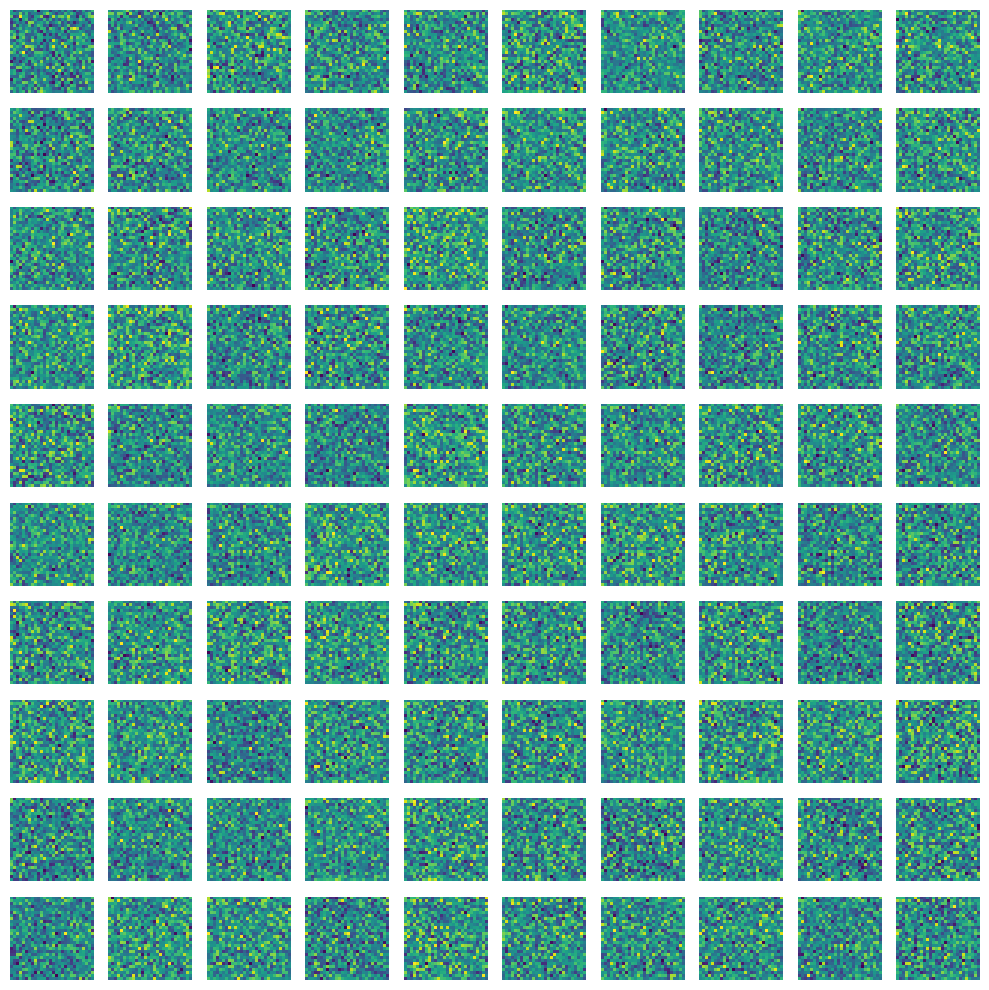

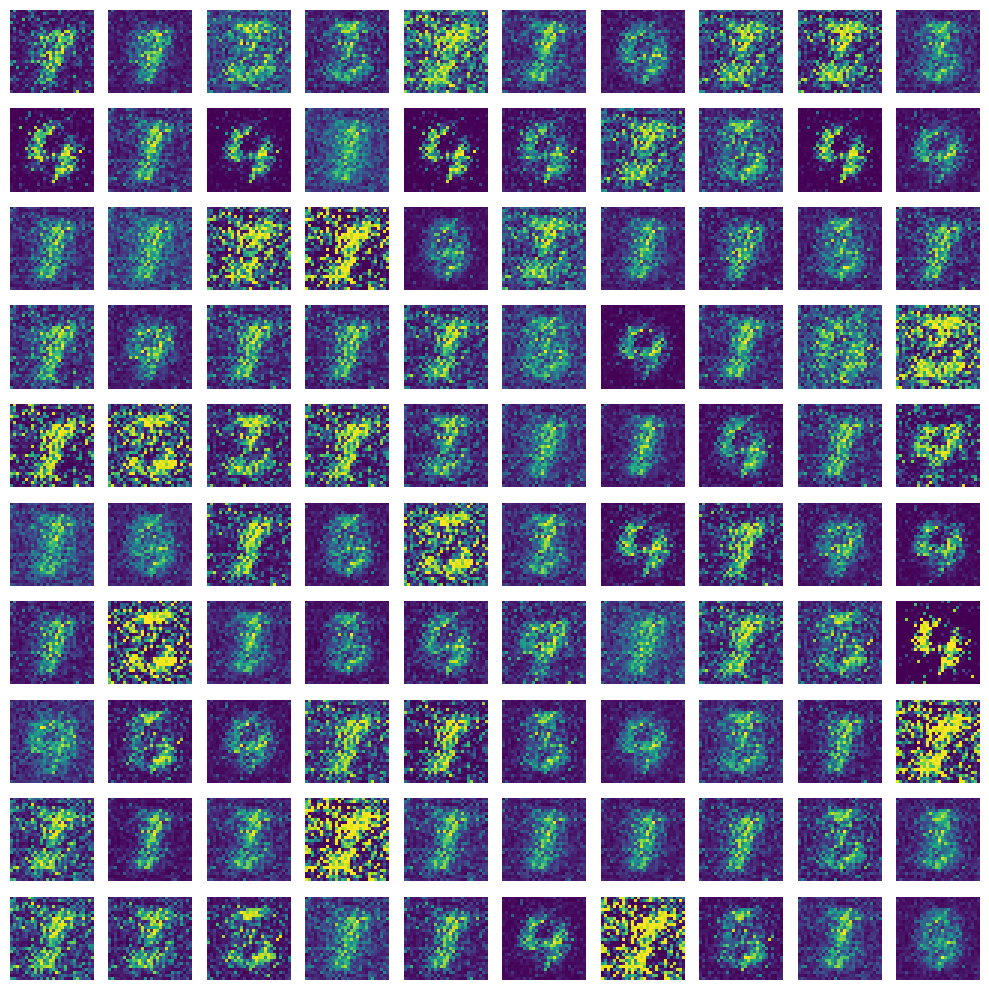

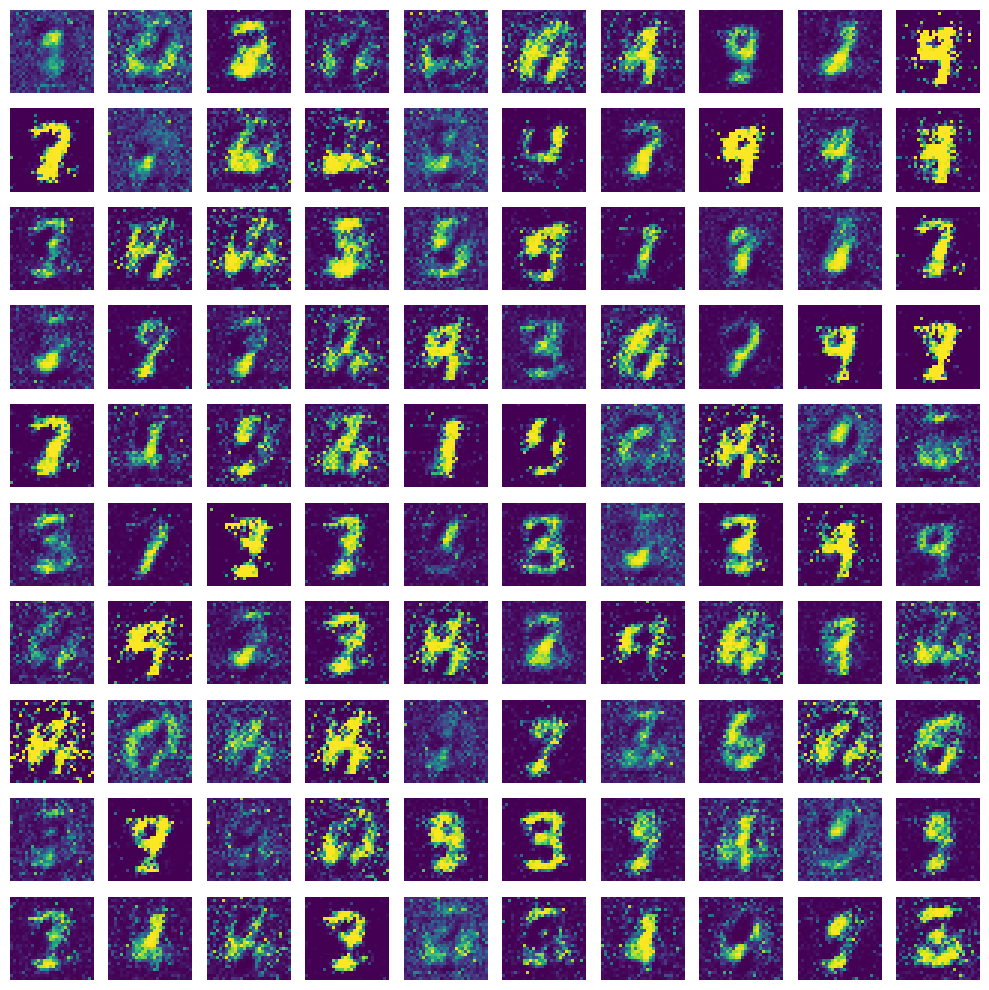

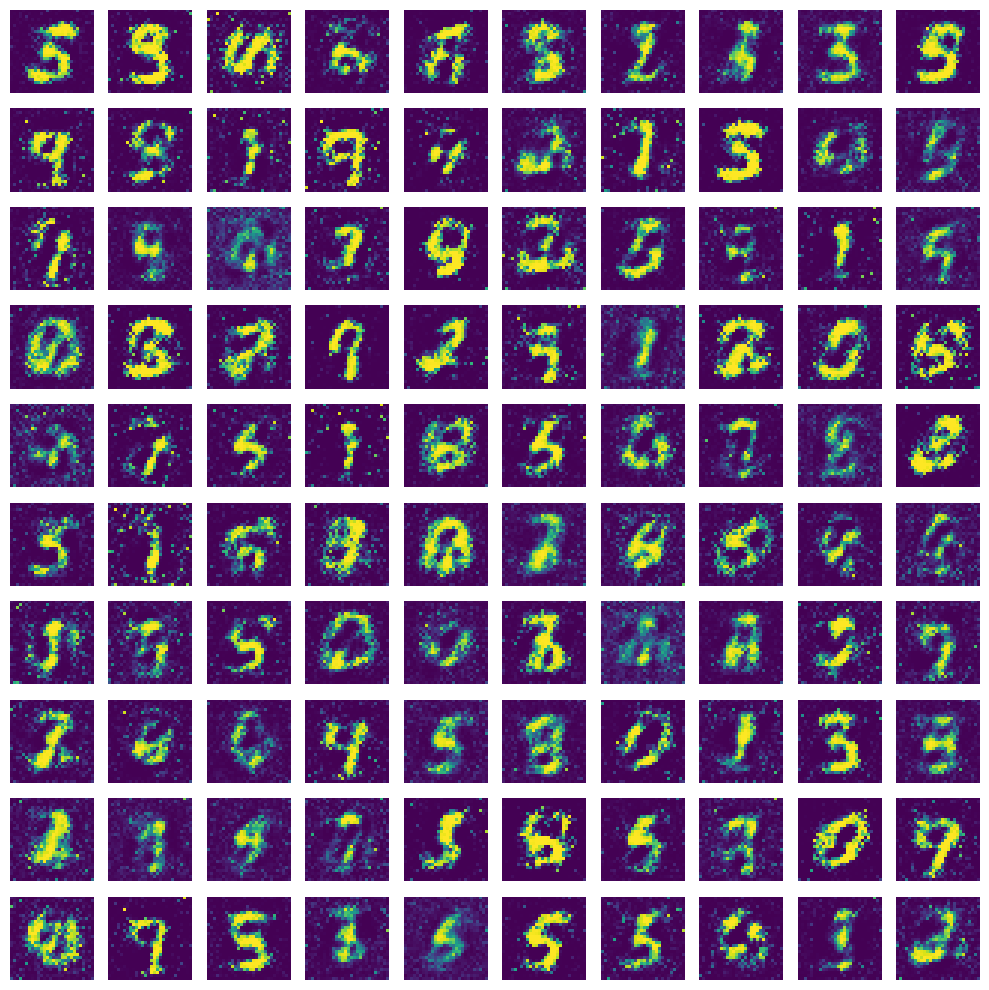

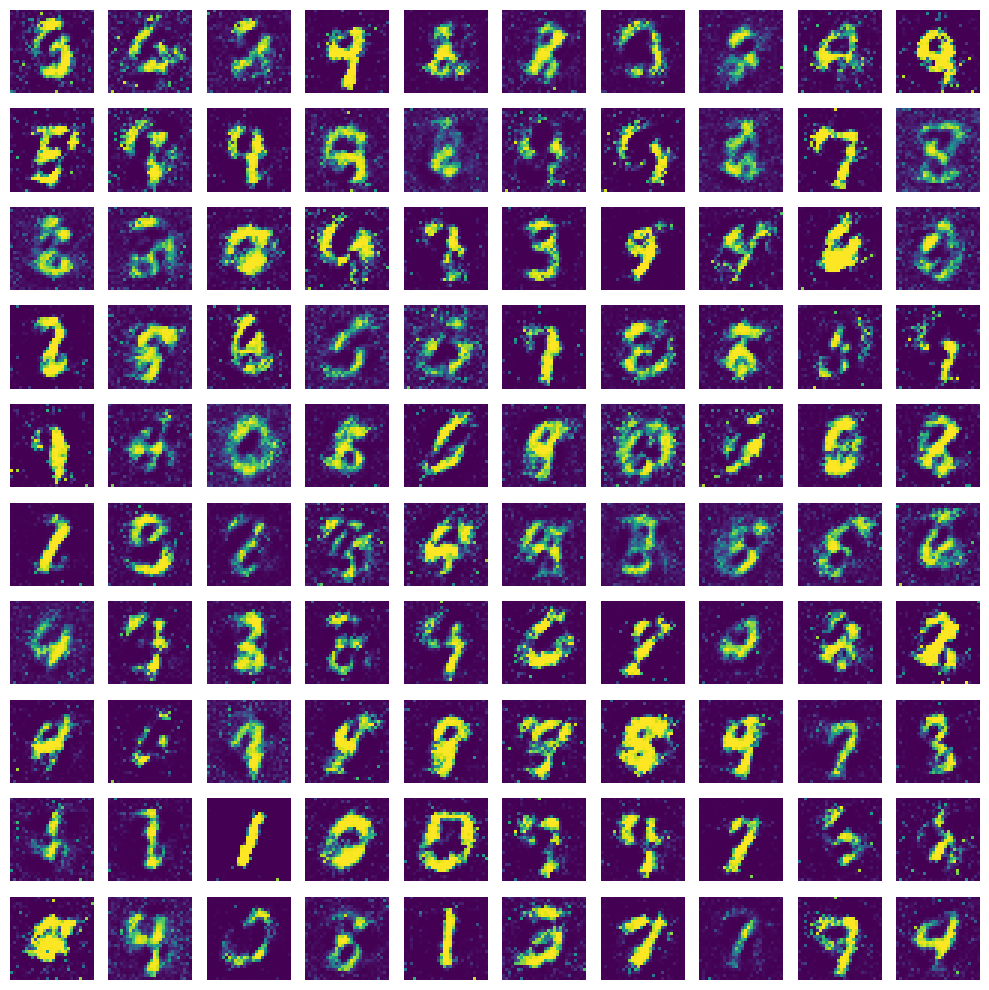

In [ ]:
batch_size = 128
epochs = 5000
for e in tqdm(range(epochs)):
  noise = np.random.normal(0,1, [batch_size, 100])
  generated_images = g.predict(noise)
  image_batch = mnist_data[np.random.randint(low=0, high=mnist_data.shape[0],size=batch_size)]
  X=np.concatenate([image_batch, generated_images])
  y_dis=np.zeros(2*batch_size)
  y_dis[:batch_size] = 1
  d.trainable = True
  d.train_on_batch(X,y_dis)
  noise = np.random.normal(0, 1, [batch_size, 100])
  y_gen = np.ones(batch_size)
  d.trainable = False
  gan.train_on_batch(noise, y_gen)
  if e==0 or e%1000 == 0:
    plot_generated_images(g)